In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 LENOVO HUNGARIAN GRAND PRIX 2025
The Hungarian Grand Prix (Hungarian: Magyar Nagydíj) is a motor race held in Hungary. The first edition was held on 21 June 1936 on a circuit laid out in a park near the centre of Budapest.
 The manufacturers Mercedes-Benz, Auto Union and Ferrari sent three cars each and the event attracted 
cars each, and the event attracted a large crowd. Without 
However, politics and the approaching Second World War meant the end of motor racing for more than fifty years.
The first Formula 1 Grand Prix to be held east of the Iron Curtain was the 1986 Hungarian Grand Prix at the Hungaroring racetrack in Mogyoród, near Budapest. Like the Dutch Grand Prix, which it replaced, the Hungarian Grand Prix was held in 1986 at the Hungaroring in Mogyoród, near Budapest,
 which it replaced, the Hungarian Grand Prix is held in the middle of the European summer. 
European summer. Due to the climate in that region, the first race to be rained out was the 2006 Hungarian Grand Prix.
 rained in 2006. The Hungarian Grand Prix attracts fans from 
various countries in the region that do not have a local Grand Prix, e.g. from the Scandinavian 
Scandinavian and Eastern European countries. Formula 3000 International, GP2 Series and FIA Formula 2 have held preliminary races at every edition since 1998.

Due to the nature of the track, which is narrow, winding and often dusty from lack of use, the Hungarian Grand Prix usually sees groups of up to six cars all following a slightly slower car that cannot be lapped. This is one of the circuits where pit stop strategy is most crucial. The best example of this was seen at the 1998 Grand Prix when Michael Schumacher's Ferrari team changed strategy mid-race and managed to put their driver in a position to win at the end of the stops. Overtaking between drivers is rare at this circuit, but a notable exception was produced by Nigel Mansell in 1989 when he started from 12th position and overtook car by car and ended up taking the lead by taking advantage of Ayrton Senna being stuck passing a slower driver. In 2003 modifications were made to the circuit in an attempt to make overtaking more feasible.

Other great moments at this circuit include the first victory for Damon Hill (in 1993), and for Fernando Alonso (in 2003). In 2001, Michael Schumacher equalled Alain Prost in number of victories at this circuit.

In 2006, Jenson Button took his first Formula 1 victory, and Pedro de la Rosa his first podium. This race was the first ever Formula 1 race at this circuit to be held in wet conditions, and was notable for its high number of retirements, including those of Michael Schumacher and Fernando Alonso.

In 2016 the race extended its current contract until 2021 for a further five years, securing the GP until 2026.
Source: Wikipedia

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='HUN')

meeting_key  session_key  location                 date_start  \
0         1266         9921  Budapest  2025-08-01T11:30:00+00:00   
1         1266         9922  Budapest  2025-08-01T15:00:00+00:00   
2         1266         9923  Budapest  2025-08-02T10:30:00+00:00   

                    date_end session_type session_name  country_key  \
0  2025-08-01T12:30:00+00:00     Practice   Practice 1           14   
1  2025-08-01T16:00:00+00:00     Practice   Practice 2           14   
2  2025-08-02T11:30:00+00:00     Practice   Practice 3           14   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          HUN      Hungary            4        Hungaroring   02:00:00  2025  
1          HUN      Hungary            4        Hungaroring   02:00:00  2025  
2          HUN      Hungary            4        Hungaroring   02:00:00  2025

## Free Practice 1
### Obtain setup

In [12]:
practice = libraryDataF1.obtain_information('laps',session_key=9921)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9921)
drivers = libraryDataF1.obtain_information('drivers',session_key=9921)

In [13]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Centering on straight is not a good strategy here in Hungary. Hence, top speed is not important. 

Aston Ferrari and Williams are good on straights so they will have a little advantage in sector 1.

Alpine has a lack of power and due to the configuration they centered on corners so this lack is relevant.

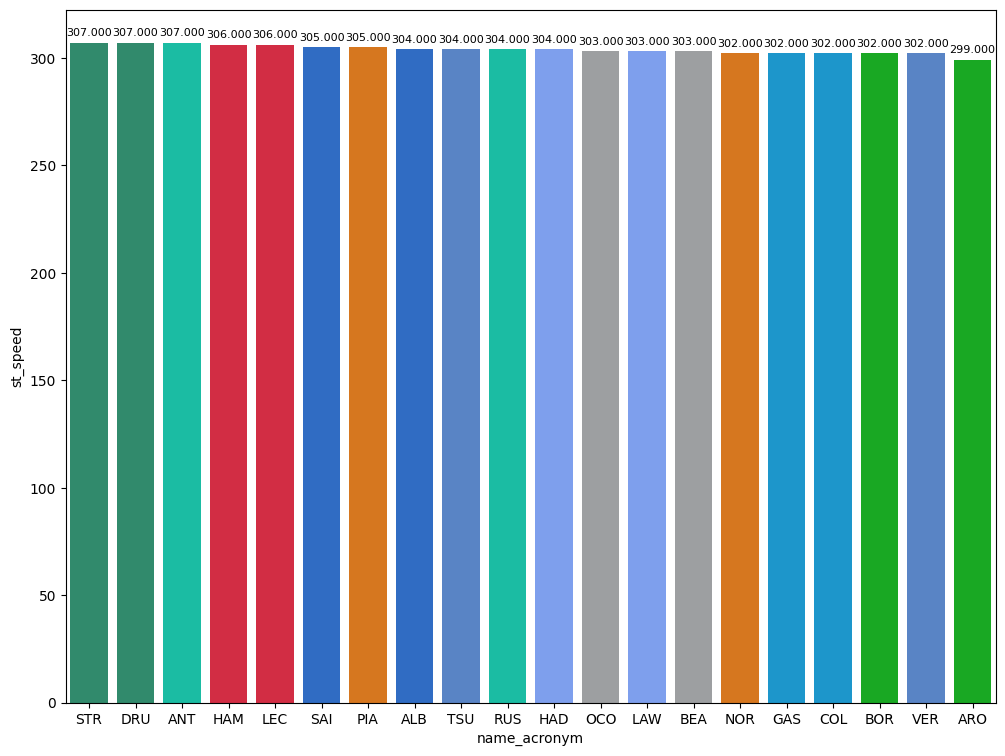

In [14]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

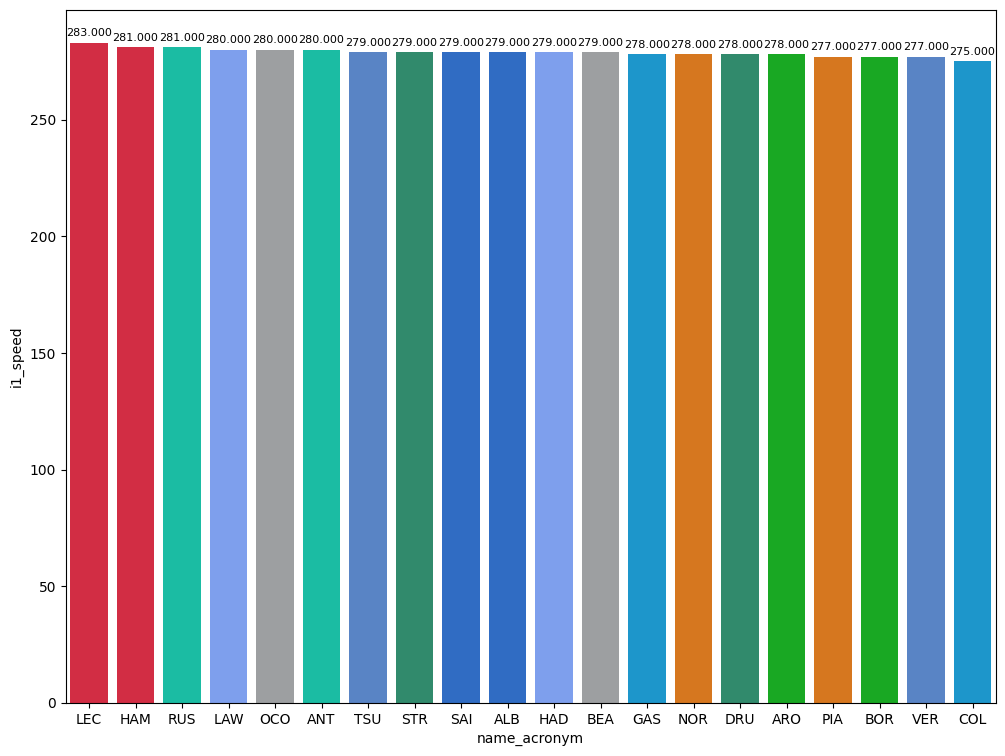

In [15]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

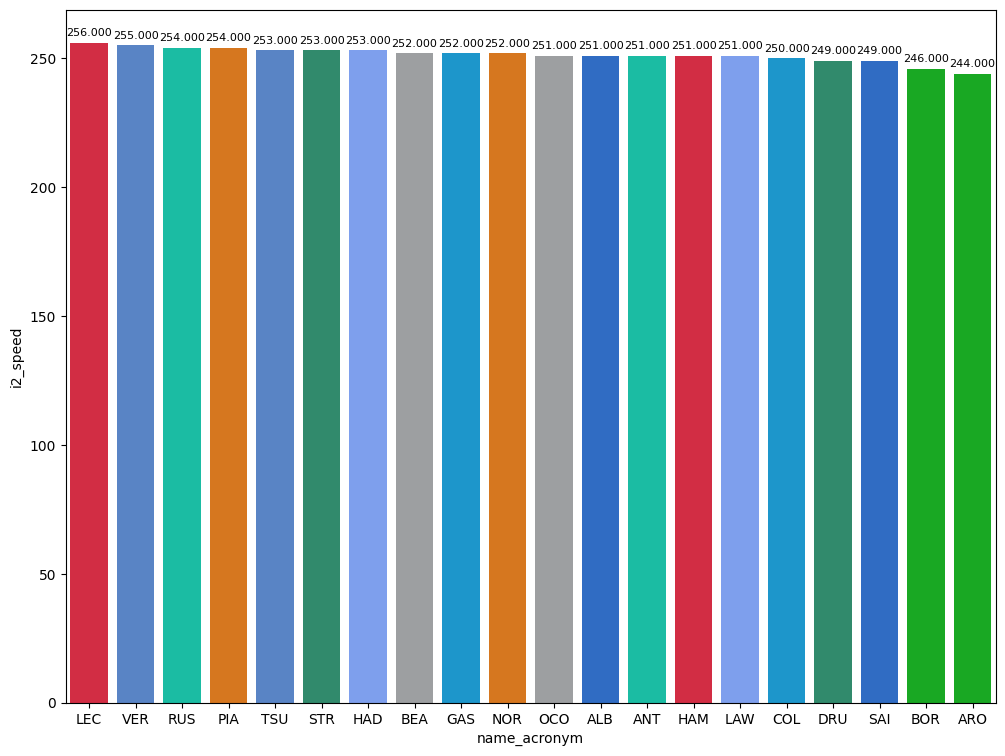

In [16]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [17]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
141  Alexander ALBON     HARD             28.373             27.735   
142  Charles LECLERC   MEDIUM             28.231             27.339   
209     Lando NORRIS     SOFT             28.017             26.748   

     duration_sector_3  lap_duration  
141             21.758        77.866  
142             21.850        77.420  
209             21.287        76.052

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.
FP1 data is not very representative due to it is a adaptation session.
Hungaroring is a circuit where straights are important so teams as Sauber will suffer here. Haas had a good performance with both cars and teams as Aston should be competitive. It seems that qualyfing will be fought mainly for entering to Q3.

In [18]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


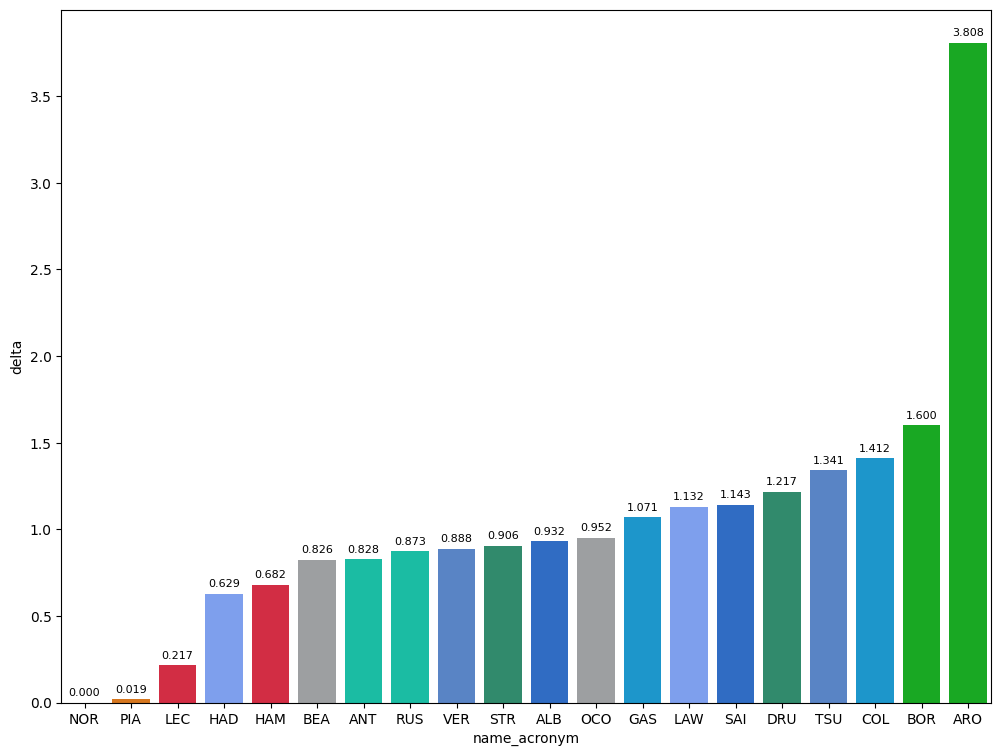

In [19]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: Albon was the fastest with a minimum difference with Hamilton. In terms to enter in Q3, Williams has to take advantage at maximum. Alpine, due to the lack of power is the slowest team. Aston has potential here and Haas suffers here.
S2: It is slowest part of the circuit, McLaren is the fastest here and Haas and Alpine has a good potential here. On the other hand, Williams suffer here.
S3: Alpine has a good potential here due to the big corner and Williams suffers here. It seems that a medium configuration is crucial here because Red Bull suffers though they are fast in sector 2.

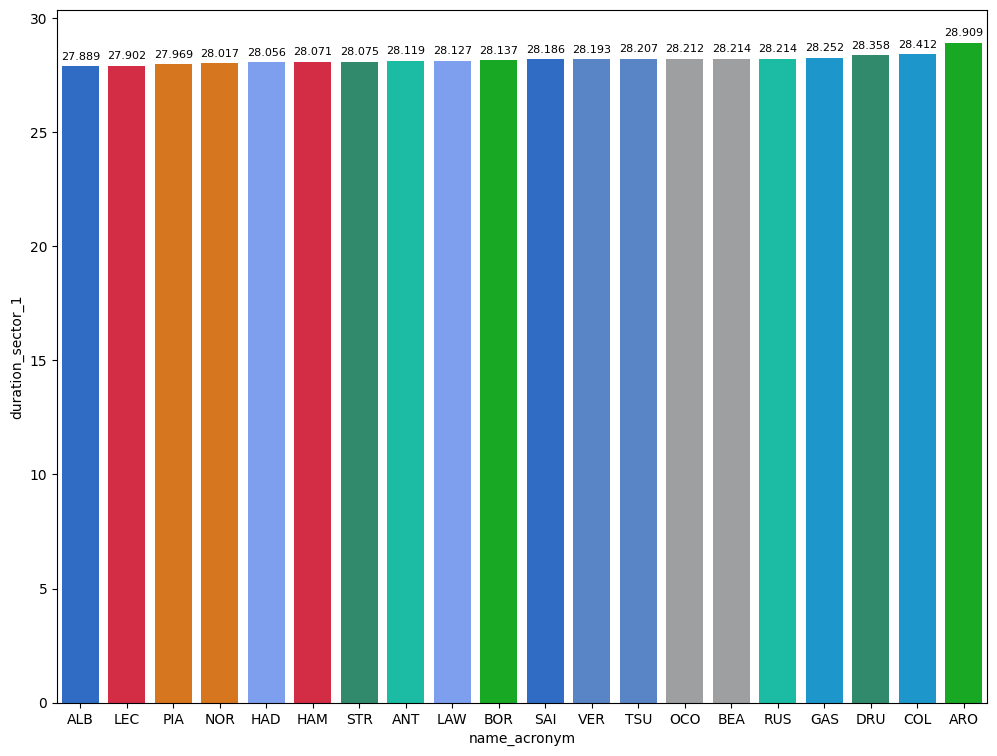

In [50]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

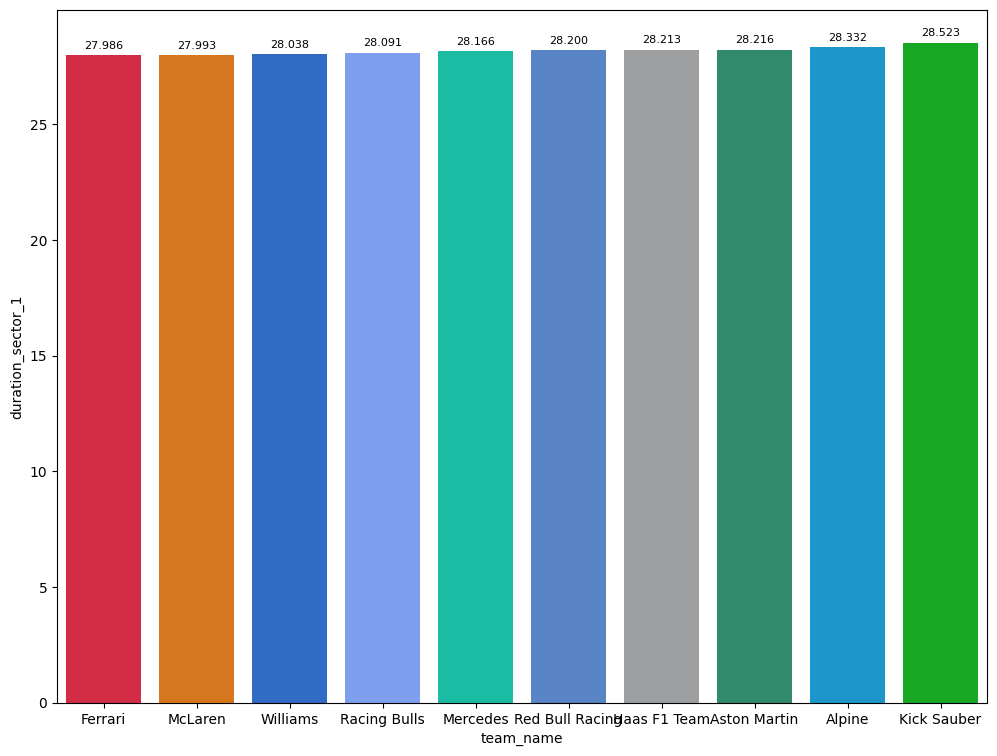

In [51]:
sectorPaceperteam = sectorPace.groupby(["team_name"]).agg({
    'duration_sector_1':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_1').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_1",sectorPaceperteam)

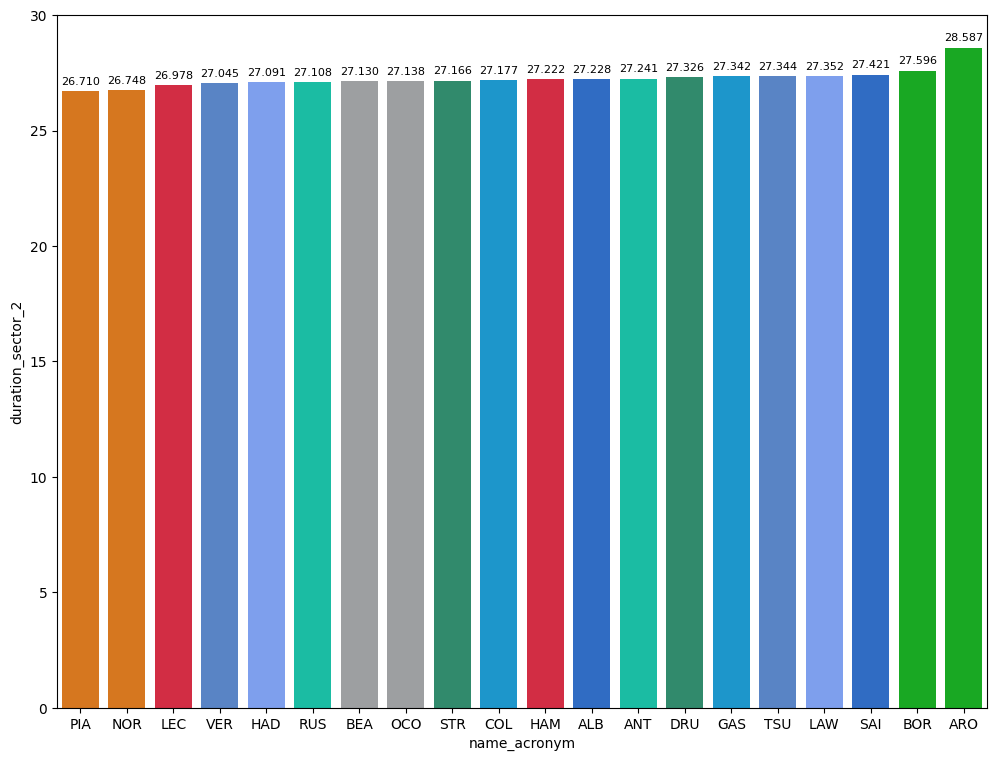

In [52]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

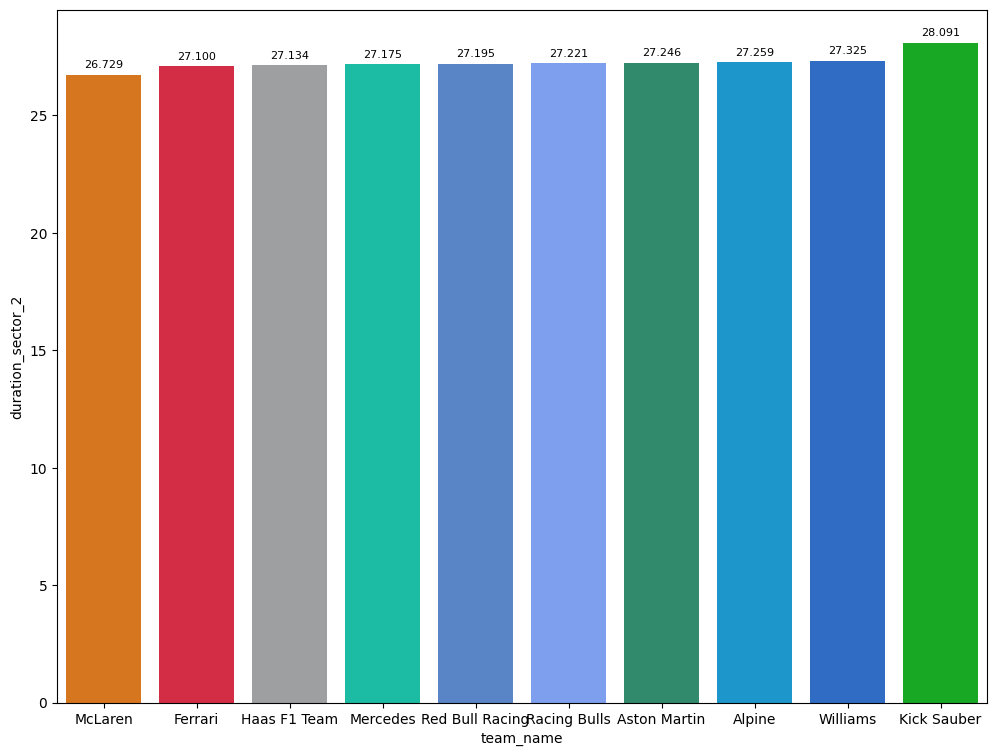

In [53]:
sectorPaceperteam = sectorPace.groupby(["team_name"]).agg({
    'duration_sector_2':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_2').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_2",sectorPaceperteam)


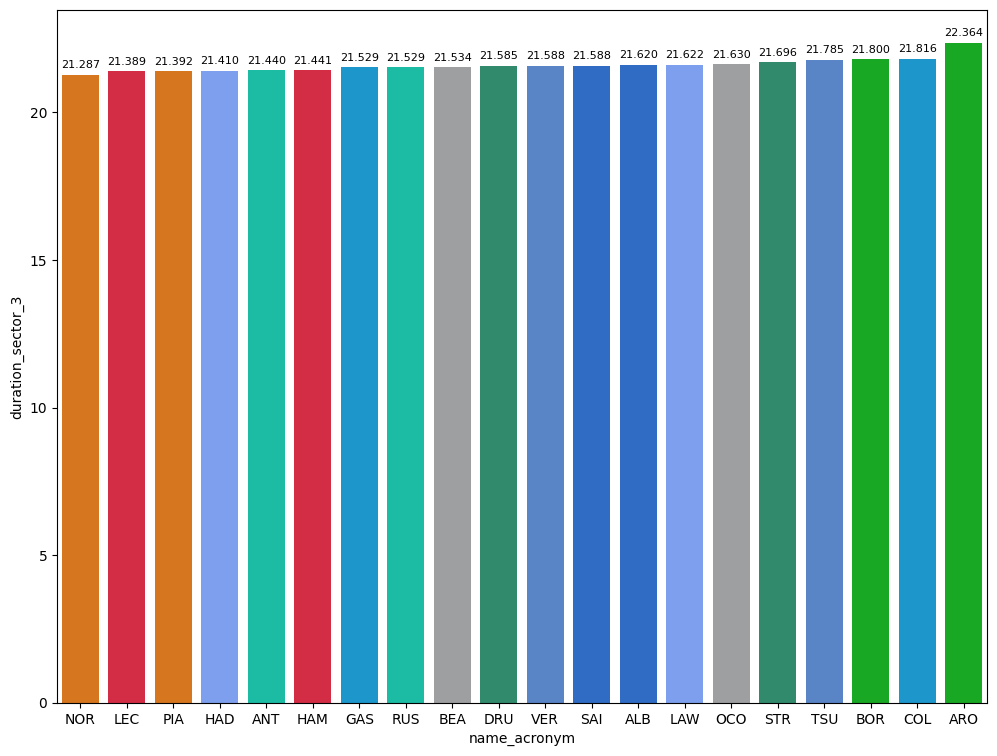

In [54]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

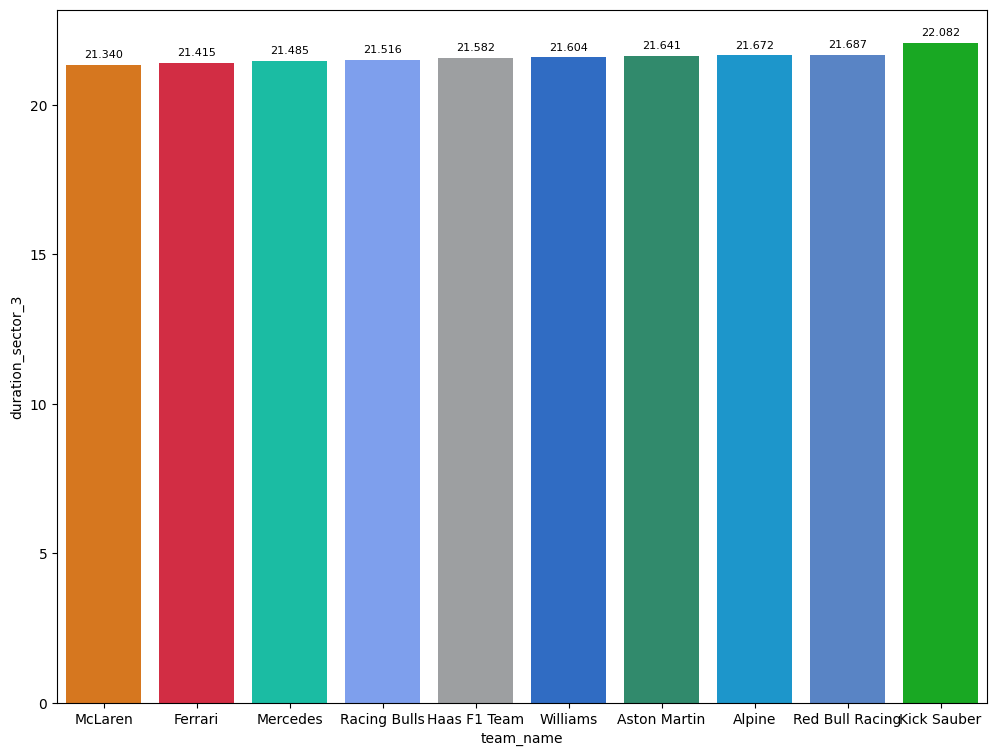

In [55]:
sectorPaceperteam = sectorPace.groupby(["team_name"]).agg({
    'duration_sector_3':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_3').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_3",sectorPaceperteam)


### Mean pace with the different compound used on the session

In [23]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 88").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         78.118122
MEDIUM       81.380561
HARD         81.511662

## Free Practice 2
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=9922)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9922)
drivers = libraryDataF1.obtain_information('drivers',session_key=9922)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
It is not a circuit were speed on straights is crucial. It seems that Williams centered on corners as Racing Bulls and Red Bull. Ferrari, McLaren, Mercedes and Sauber are faster on straights.

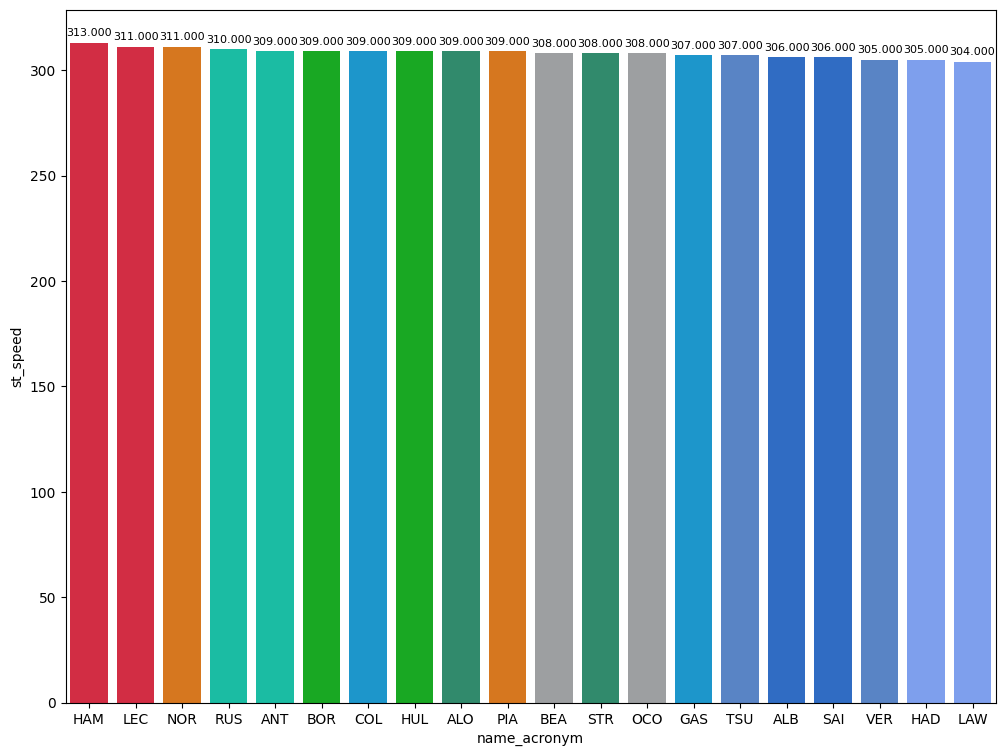

In [5]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

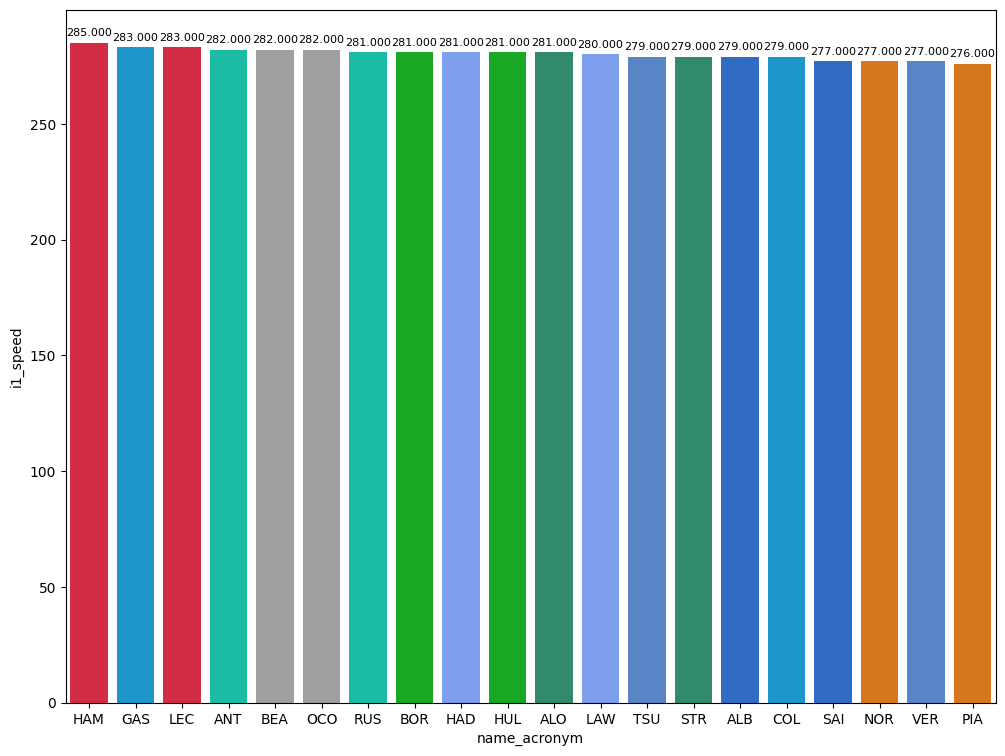

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

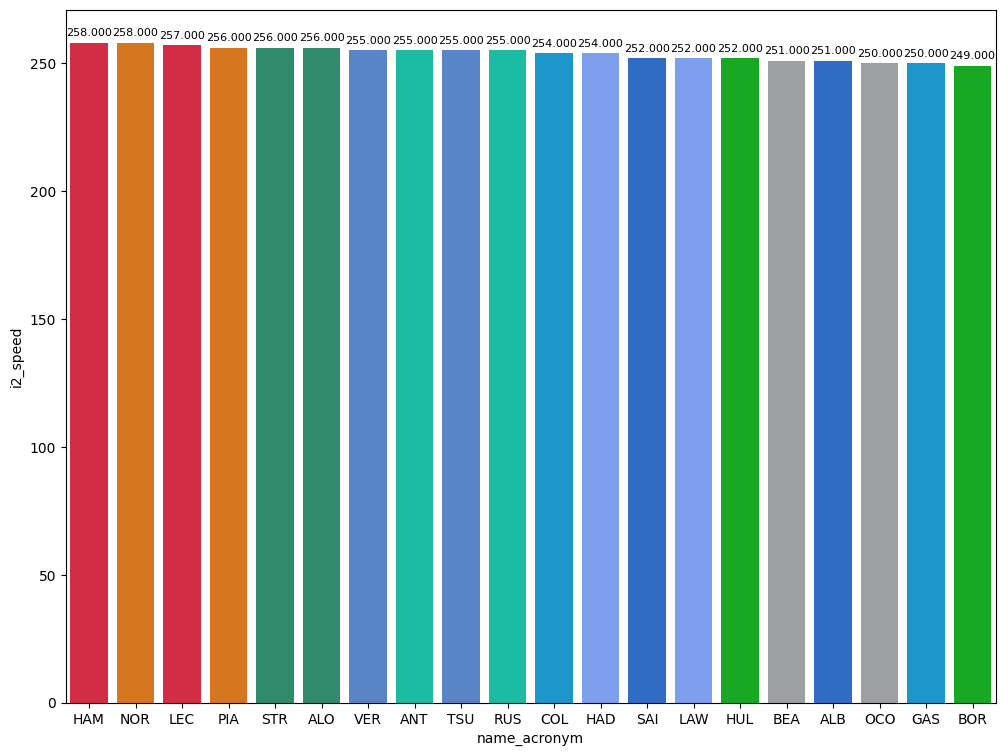

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [8]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
104  Oliver BEARMAN     HARD             28.293             27.601   
143    Lando NORRIS   MEDIUM             28.098             26.898   
211    Lando NORRIS     SOFT             27.673             26.565   

     duration_sector_3  lap_duration  
104             21.918        77.812  
143             21.529        76.525  
211             21.386        75.624

### Deltas
Aston Martin surprised with qualy pace. On the other hand, Williams was so slow and Red BUll could suffer to enter in Q3. Sauber could suffer to enter in Q2.

In [9]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


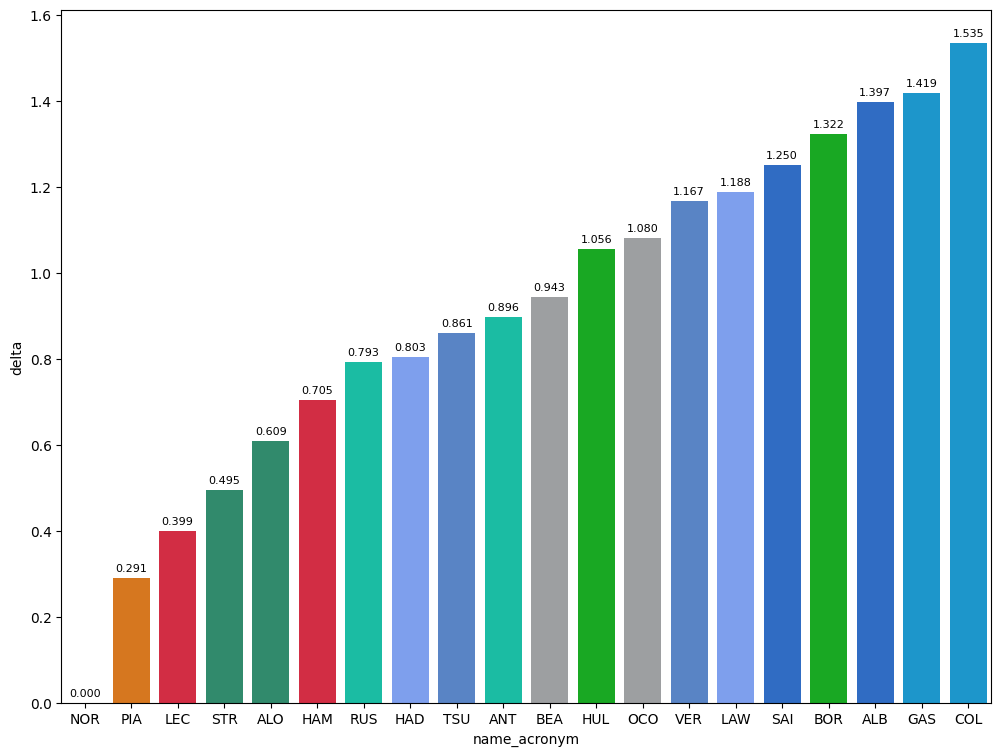

In [10]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

S1: Williams centered on corners and this was bad for them because they are slow in general. BEA had a good configuration in sector 1 while OCO had more aero. Alpine as FP1 are the slowest.

S2: McLaren is dominant in sector 2 and Red Bull stands out. Nevertheless, Sauber and BEA struggles here.

S3: McLaren is the fastest here and Ferrari stuggles. Williams and Alpine must improve in they dont want to be knocked-out in Q2. Sauber's pace could be interesting.

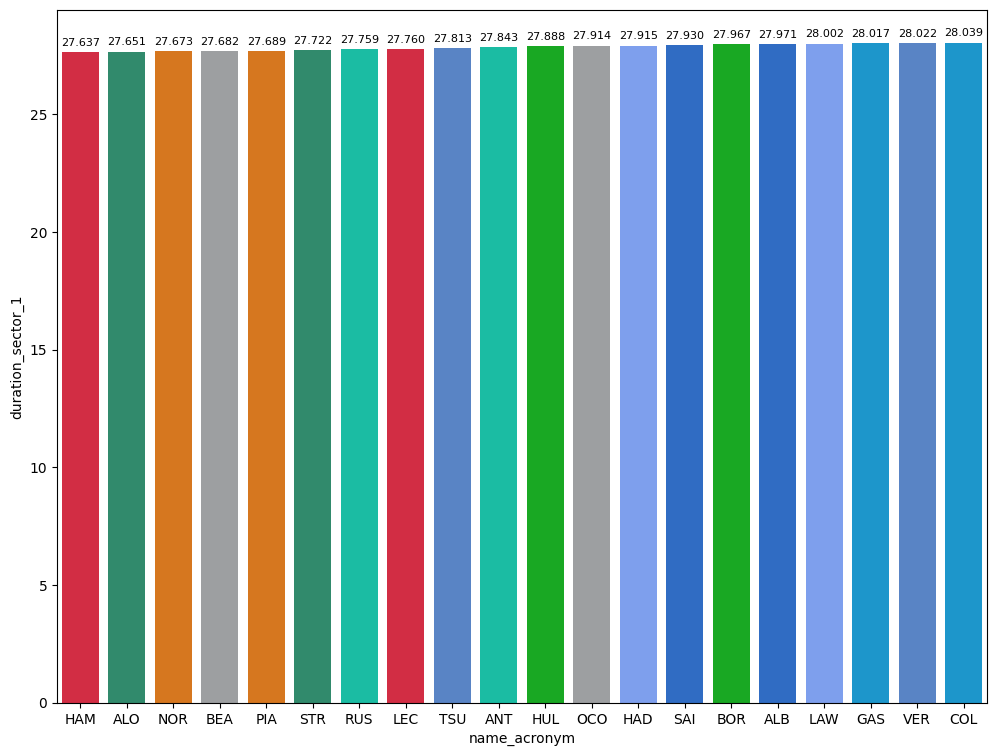

In [11]:
sectorPace1 = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace1)

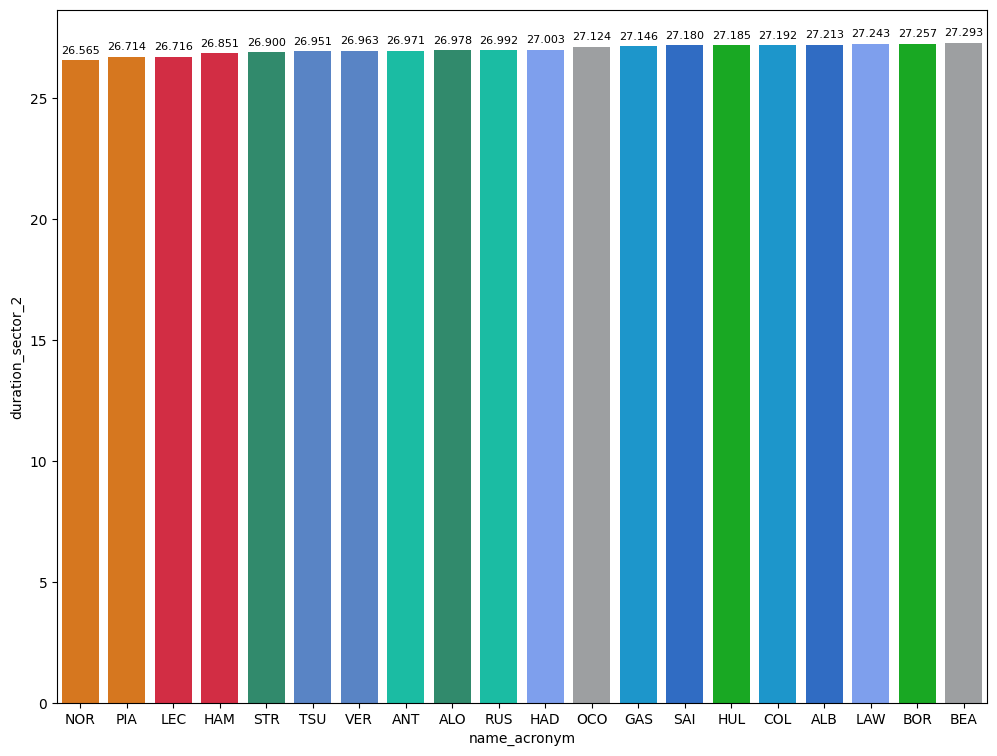

In [12]:
sectorPace2 = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace2)

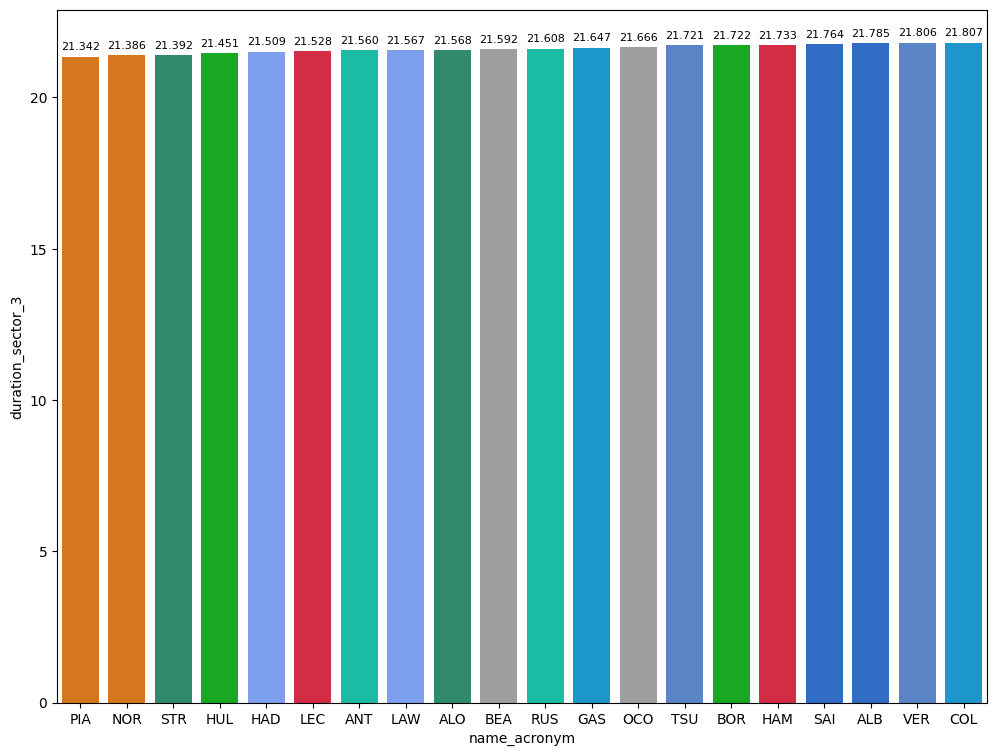

In [13]:
sectorPace3 = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace3)

### Track dominance per team
S1: McLaren is the fastest, even though, they dont stand out in speed trap. Williams, RB and Alpine struggle here.

S2: Red Bull and Alpine stand out here while Haas and Sauber are not competitive.

S3: Ferrari is slow here and Racing Bulls suffers here.

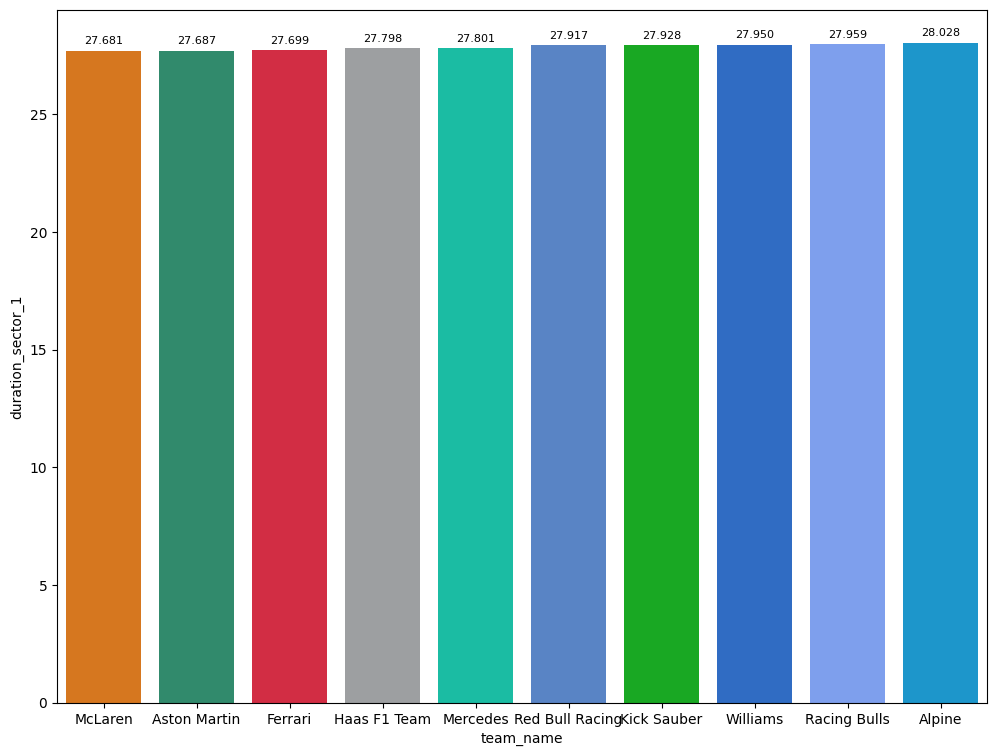

In [14]:
sectorPaceperteam = sectorPace1.groupby(["team_name"]).agg({
    'duration_sector_1':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_1').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_1",sectorPaceperteam)

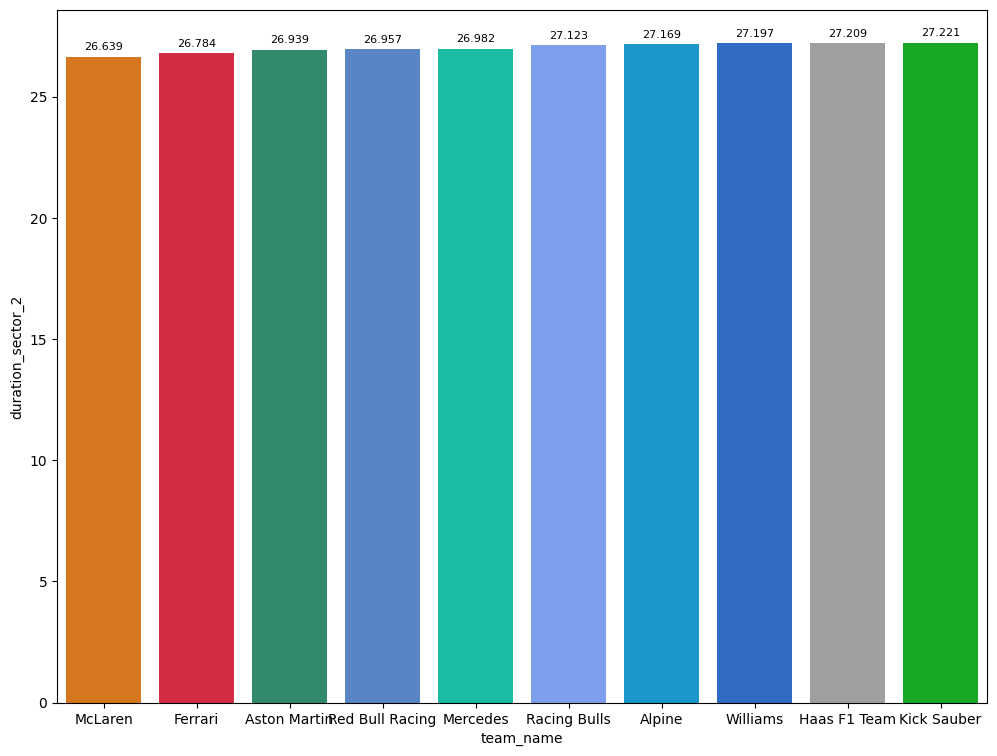

In [15]:
sectorPaceperteam = sectorPace2.groupby(["team_name"]).agg({
    'duration_sector_2':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_2').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_2",sectorPaceperteam)


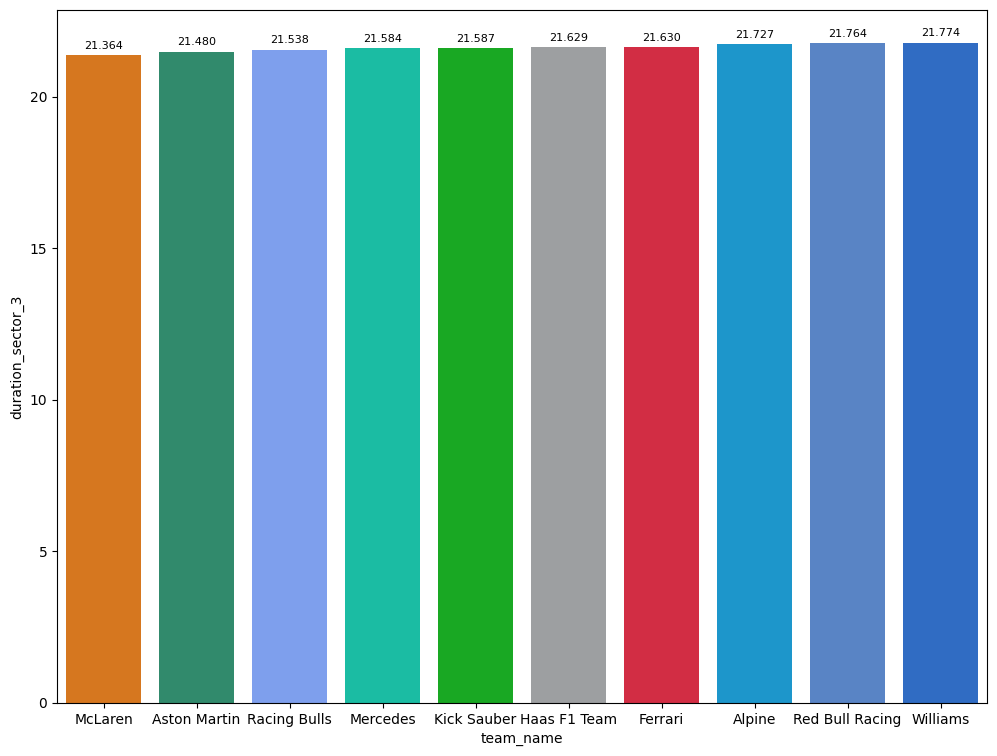

In [16]:
sectorPaceperteam = sectorPace3.groupby(["team_name"]).agg({
    'duration_sector_3':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_3').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_3",sectorPaceperteam)


### Mean pace with the different compound used on the session

In [17]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>83 and lap_duration <= 86").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
MEDIUM       84.073026
SOFT         84.244000
HARD         85.026000

### Long runs

In [18]:
MINIMUN_SECONDS = 81
MAXIMUM_SECONDS = 84

#### Red Bull Racing

In [19]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1266         9922             1              1          1        3   
12         1266         9922             1             22          1        6   
20         1266         9922             2              1          4        6   
33         1266         9922             3              1          7        9   
39         1266         9922             2             22          7       10   
58         1266         9922             4              1         10       25   
59         1266         9922             3             22         11       12   
70         1266         9922             4             22         13       15   
86         1266         9922             5             22         16       17   
99         1266         9922             6             22         18       30   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
12   MEDIUM                  0  
20   MEDIUM                  3  
33     SOFT                  0  
39   MEDIUM                  6  
58   MEDIUM                  6  
59   MEDIUM                 10  
70     SOFT                  0  
86     SOFT                  3  
99   MEDIUM                 12

In [20]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
300  Max VERSTAPPEN   MEDIUM  2025-08-01T15:42:21.893000+00:00          11   
307  Max VERSTAPPEN   MEDIUM  2025-08-01T15:43:44.268000+00:00          12   
374  Max VERSTAPPEN   MEDIUM  2025-08-01T15:49:24.840000+00:00          16   
393  Max VERSTAPPEN   MEDIUM  2025-08-01T15:50:47.303000+00:00          17   
412  Max VERSTAPPEN   MEDIUM  2025-08-01T15:52:10.150000+00:00          18   
432  Max VERSTAPPEN   MEDIUM  2025-08-01T15:53:32.500000+00:00          19   
472  Max VERSTAPPEN   MEDIUM  2025-08-01T15:56:20.685000+00:00          21   
491  Max VERSTAPPEN   MEDIUM  2025-08-01T15:57:43.064000+00:00          22   
508  Max VERSTAPPEN   MEDIUM  2025-08-01T15:59:06.386000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
300             29.754             29.549             23.116        82.419  
307             29.757             29.253             22.993        82.003  
374             29.954             29.361             23.290        82.605  
393             30.154             29.221             23.345        82.720  
412             29.832             29.202             23.361        82.395  
432             29.900             29.368             23.378        82.646  
472             30.153             29.647             23.608        83.408  
491             30.125             29.455             23.641        83.221  
508             29.869             29.330             23.465        82.664

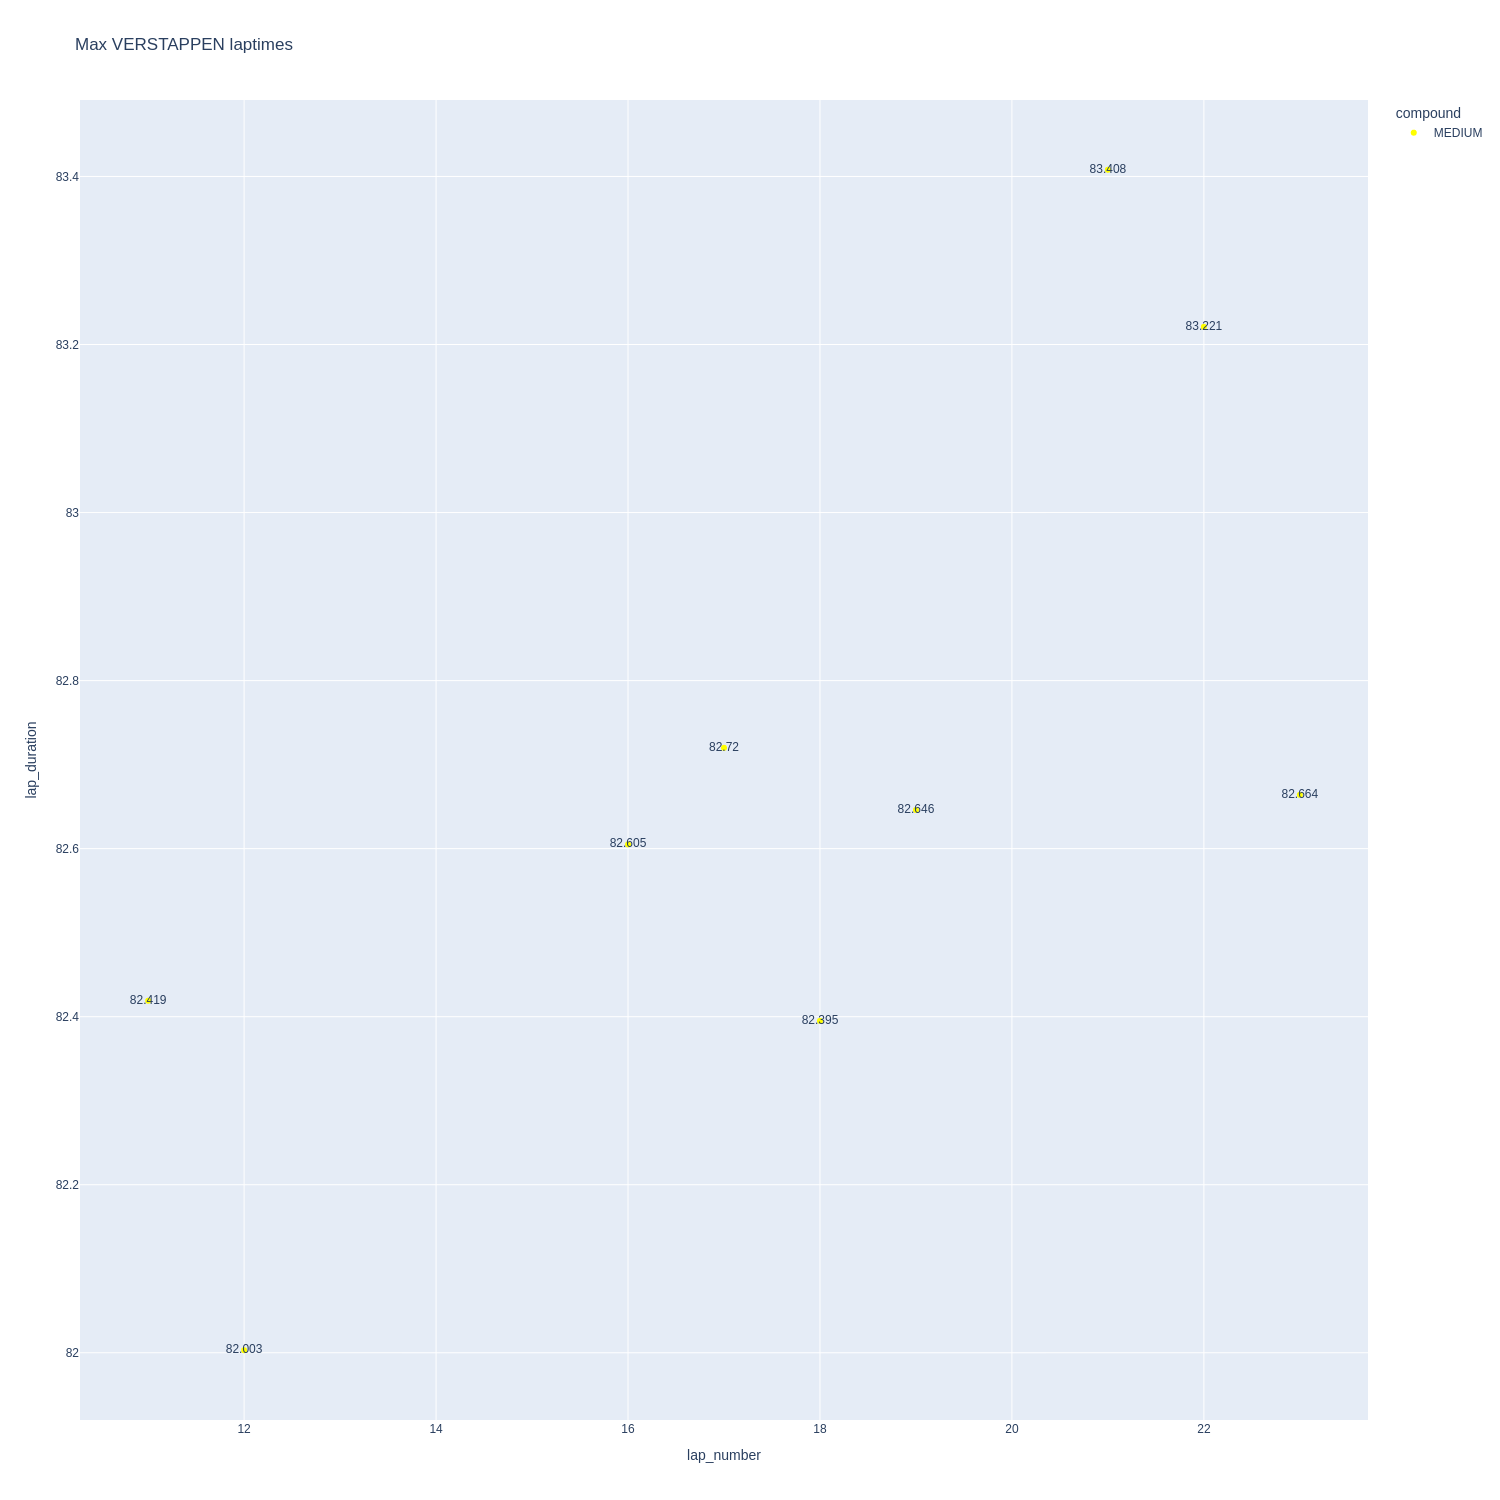

In [21]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

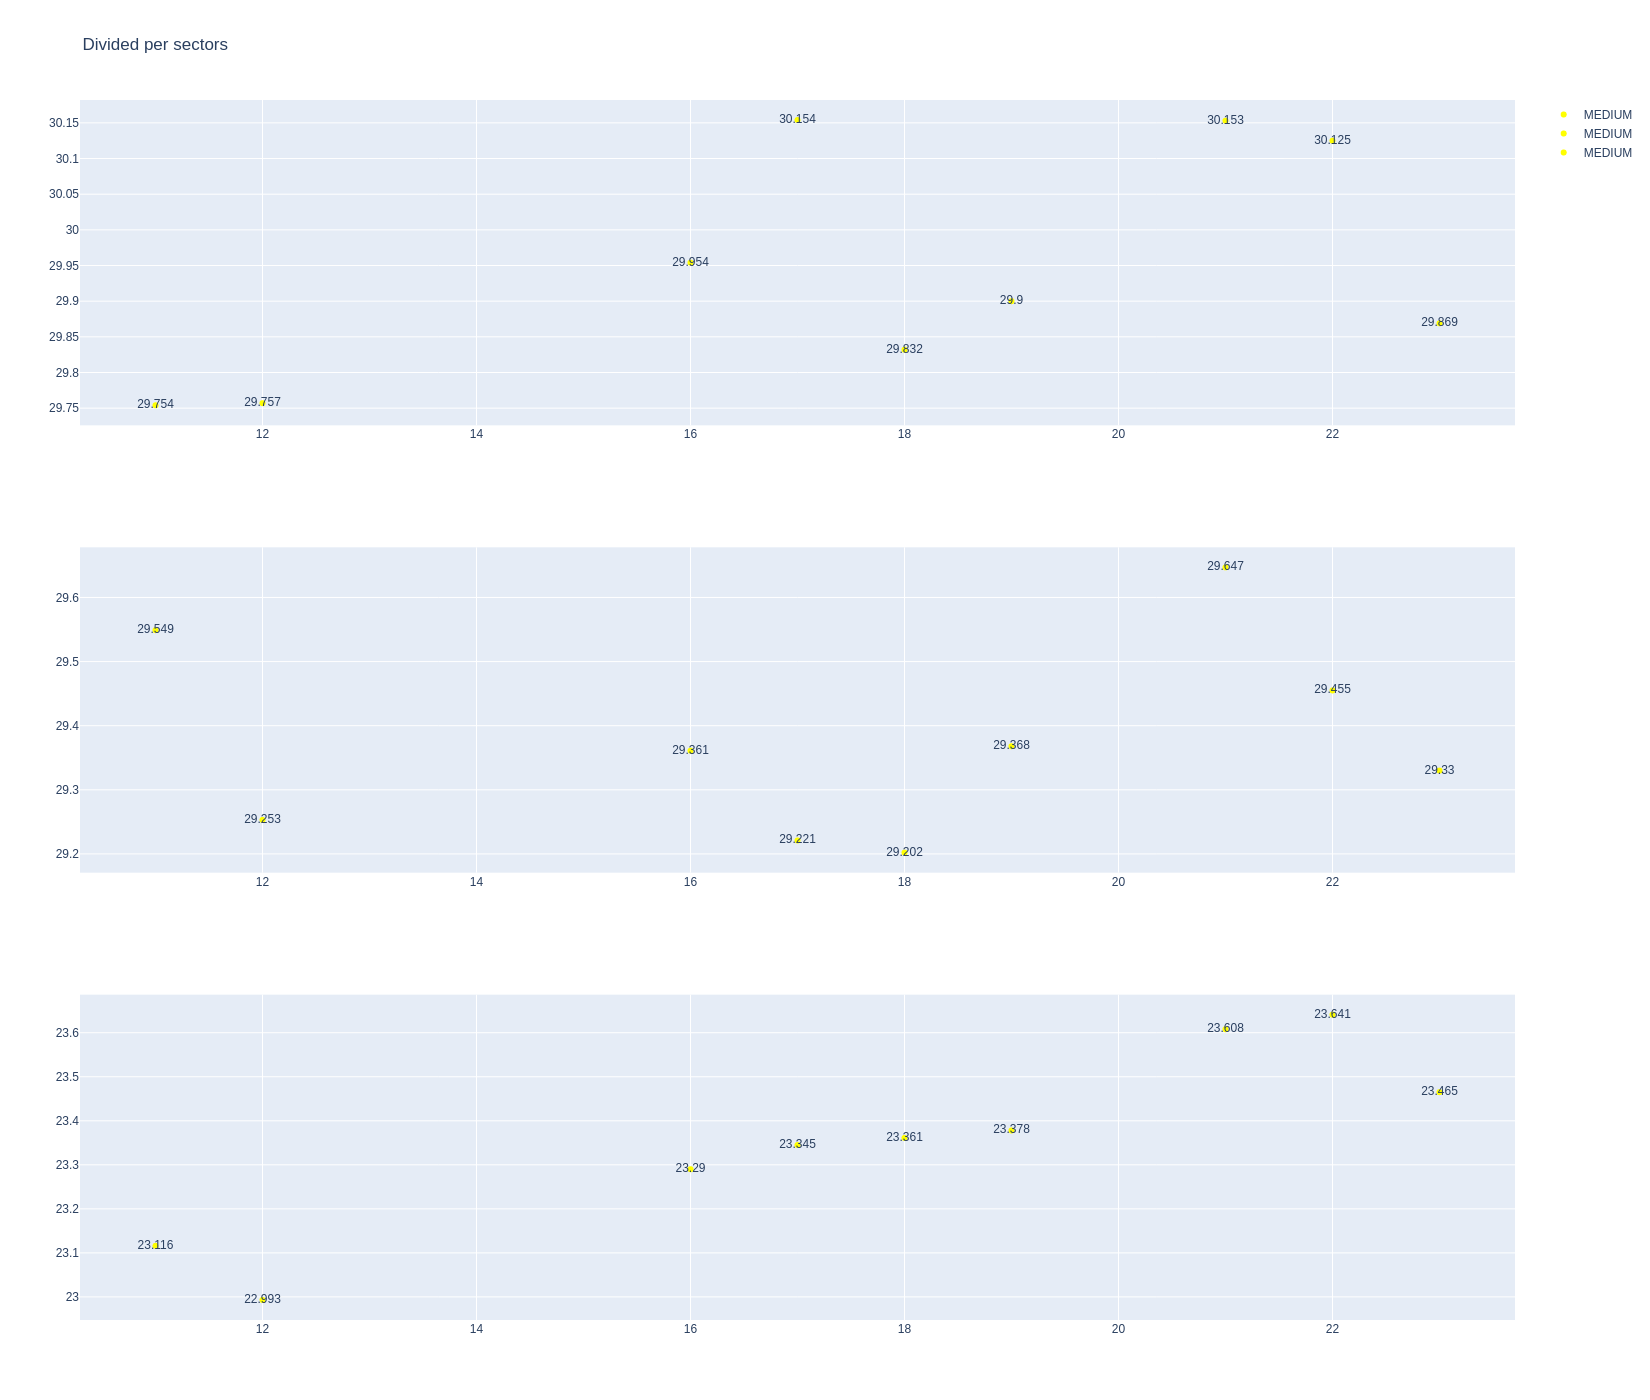

In [22]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [23]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
341  Yuki TSUNODA   MEDIUM  2025-08-01T15:46:53.057000+00:00          19   
360  Yuki TSUNODA   MEDIUM  2025-08-01T15:48:15.802000+00:00          20   
398  Yuki TSUNODA   MEDIUM  2025-08-01T15:51:03.305000+00:00          22   
417  Yuki TSUNODA   MEDIUM  2025-08-01T15:52:25.897000+00:00          23   
457  Yuki TSUNODA   MEDIUM  2025-08-01T15:55:16.032000+00:00          25   
477  Yuki TSUNODA   MEDIUM  2025-08-01T15:56:38.916000+00:00          26   
497  Yuki TSUNODA   MEDIUM  2025-08-01T15:58:01.979000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
341             29.960             29.743             23.134        82.837  
360             29.862             29.275             23.287        82.424  
398             30.042             29.380             23.215        82.637  
417             29.947             29.329             23.404        82.680  
457             30.000             29.503             23.461        82.964  
477             30.033             29.481             23.425        82.939  
497             30.116             29.722             23.603        83.441

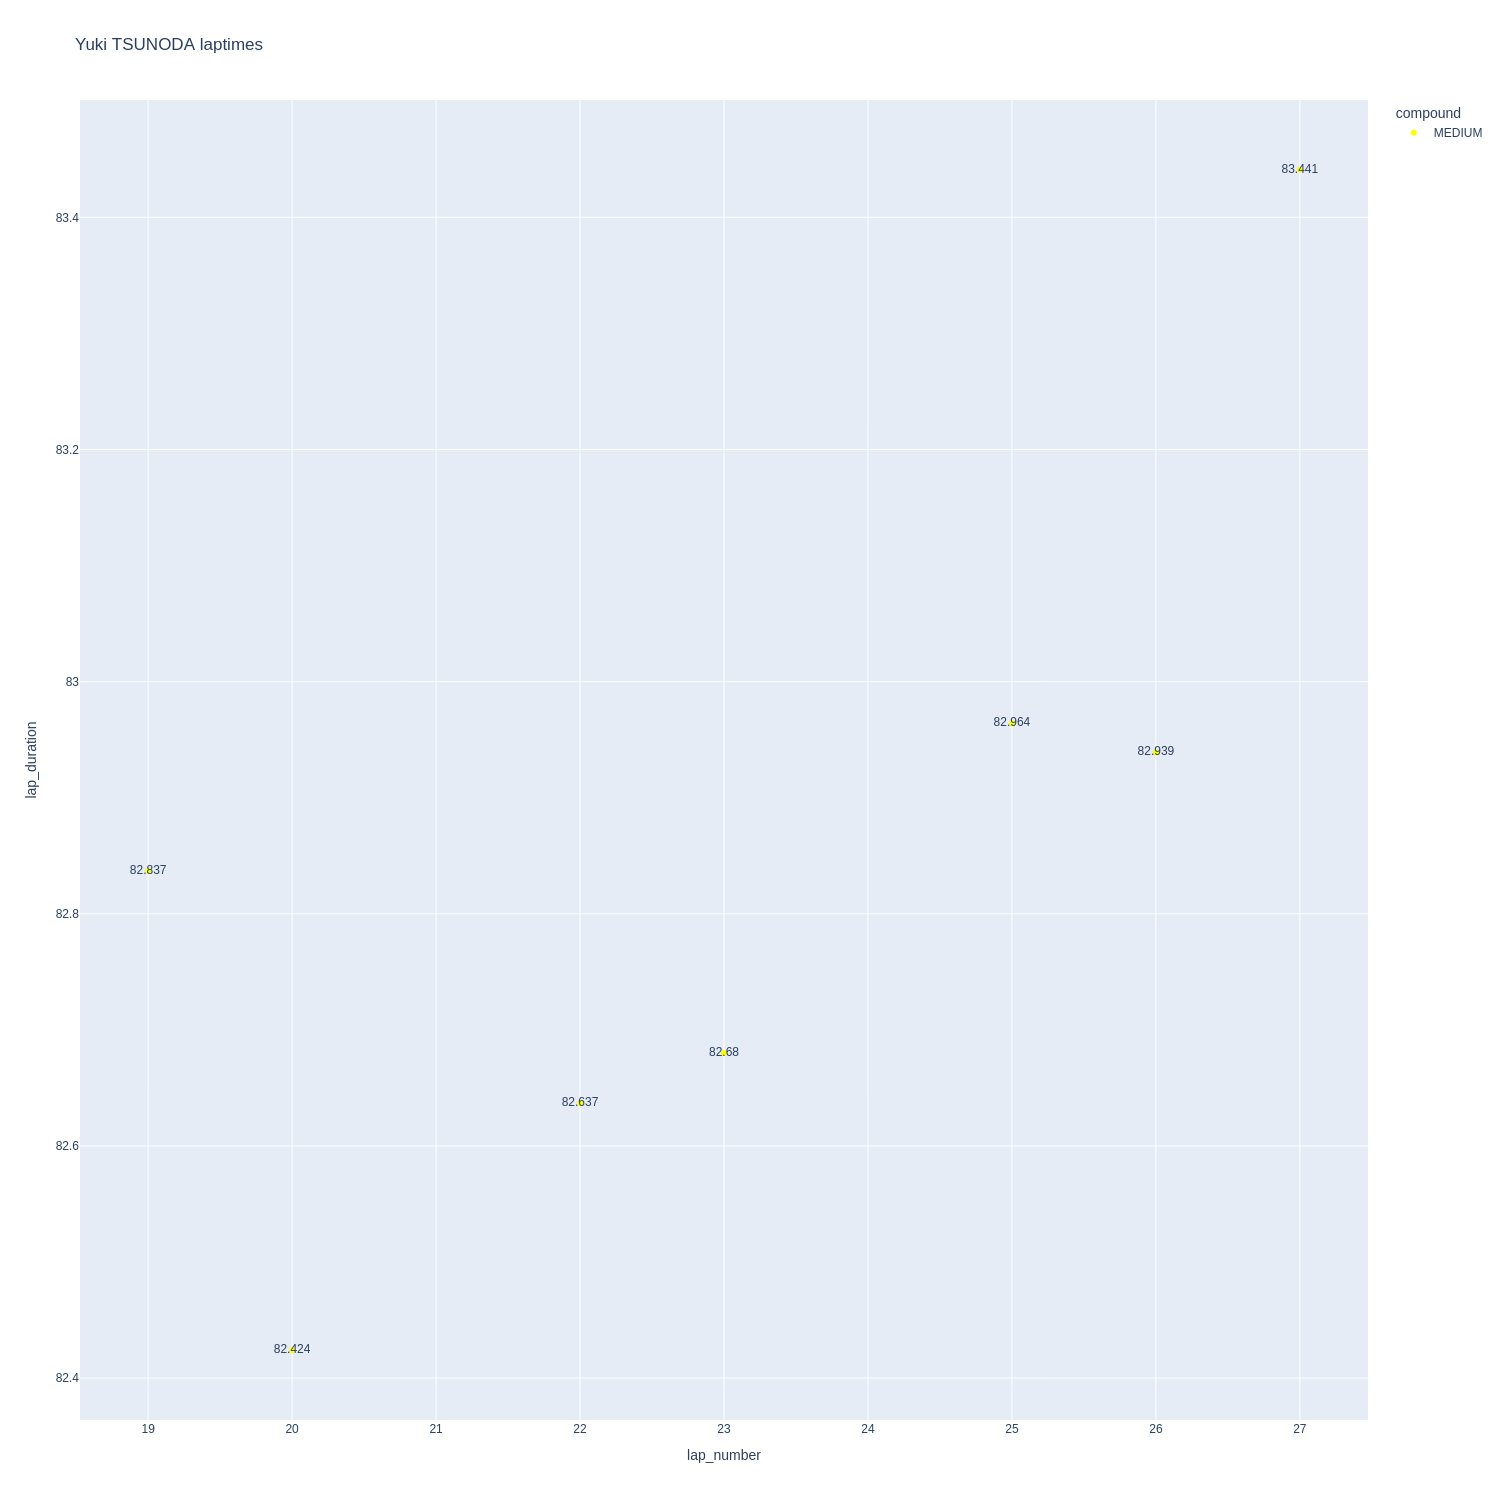

In [24]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

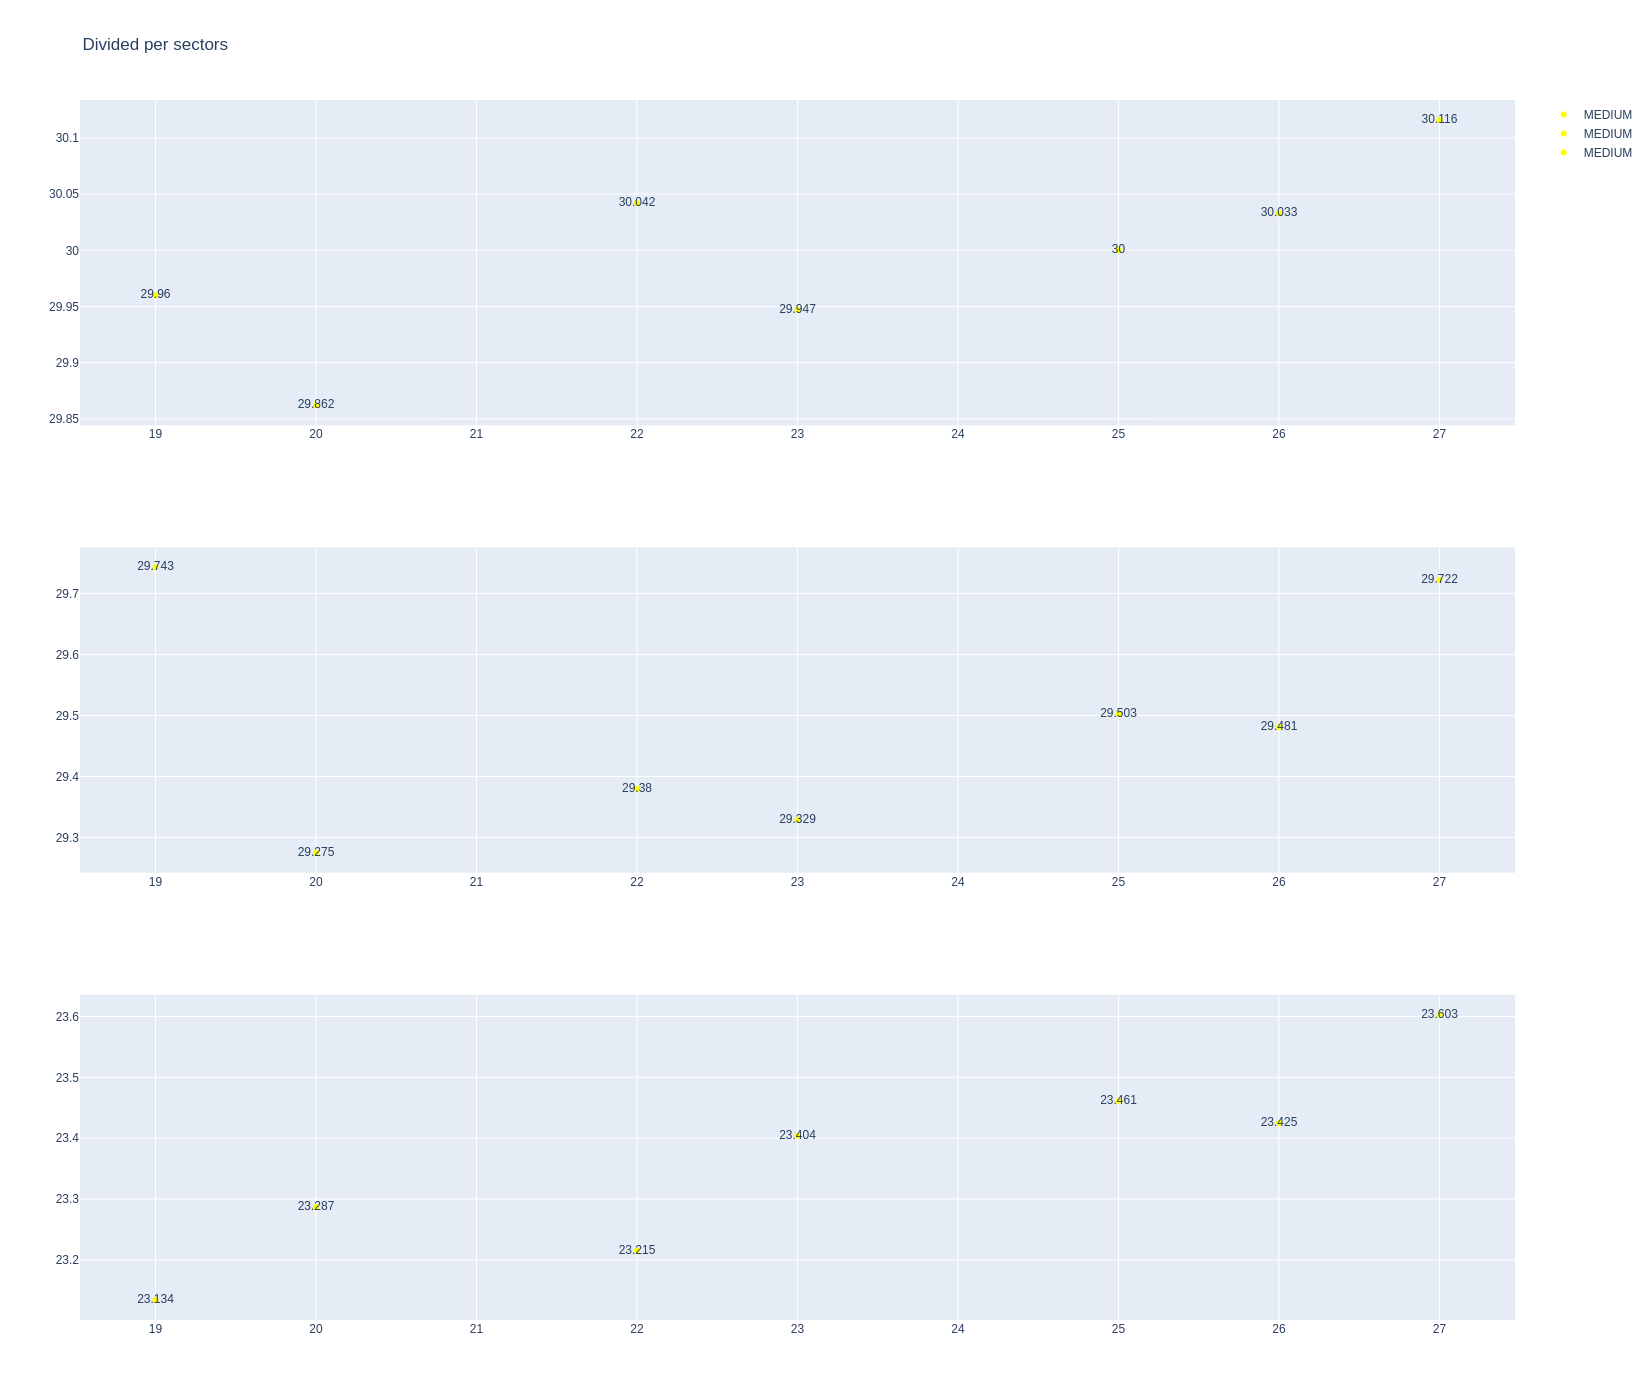

In [25]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [26]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1266         9922             1             16          1        3   
6          1266         9922             1             44          1        3   
22         1266         9922             2             16          4        6   
27         1266         9922             2             44          4        7   
35         1266         9922             3             16          7        9   
41         1266         9922             3             44          8        9   
54         1266         9922             4             44         10       12   
56         1266         9922             4             16         10       13   
72         1266         9922             5             44         13       15   
79         1266         9922             5             16         14       16   
91         1266         9922             6             44         16       28   
95         1266         9922             6             16         17       28   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
6    MEDIUM                  0  
22   MEDIUM                  0  
27   MEDIUM                  3  
35   MEDIUM                  6  
41   MEDIUM                  7  
54     SOFT                  0  
56     SOFT                  0  
72     SOFT                  3  
79     SOFT                  4  
91     SOFT                  0  
95   MEDIUM                  9

In [27]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
372  Charles LECLERC   MEDIUM  2025-08-01T15:49:20.072000+00:00          19   
391  Charles LECLERC   MEDIUM  2025-08-01T15:50:41.068000+00:00          20   
410  Charles LECLERC   MEDIUM  2025-08-01T15:52:02.881000+00:00          21   
430  Charles LECLERC   MEDIUM  2025-08-01T15:53:24.797000+00:00          22   
471  Charles LECLERC   MEDIUM  2025-08-01T15:56:17.185000+00:00          24   
490  Charles LECLERC   MEDIUM  2025-08-01T15:57:40.333000+00:00          25   
507  Charles LECLERC   MEDIUM  2025-08-01T15:59:02.745000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
372             29.549             29.001             23.085        81.635  
391             29.656             29.118             23.080        81.854  
410             29.666             28.897             23.340        81.903  
430             29.772             29.122             23.417        82.311  
471             30.185             29.400             23.545        83.130  
490             29.803             29.256             23.384        82.443  
507             29.670             29.173             23.379        82.222

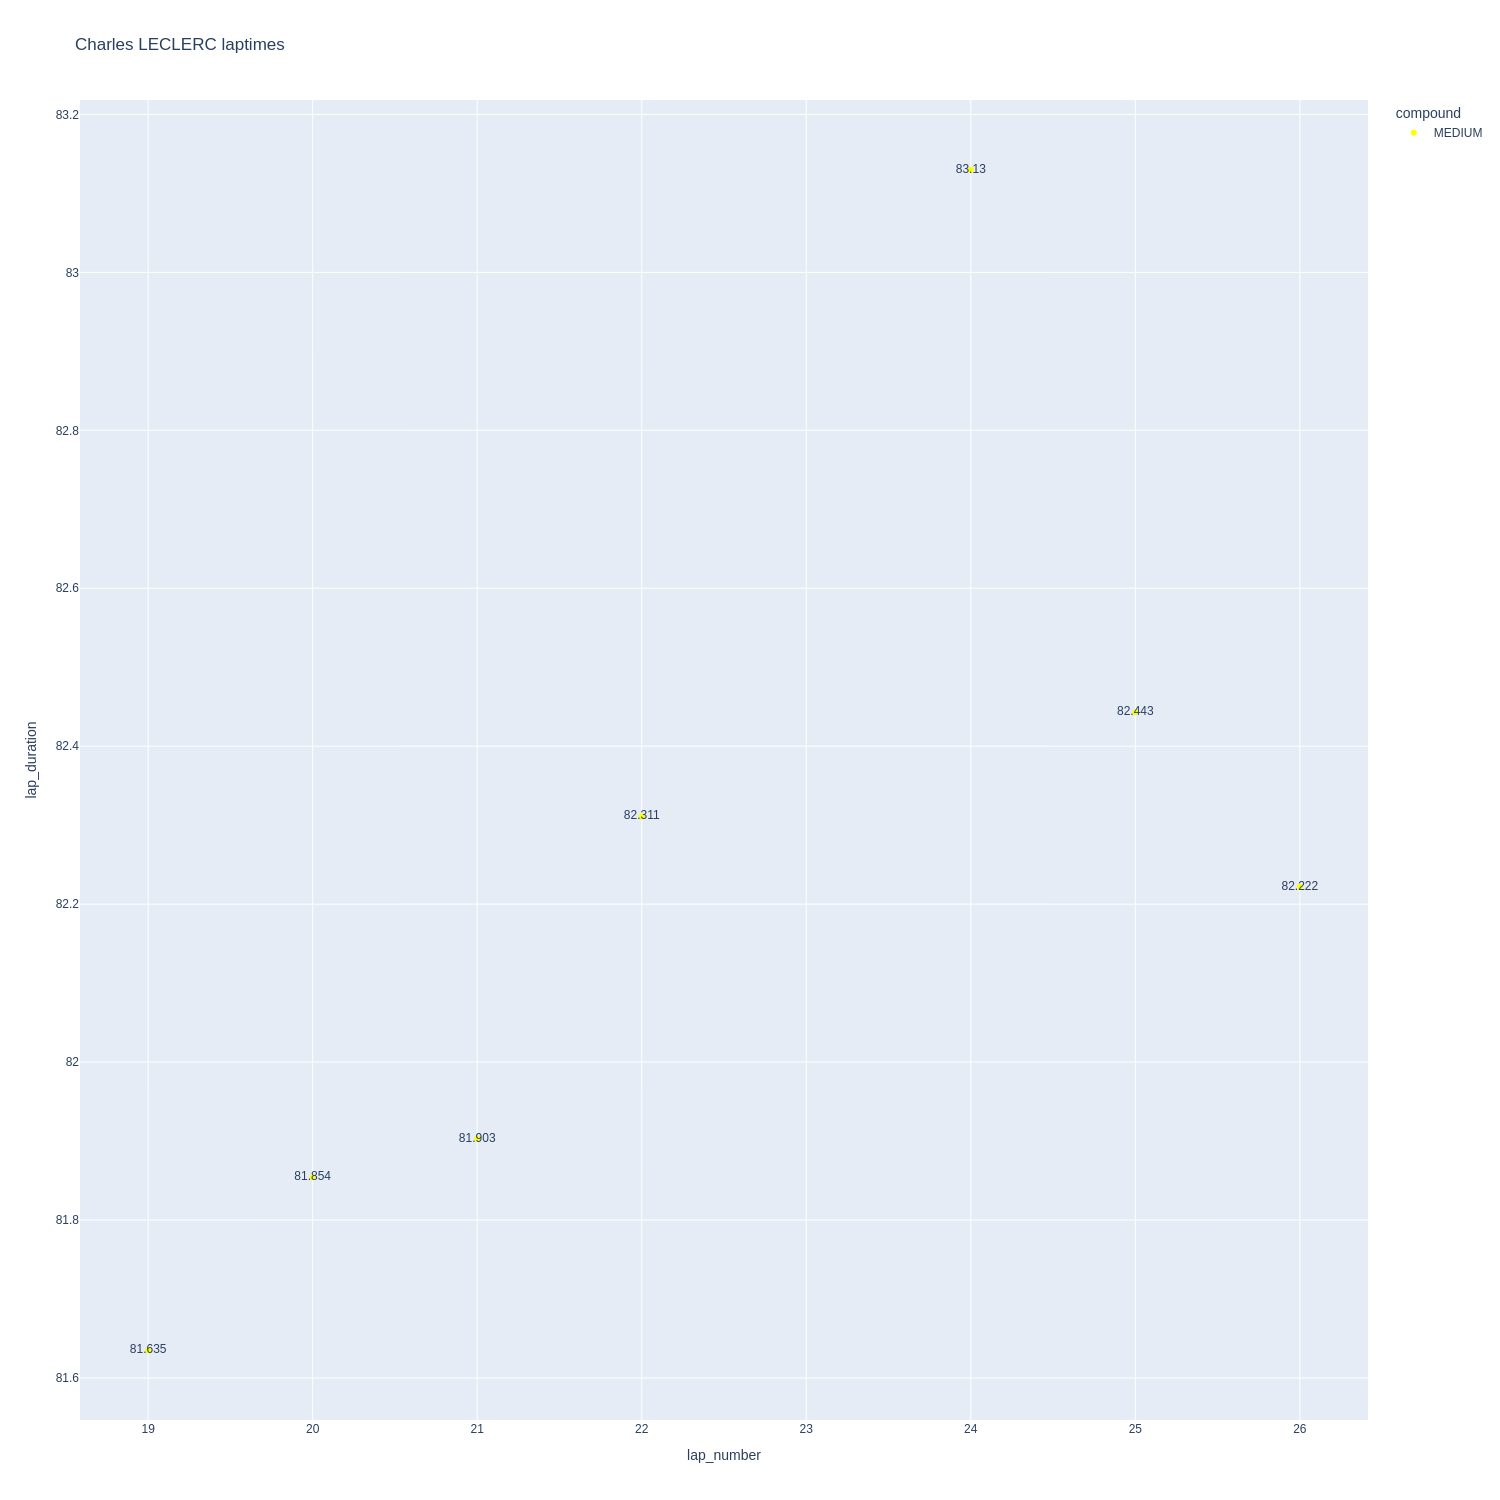

In [28]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

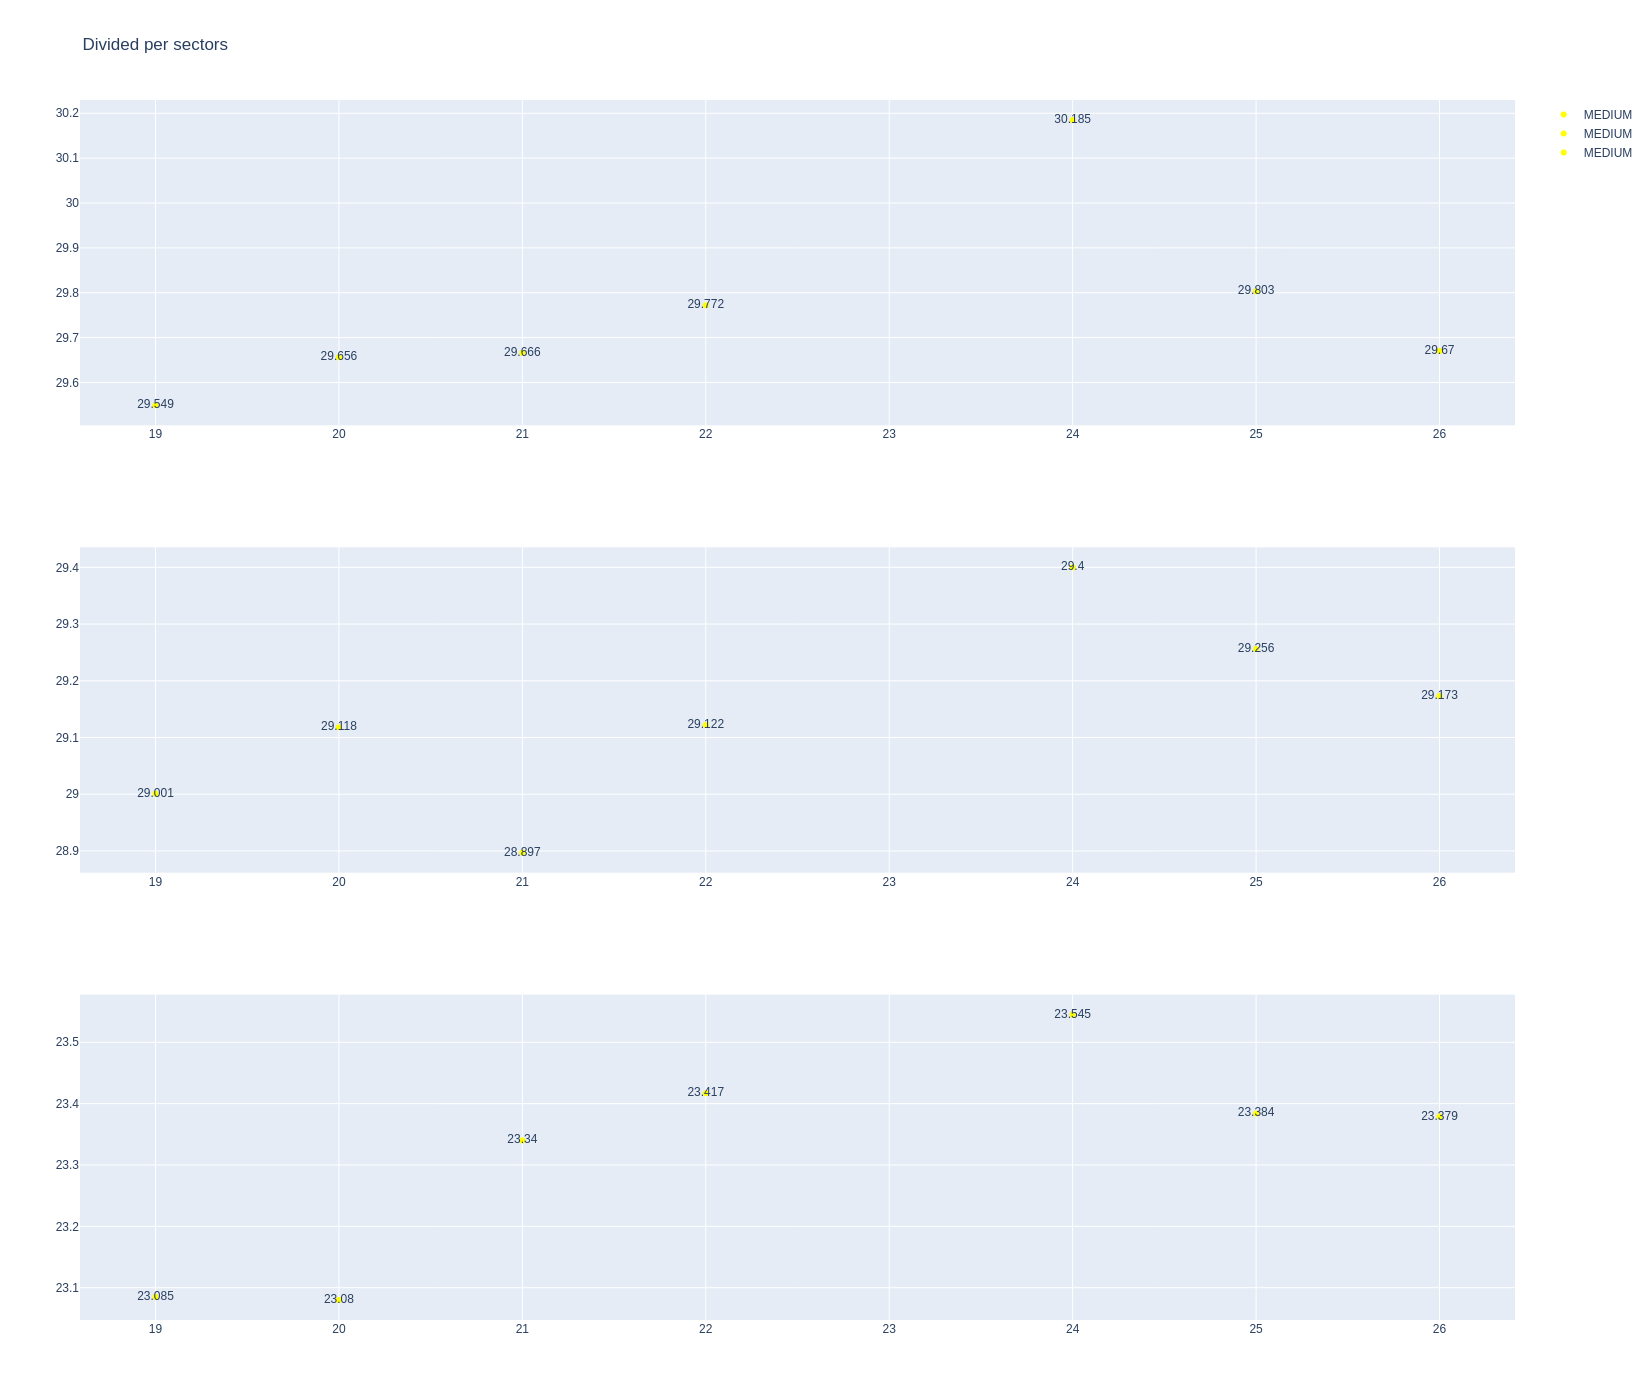

In [29]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [30]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
333  Lewis HAMILTON     SOFT  2025-08-01T15:46:20.495000+00:00          17   
371  Lewis HAMILTON     SOFT  2025-08-01T15:49:13.673000+00:00          19   
390  Lewis HAMILTON     SOFT  2025-08-01T15:50:35.006000+00:00          20   
429  Lewis HAMILTON     SOFT  2025-08-01T15:53:22.188000+00:00          22   
449  Lewis HAMILTON     SOFT  2025-08-01T15:54:44.182000+00:00          23   
469  Lewis HAMILTON     SOFT  2025-08-01T15:56:06.638000+00:00          24   
488  Lewis HAMILTON     SOFT  2025-08-01T15:57:29.460000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
333             29.528             28.958             23.044        81.530  
371             29.438             28.873             22.965        81.276  
390             29.471             29.095             23.335        81.901  
429             29.522             29.154             23.295        81.971  
449             29.690             29.387             23.433        82.510  
469             29.776             29.427             23.584        82.787  
488             29.808             29.505             23.615        82.928

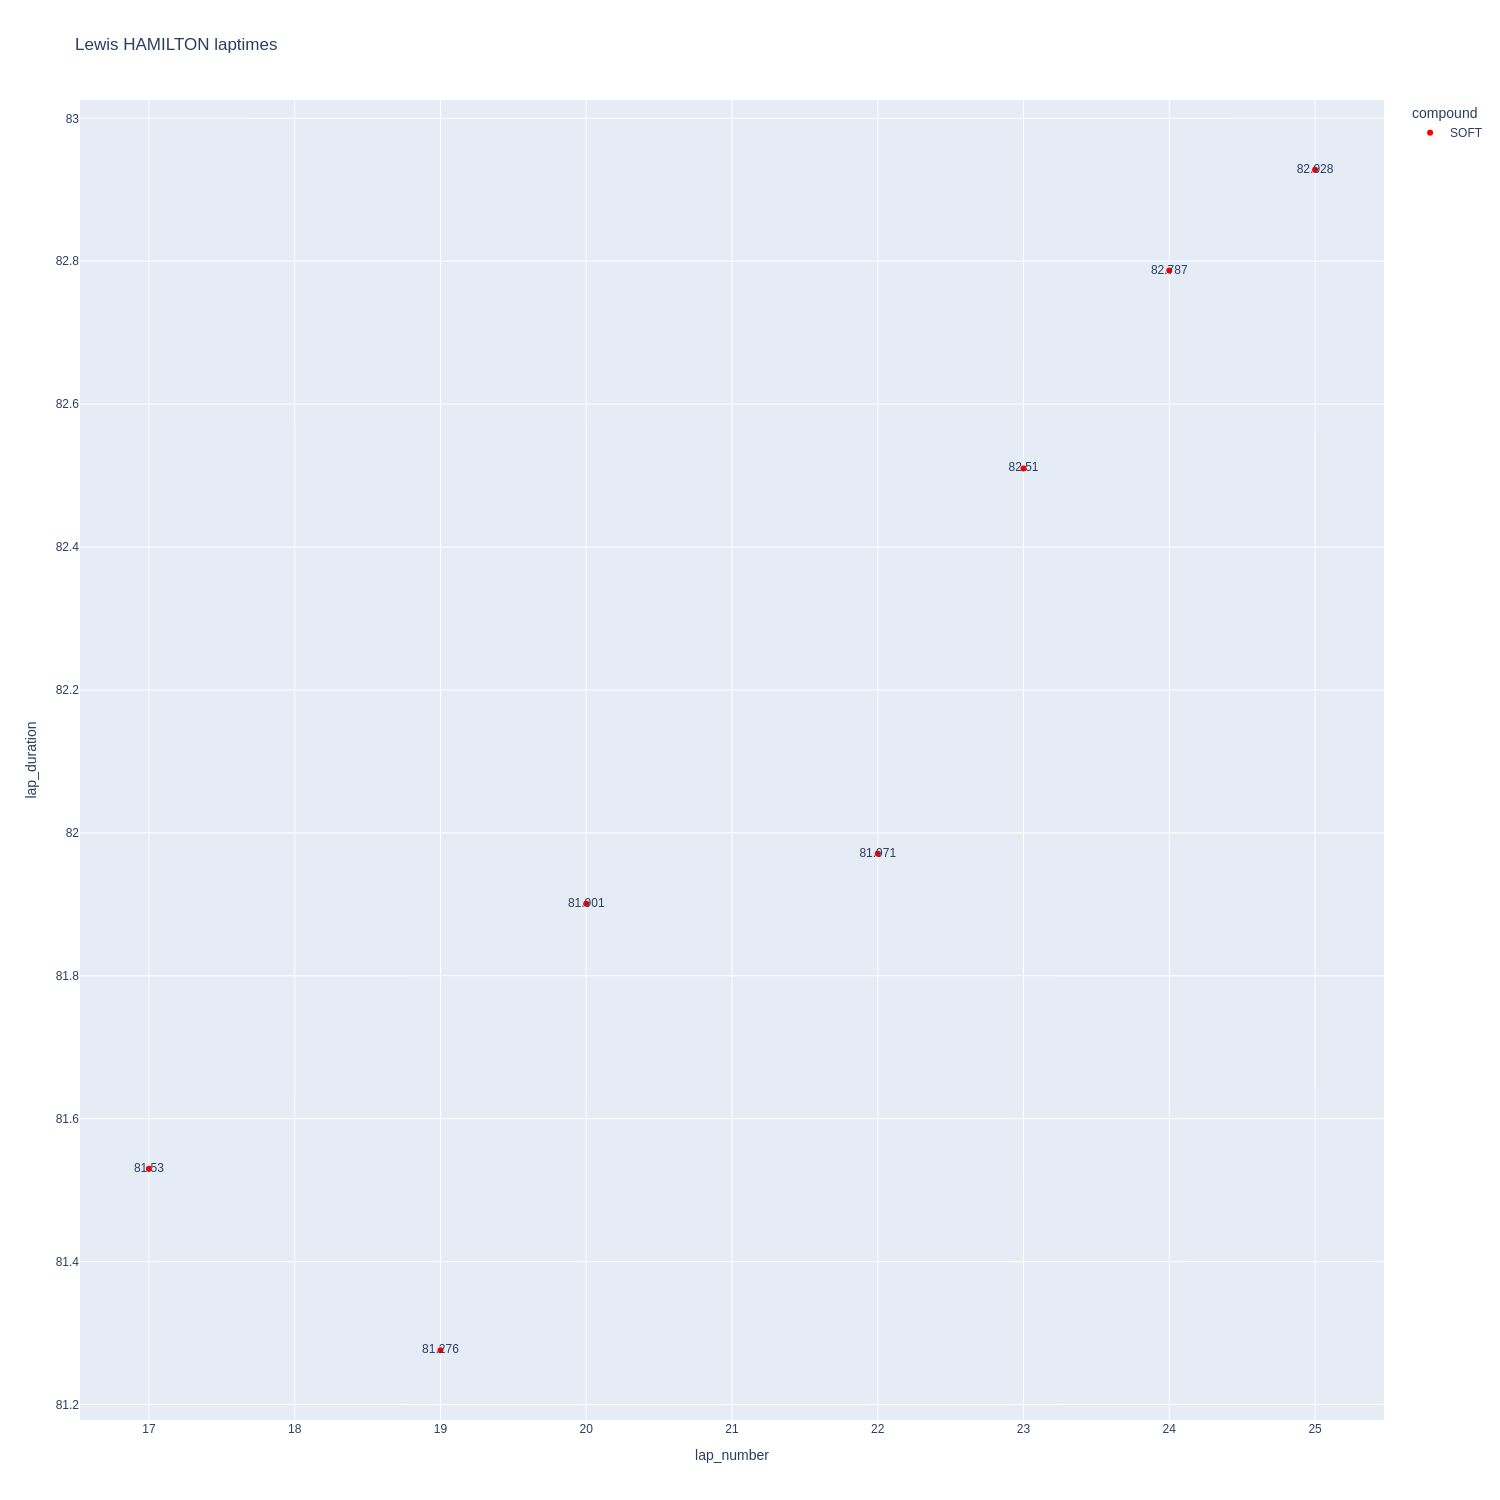

In [31]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

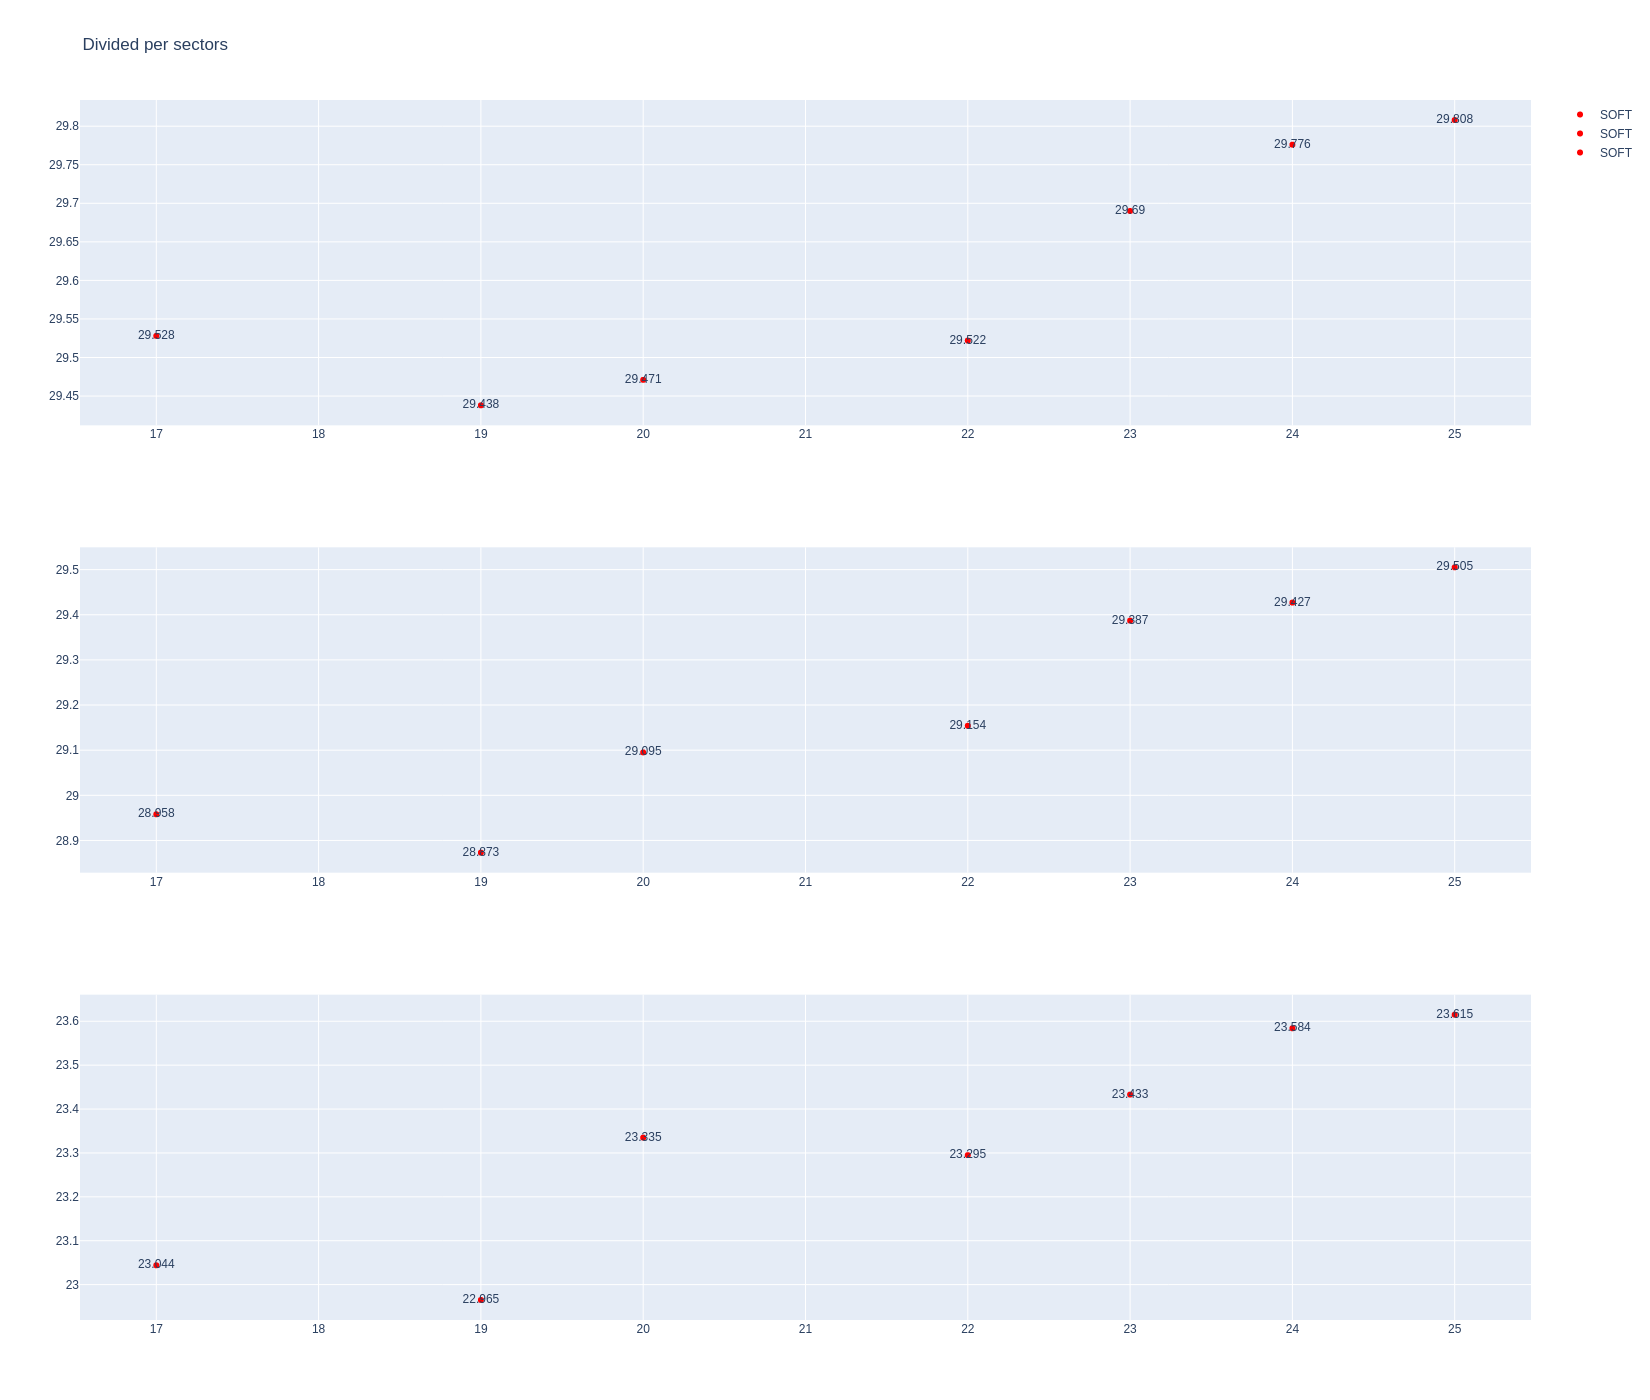

In [32]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [33]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  \
2           1266         9922             1             12          1   
7           1266         9922             1             63          1   
21          1266         9922             2             12          4   
25          1266         9922             2             63          4   
32          1266         9922             3             63          7   
34          1266         9922             3             12          7   
47          1266         9922             4             63          9   
51          1266         9922             4             12         10   
67          1266         9922             5             63         12   
75          1266         9922             5             12         13   
83          1266         9922             6             63         15   
102         1266         9922             7             63         25   

     lap_end compound  tyre_age_at_start  
2          3   MEDIUM                  0  
7          3   MEDIUM                  0  
21         6   MEDIUM                  3  
25         6   MEDIUM                  3  
32         8   MEDIUM                  0  
34         9     SOFT                  0  
47        11     SOFT                  0  
51        12     SOFT                  3  
67        14     SOFT                  3  
75        26   MEDIUM                  6  
83        24   MEDIUM                  8  
102       27     SOFT                  6

In [34]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
327  Kimi ANTONELLI   MEDIUM  2025-08-01T15:45:50.596000+00:00          14   
345  Kimi ANTONELLI   MEDIUM  2025-08-01T15:47:13.007000+00:00          15   
364  Kimi ANTONELLI   MEDIUM  2025-08-01T15:48:34.660000+00:00          16   
383  Kimi ANTONELLI   MEDIUM  2025-08-01T15:49:56.784000+00:00          17   
402  Kimi ANTONELLI   MEDIUM  2025-08-01T15:51:19.274000+00:00          18   
441  Kimi ANTONELLI   MEDIUM  2025-08-01T15:54:06.600000+00:00          20   
461  Kimi ANTONELLI   MEDIUM  2025-08-01T15:55:29.032000+00:00          21   
481  Kimi ANTONELLI   MEDIUM  2025-08-01T15:56:51.573000+00:00          22   
499  Kimi ANTONELLI   MEDIUM  2025-08-01T15:58:14.291000+00:00          23   
517  Kimi ANTONELLI   MEDIUM  2025-08-01T15:59:37.261000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
327             29.749             29.609             22.971        82.329  
345             29.496             29.136             23.120        81.752  
364             29.685             29.234             23.093        82.012  
383             29.631             29.140             23.049        81.820  
402             29.612             29.160             23.217        81.989  
441             29.808             29.217             23.421        82.446  
461             29.800             29.246             23.487        82.533  
481             29.929             29.414             23.429        82.772  
499             29.897             29.600             23.376        82.873  
517             29.925             29.648             23.492        83.065

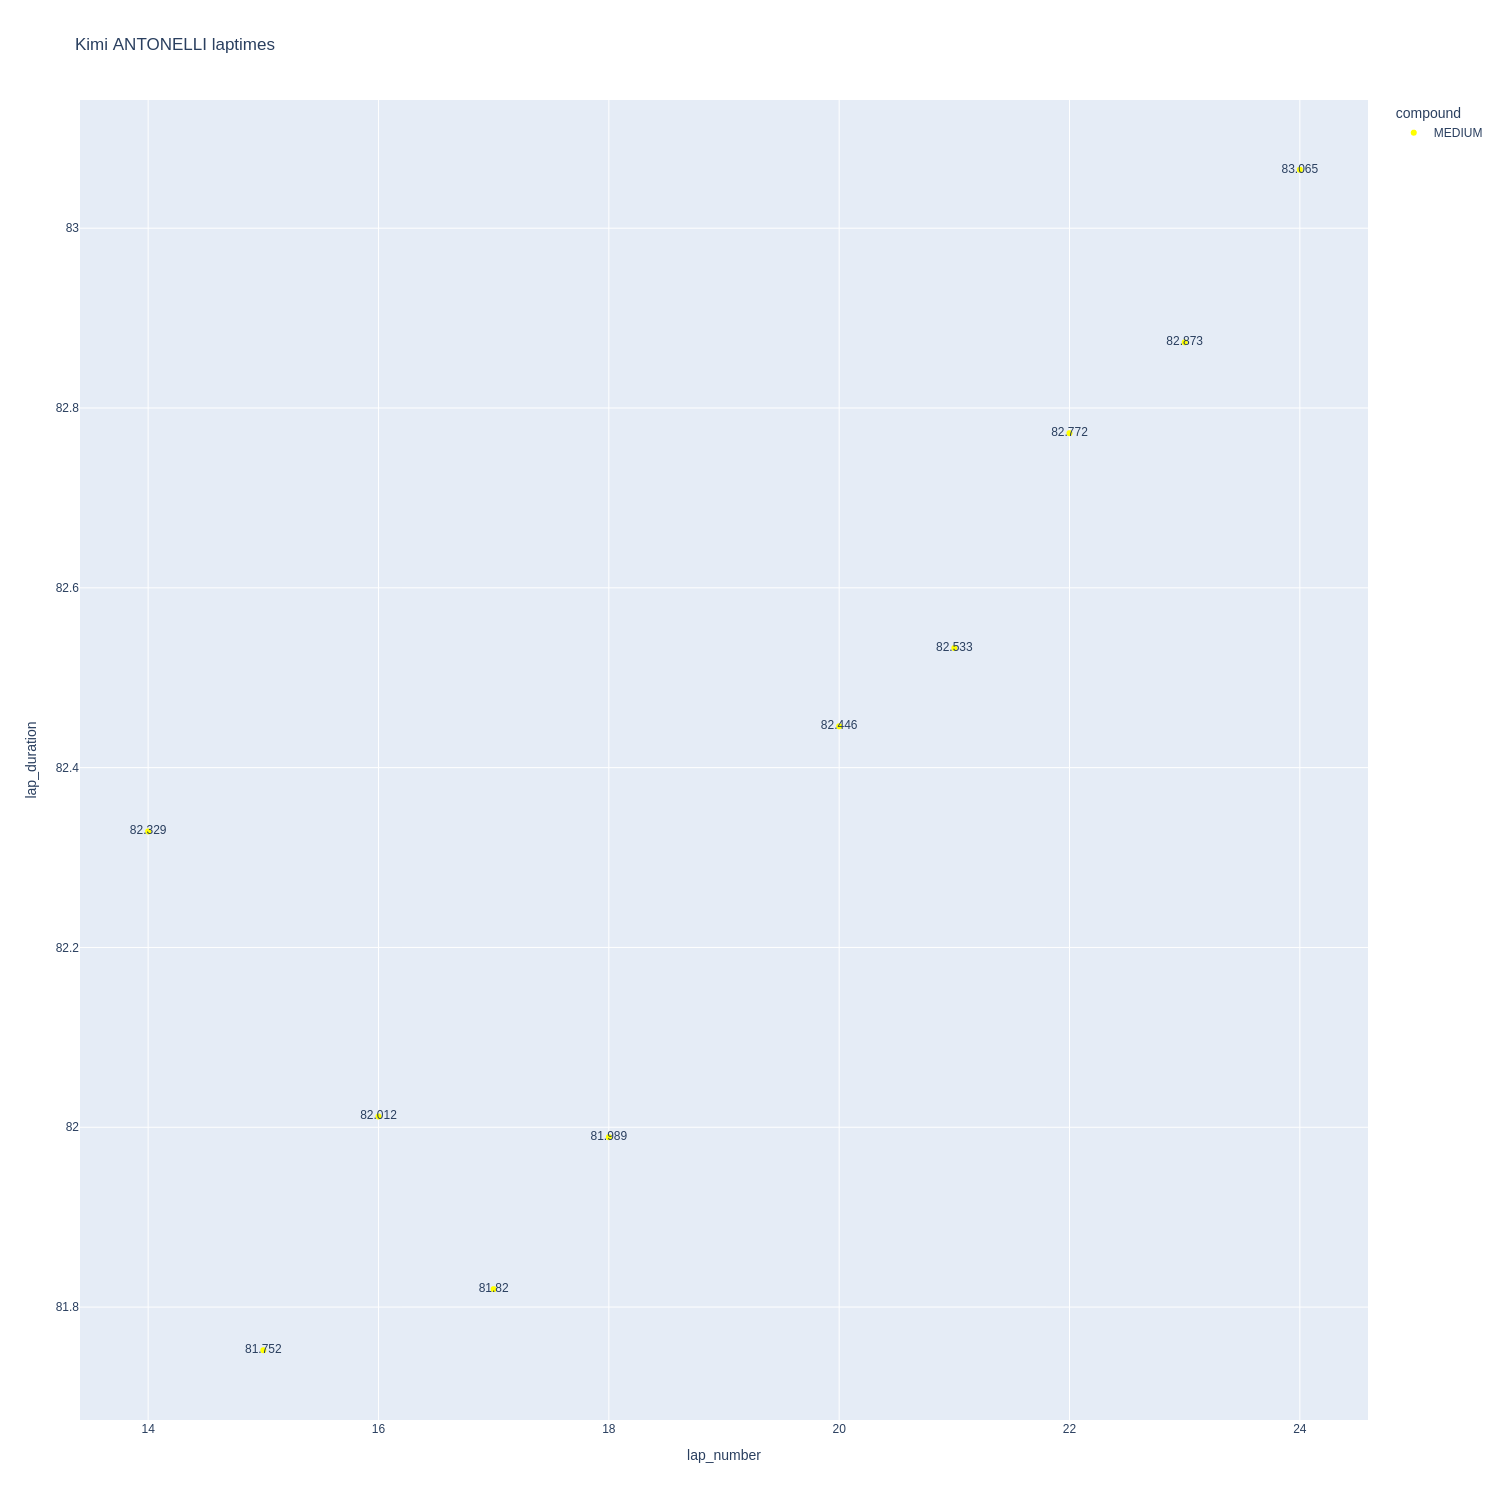

In [35]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

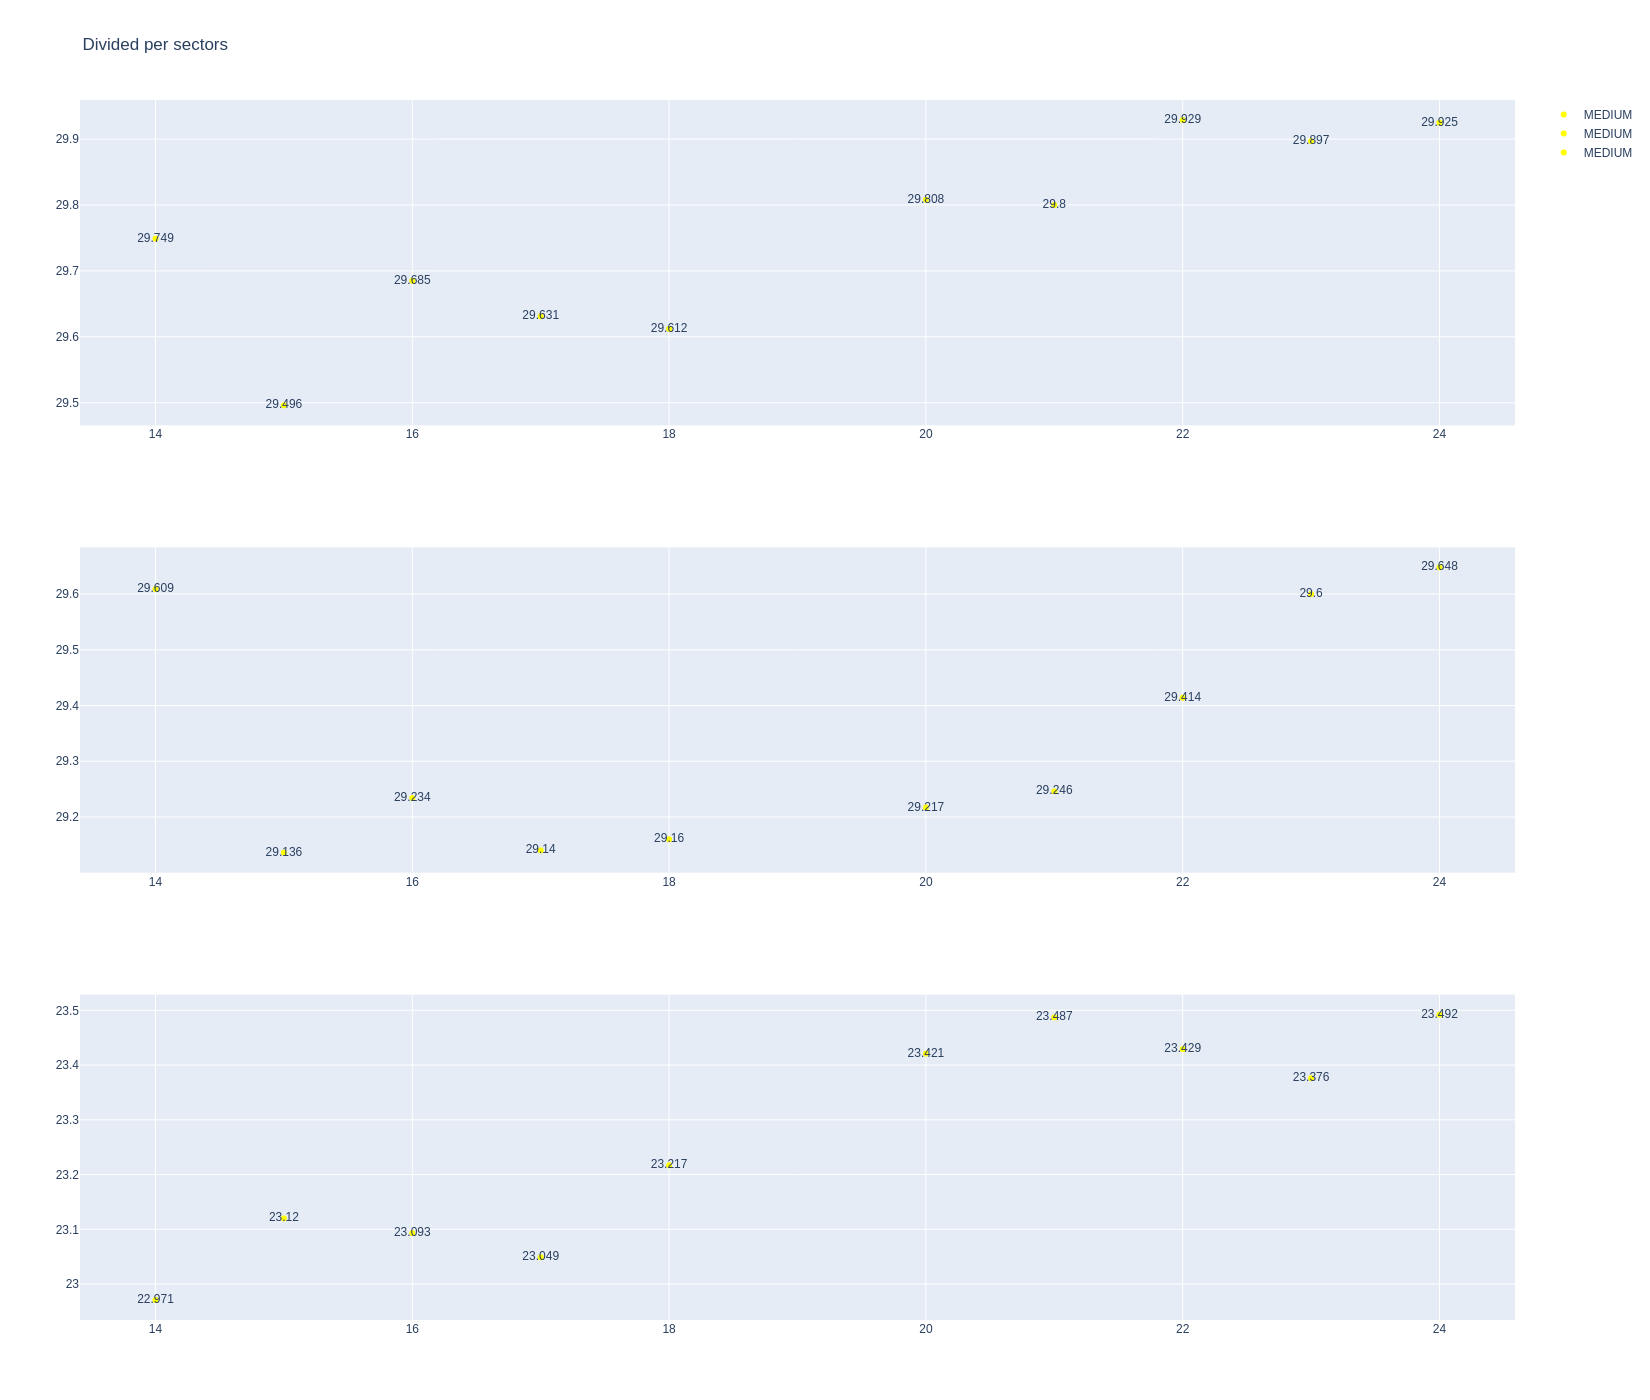

In [36]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [37]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
342  George RUSSELL   MEDIUM  2025-08-01T15:47:00.620000+00:00          16   
361  George RUSSELL   MEDIUM  2025-08-01T15:48:22.614000+00:00          17   
380  George RUSSELL   MEDIUM  2025-08-01T15:49:44.512000+00:00          18   
418  George RUSSELL   MEDIUM  2025-08-01T15:52:32.569000+00:00          20   
458  George RUSSELL   MEDIUM  2025-08-01T15:55:20.179000+00:00          22   
478  George RUSSELL   MEDIUM  2025-08-01T15:56:43.314000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
342             29.649             29.128             23.140        81.917  
361             29.639             29.122             23.154        81.915  
380             29.751             29.065             23.187        82.003  
418             29.923             29.081             23.263        82.267  
458             29.980             29.495             23.593        83.068  
478             30.266             29.553             23.711        83.530

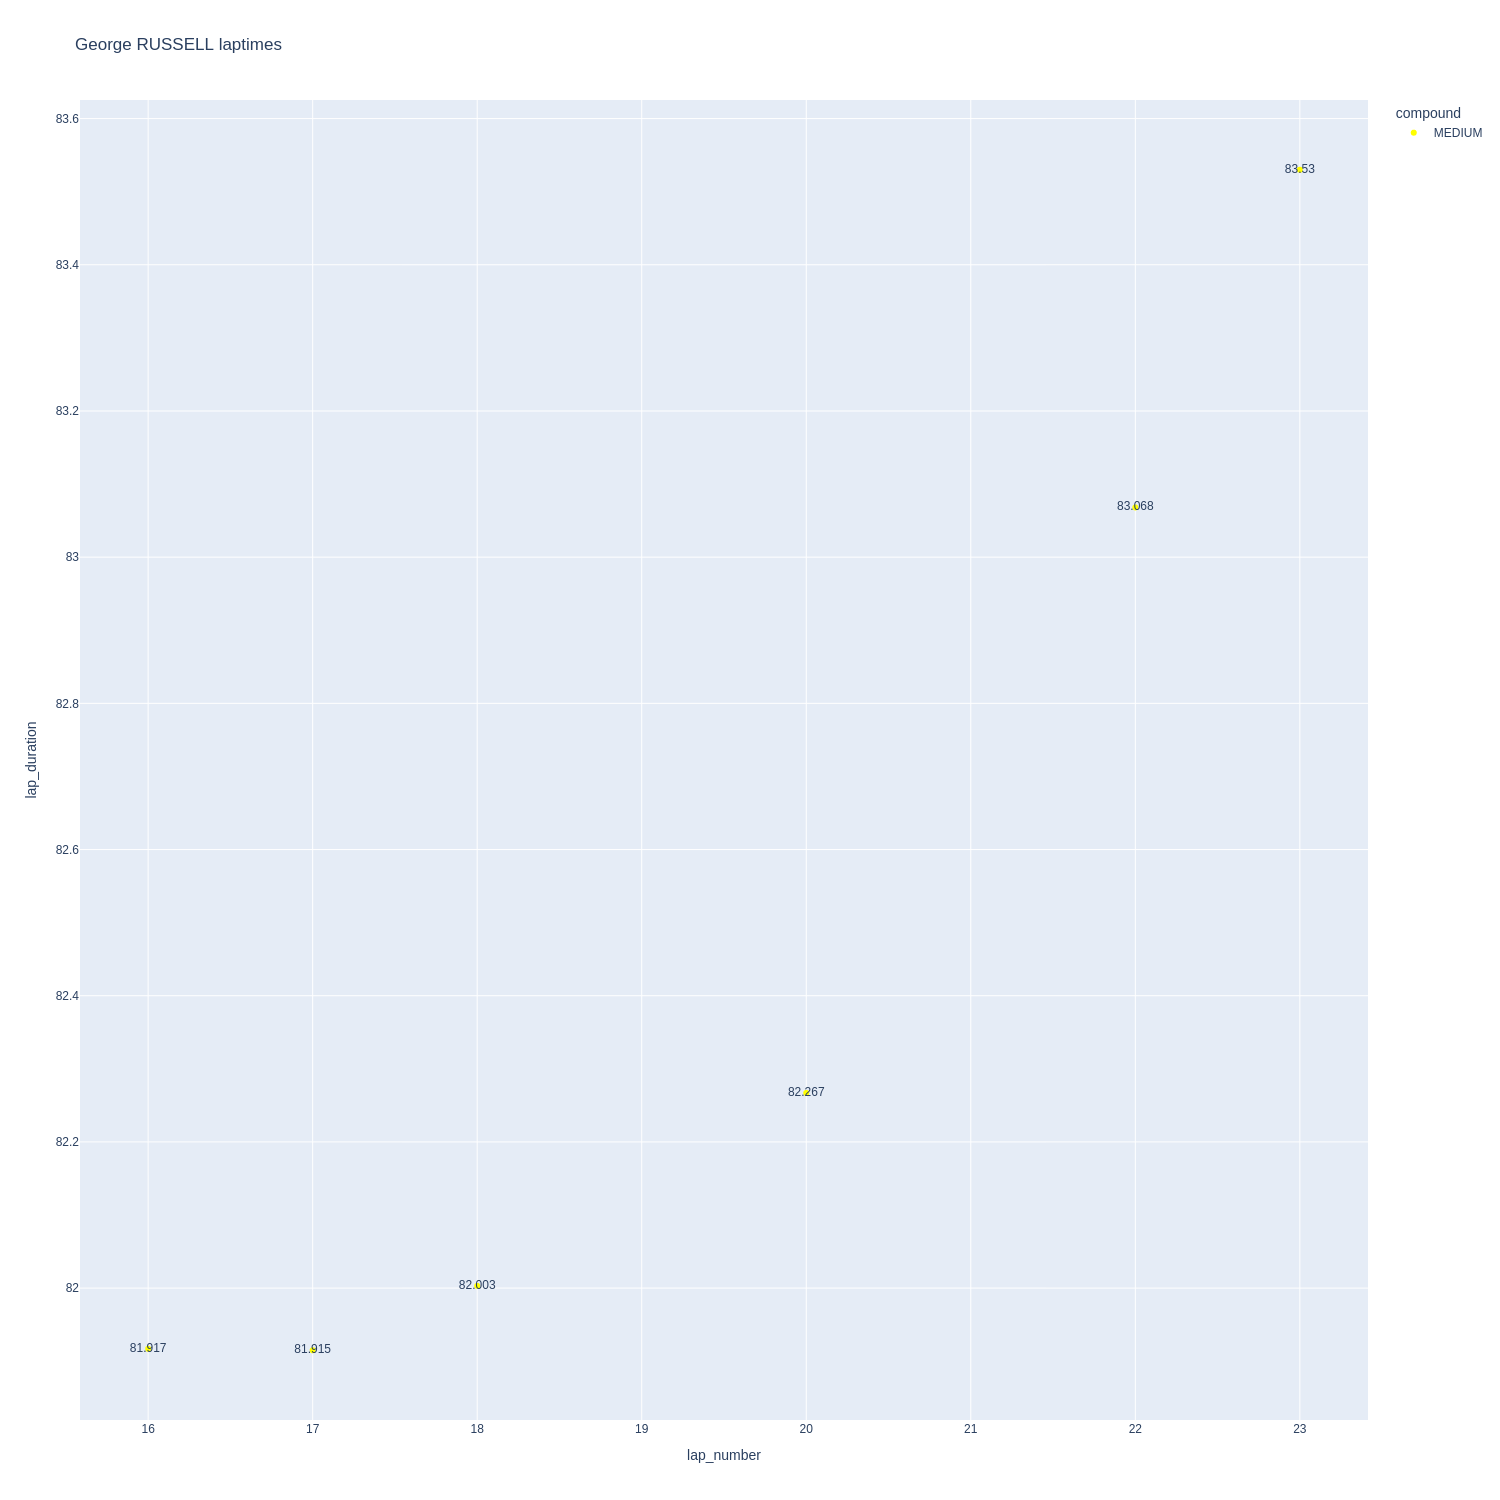

In [38]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

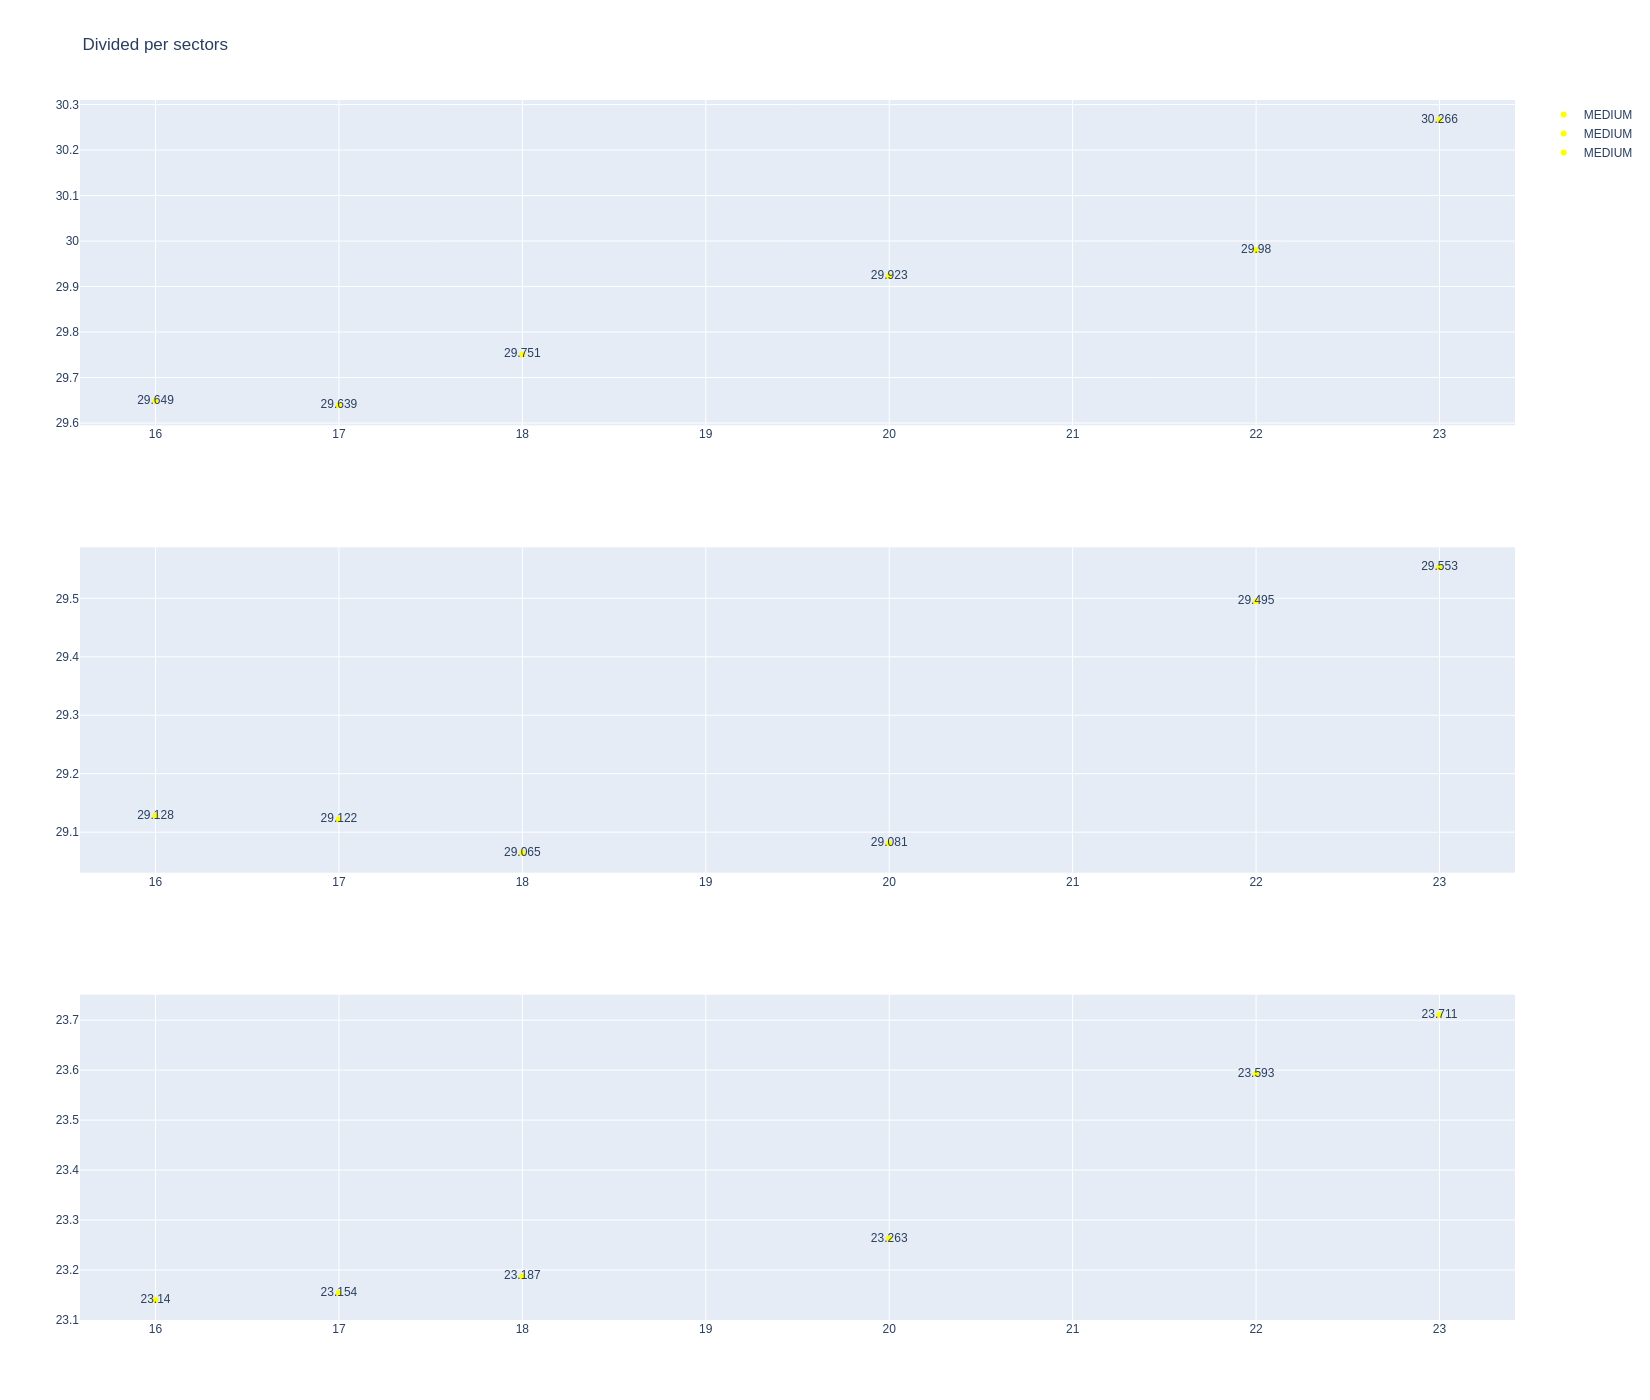

In [39]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [40]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  \
8           1266         9922             1             81          1   
14          1266         9922             1              4          1   
26          1266         9922             2             81          4   
38          1266         9922             3             81          7   
43          1266         9922             2              4          8   
55          1266         9922             4             81         10   
63          1266         9922             3              4         12   
73          1266         9922             5             81         13   
82          1266         9922             4              4         15   
89          1266         9922             6             81         16   
100         1266         9922             5              4         24   
107         1266         9922             7             81         28   

     lap_end compound  tyre_age_at_start  
8          3   MEDIUM                  0  
14         7   MEDIUM                  0  
26         6   MEDIUM                  3  
38         9   MEDIUM                  6  
43        11     SOFT                  0  
55        12     SOFT                  0  
63        14     SOFT                  0  
73        15     SOFT                  0  
82        23   MEDIUM                  7  
89        27   MEDIUM                  9  
100       27     SOFT                  7  
107       30     SOFT                  6

In [41]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
335  Lando NORRIS   MEDIUM  2025-08-01T15:46:26.441000+00:00          16   
352  Lando NORRIS   MEDIUM  2025-08-01T15:47:47.811000+00:00          17   
370  Lando NORRIS   MEDIUM  2025-08-01T15:49:09.015000+00:00          18   
389  Lando NORRIS   MEDIUM  2025-08-01T15:50:31.162000+00:00          19   
408  Lando NORRIS   MEDIUM  2025-08-01T15:51:54.556000+00:00          20   
428  Lando NORRIS   MEDIUM  2025-08-01T15:53:17.297000+00:00          21   
448  Lando NORRIS   MEDIUM  2025-08-01T15:54:38.923000+00:00          22   
509  Lando NORRIS     SOFT  2025-08-01T15:59:11.689000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
335             29.536             28.857             22.919        81.312  
352             29.525             28.768             22.933        81.226  
370             29.627             29.564             23.083        82.274  
389             29.502             29.448             24.450        83.400  
408             31.025             28.707             22.927        82.659  
428             29.532             28.900             23.146        81.578  
448             29.640             29.245             23.592        82.477  
509             29.447             29.949             22.793        82.189

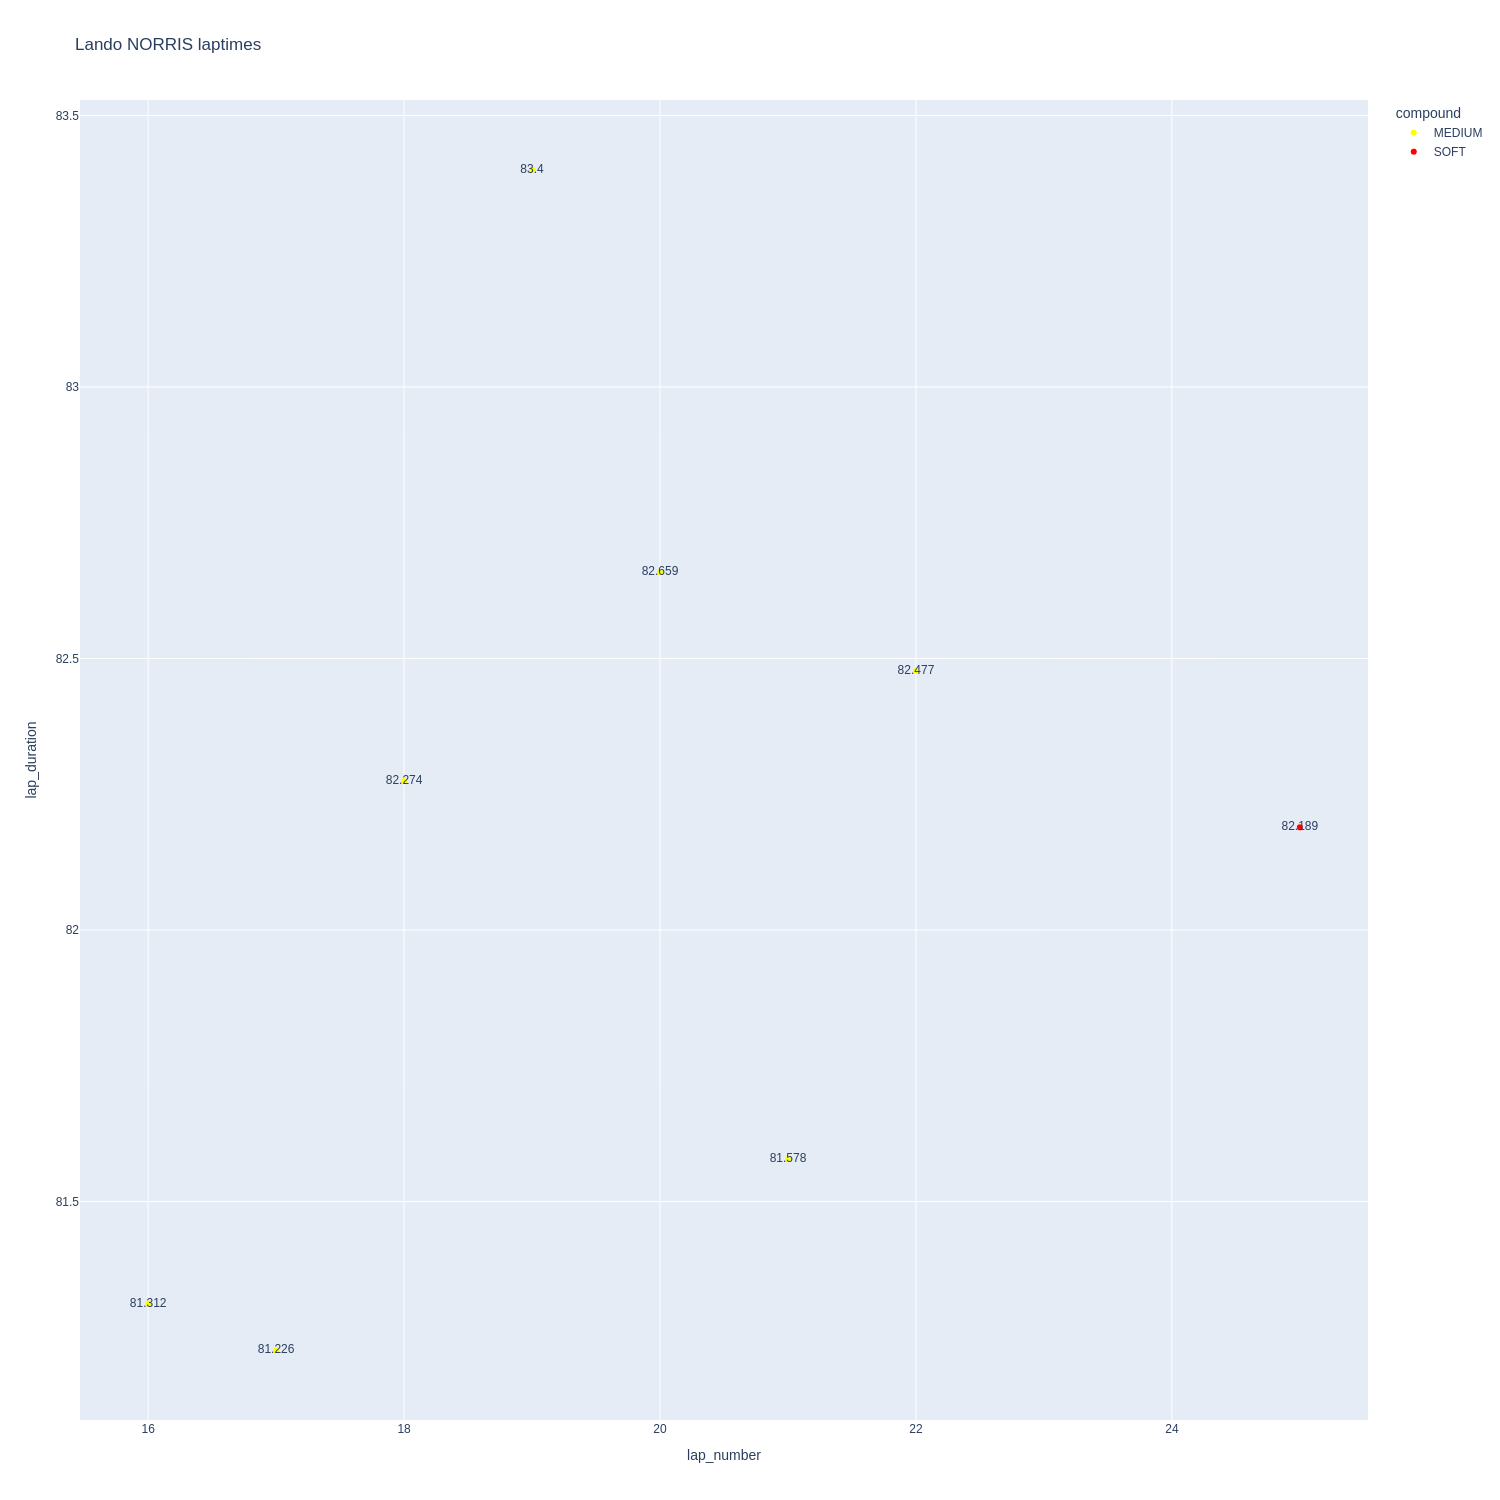

In [42]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

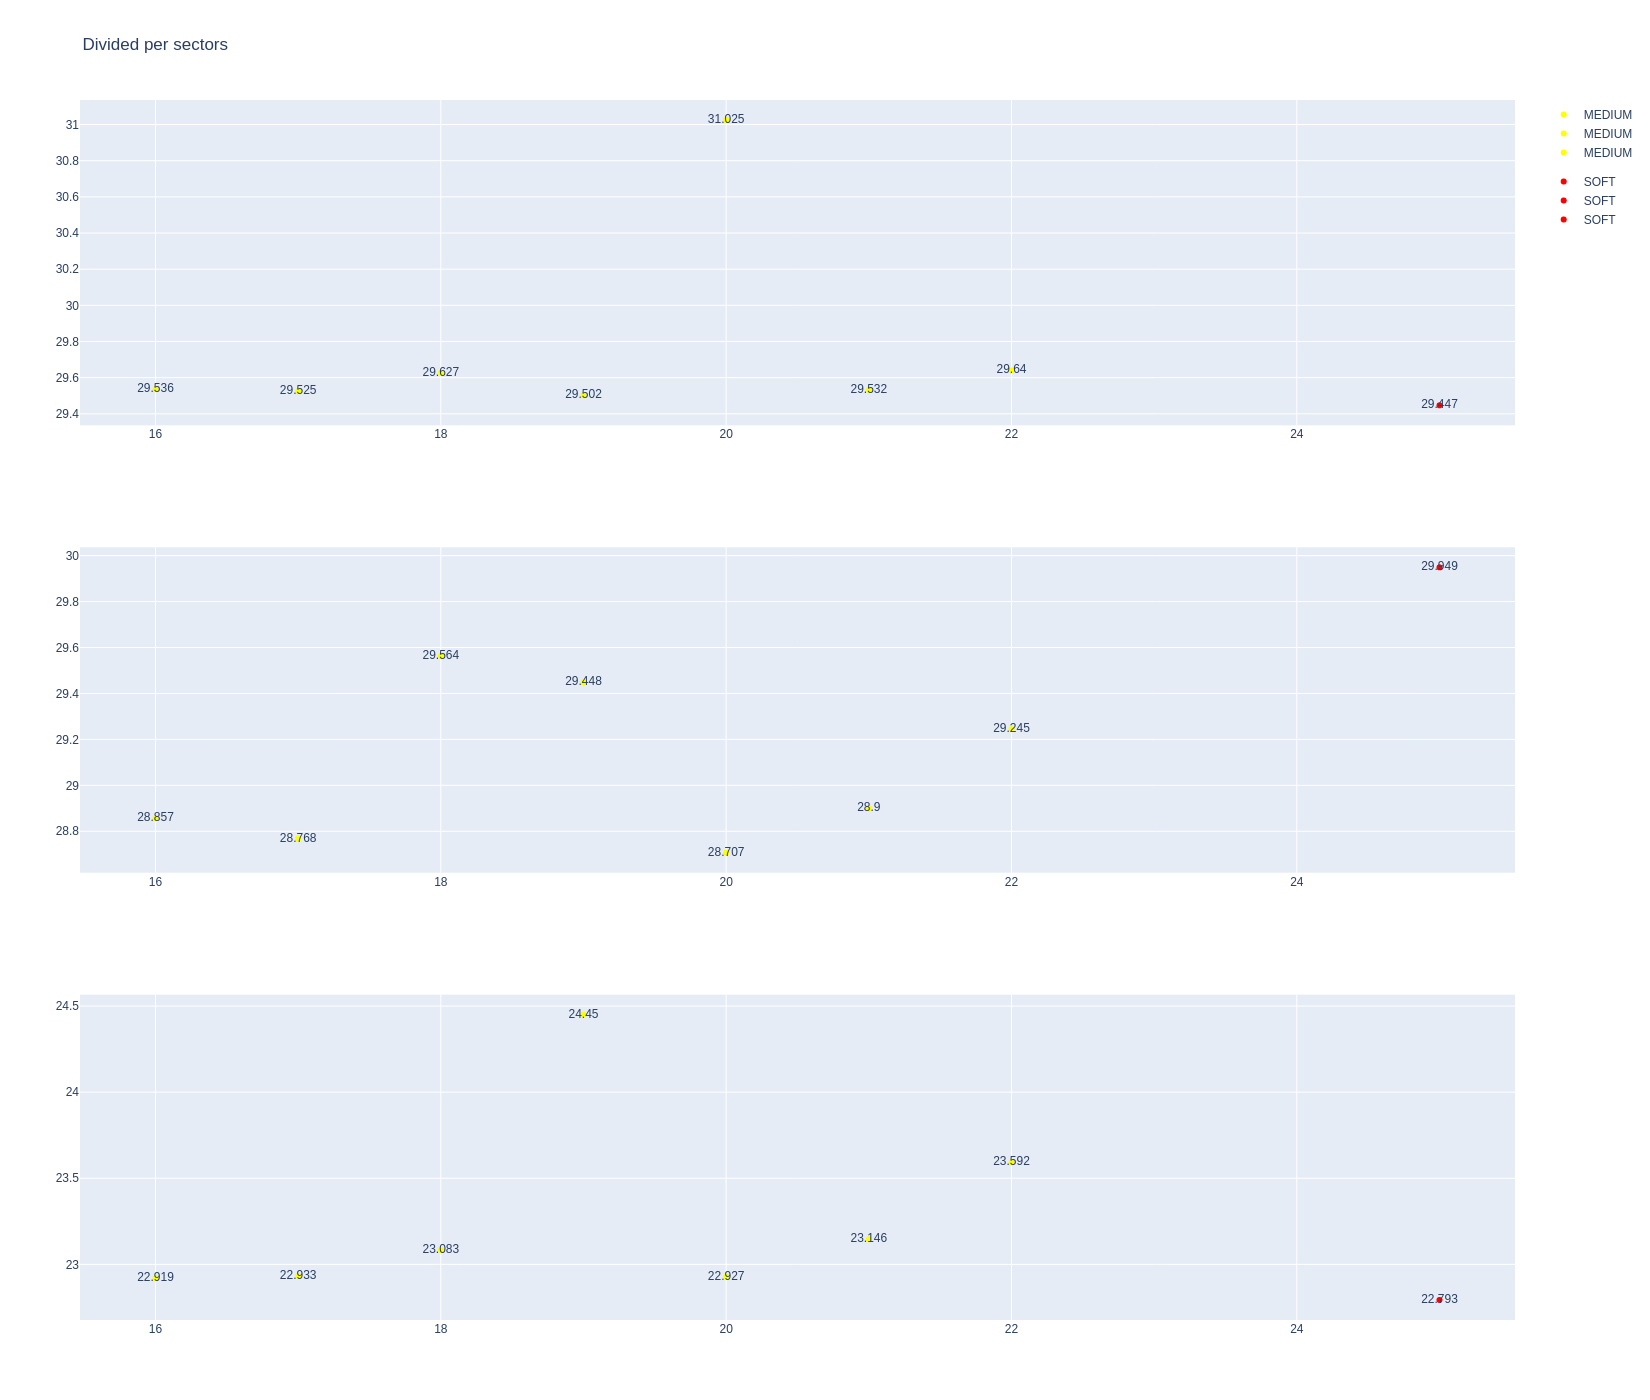

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [44]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
308  Oscar PIASTRI   MEDIUM  2025-08-01T15:43:58.112000+00:00          17   
324  Oscar PIASTRI   MEDIUM  2025-08-01T15:45:19.933000+00:00          18   
339  Oscar PIASTRI   MEDIUM  2025-08-01T15:46:42.269000+00:00          19   
358  Oscar PIASTRI   MEDIUM  2025-08-01T15:48:03.864000+00:00          20   
394  Oscar PIASTRI   MEDIUM  2025-08-01T15:50:51.193000+00:00          22   
433  Oscar PIASTRI   MEDIUM  2025-08-01T15:53:38.328000+00:00          24   
453  Oscar PIASTRI   MEDIUM  2025-08-01T15:55:00.226000+00:00          25   
473  Oscar PIASTRI   MEDIUM  2025-08-01T15:56:22.810000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
308             29.679             29.306             22.843        81.828  
324             30.011             29.362             23.032        82.405  
339             29.565             28.932             23.104        81.601  
358             29.795             29.342             23.355        82.492  
394             29.650             28.728             23.157        81.535  
433             29.733             29.024             23.093        81.850  
453             29.830             29.355             23.482        82.667  
473             30.015             29.627             23.556        83.198

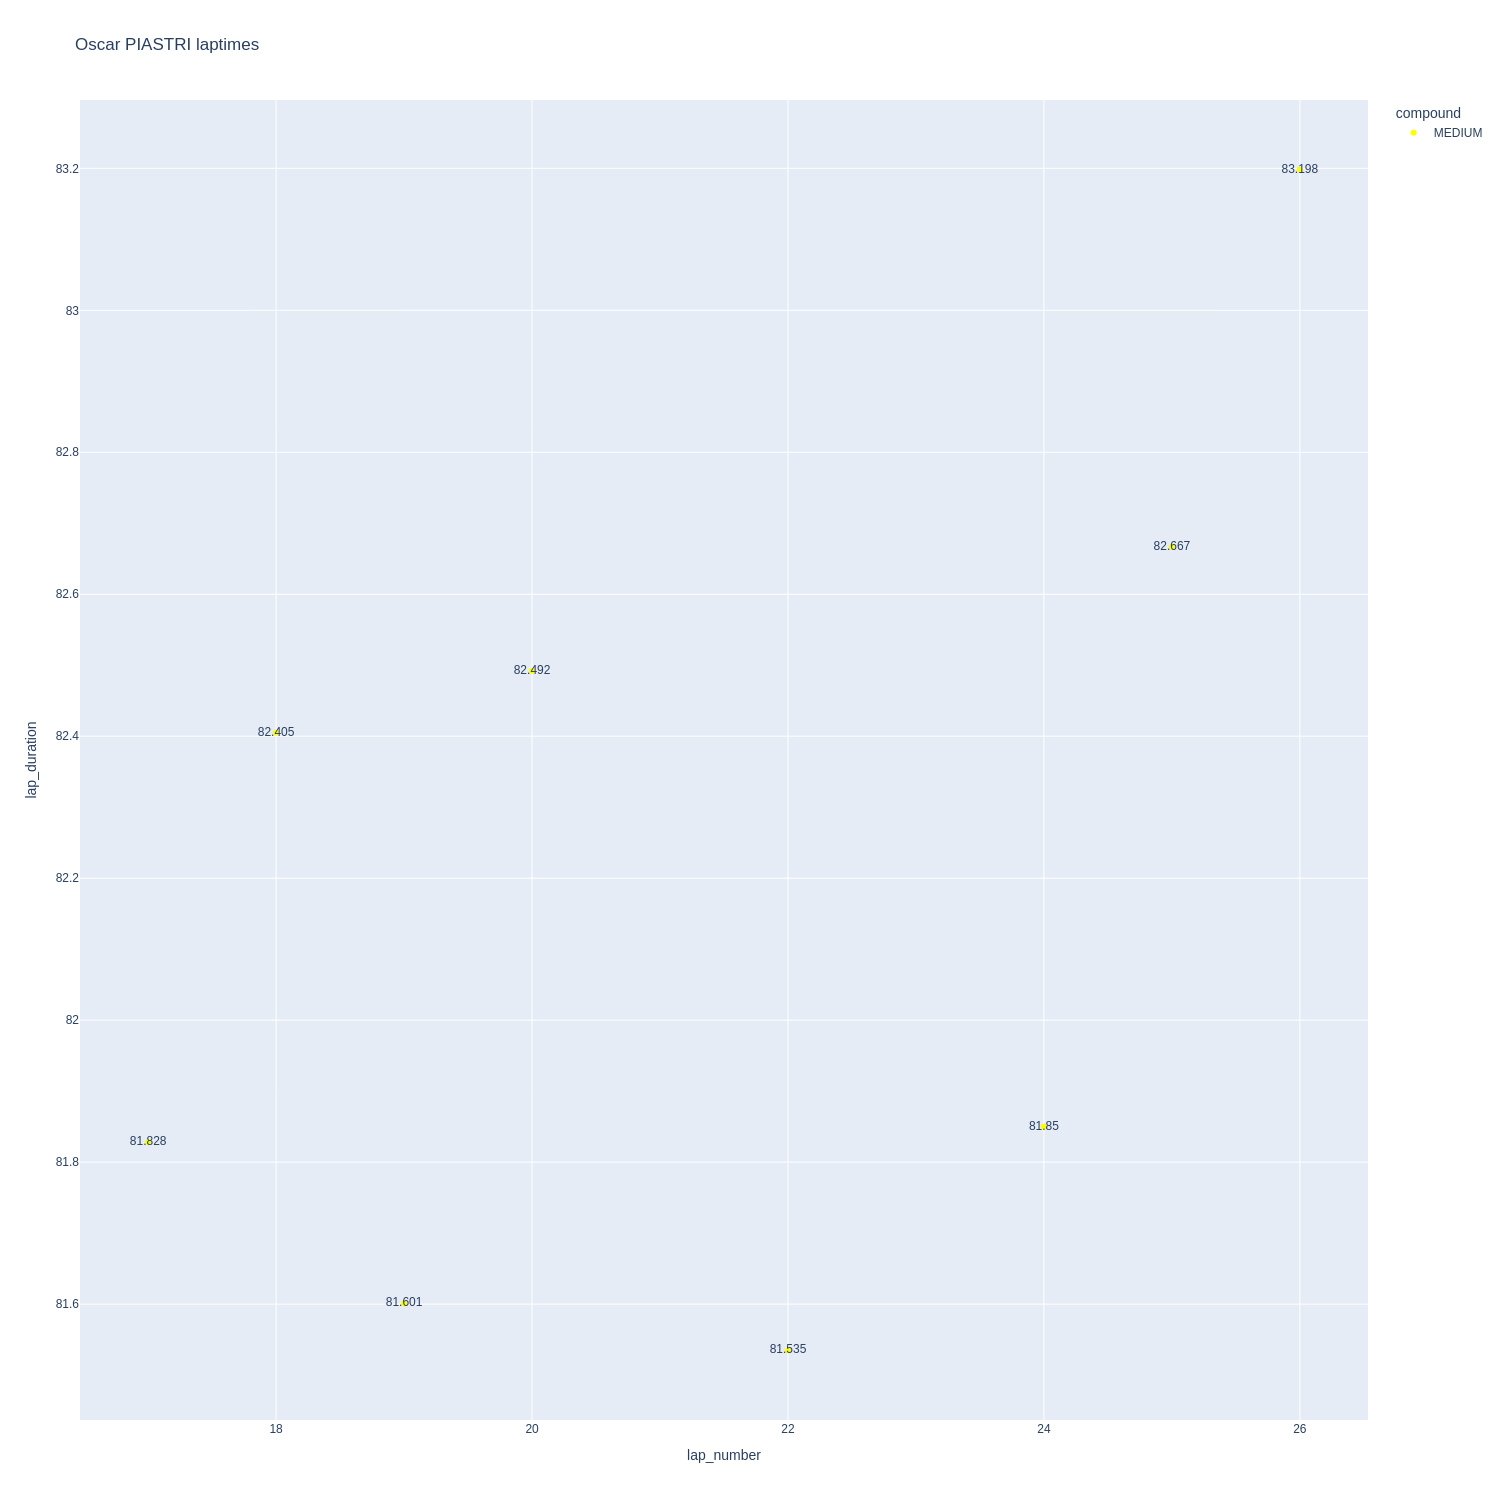

In [45]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

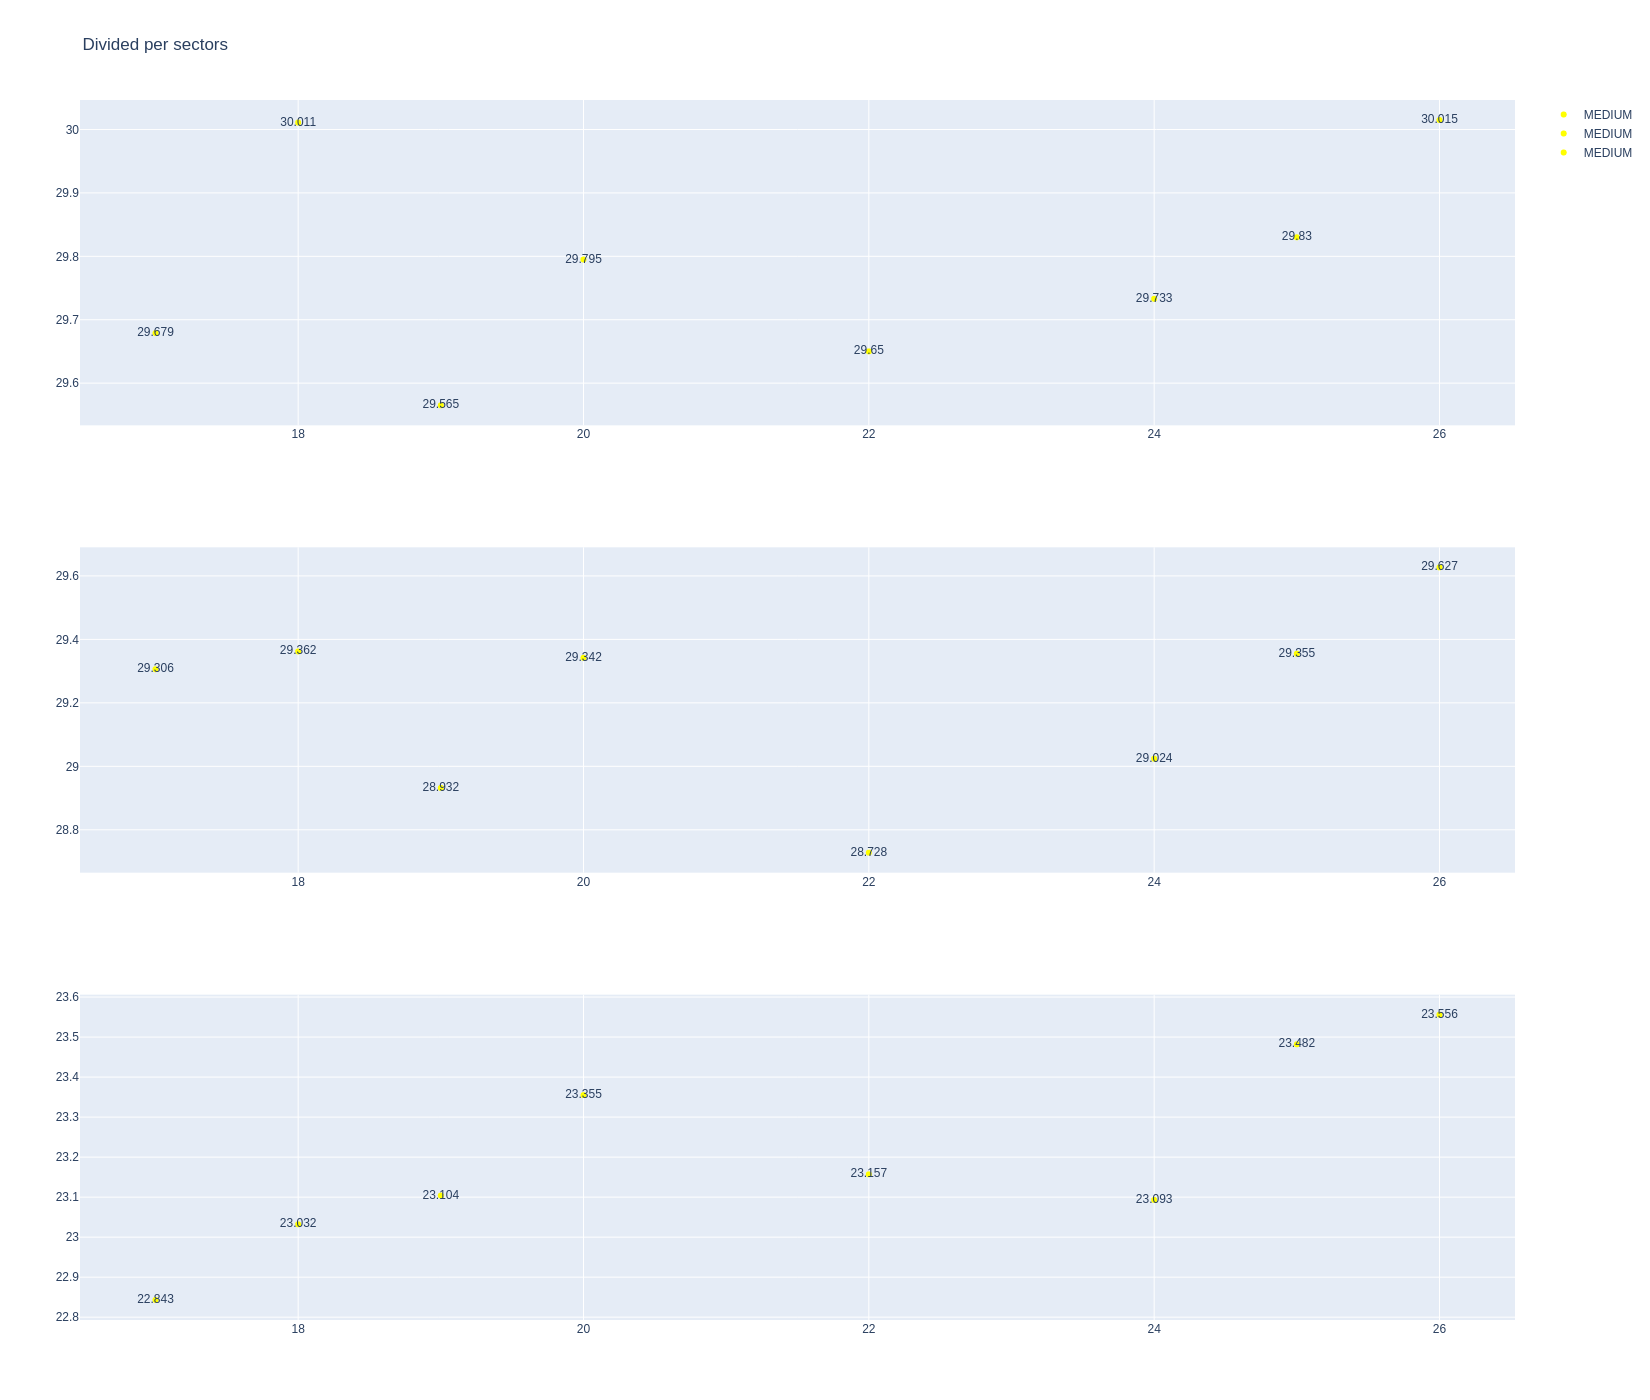

In [46]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [47]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
15         1266         9922             1             14          1        7   
16         1266         9922             1             18          1        7   
42         1266         9922             2             18          8       10   
44         1266         9922             2             14          8       11   
62         1266         9922             3             18         11       15   
64         1266         9922             3             14         12       14   
80         1266         9922             4             14         15       17   
90         1266         9922             4             18         16       28   
97         1266         9922             5             14         18       25   

   compound  tyre_age_at_start  
15   MEDIUM                  0  
16   MEDIUM                  0  
42     SOFT                  0  
44   MEDIUM                  7  
62     SOFT                  7  
64     SOFT                  0  
80     SOFT                  3  
90   MEDIUM                  7  
97     SOFT                  6

In [48]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
442  Fernando ALONSO     SOFT  2025-08-01T15:54:11.446000+00:00          19   
462  Fernando ALONSO     SOFT  2025-08-01T15:55:32.881000+00:00          20   
482  Fernando ALONSO     SOFT  2025-08-01T15:56:55.086000+00:00          21   
500  Fernando ALONSO     SOFT  2025-08-01T15:58:17.237000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
442             29.486             29.022             22.920        81.428  
462             29.764             29.194             23.173        82.131  
482             29.866             29.091             23.198        82.155  
500             29.907             29.295             23.217        82.419

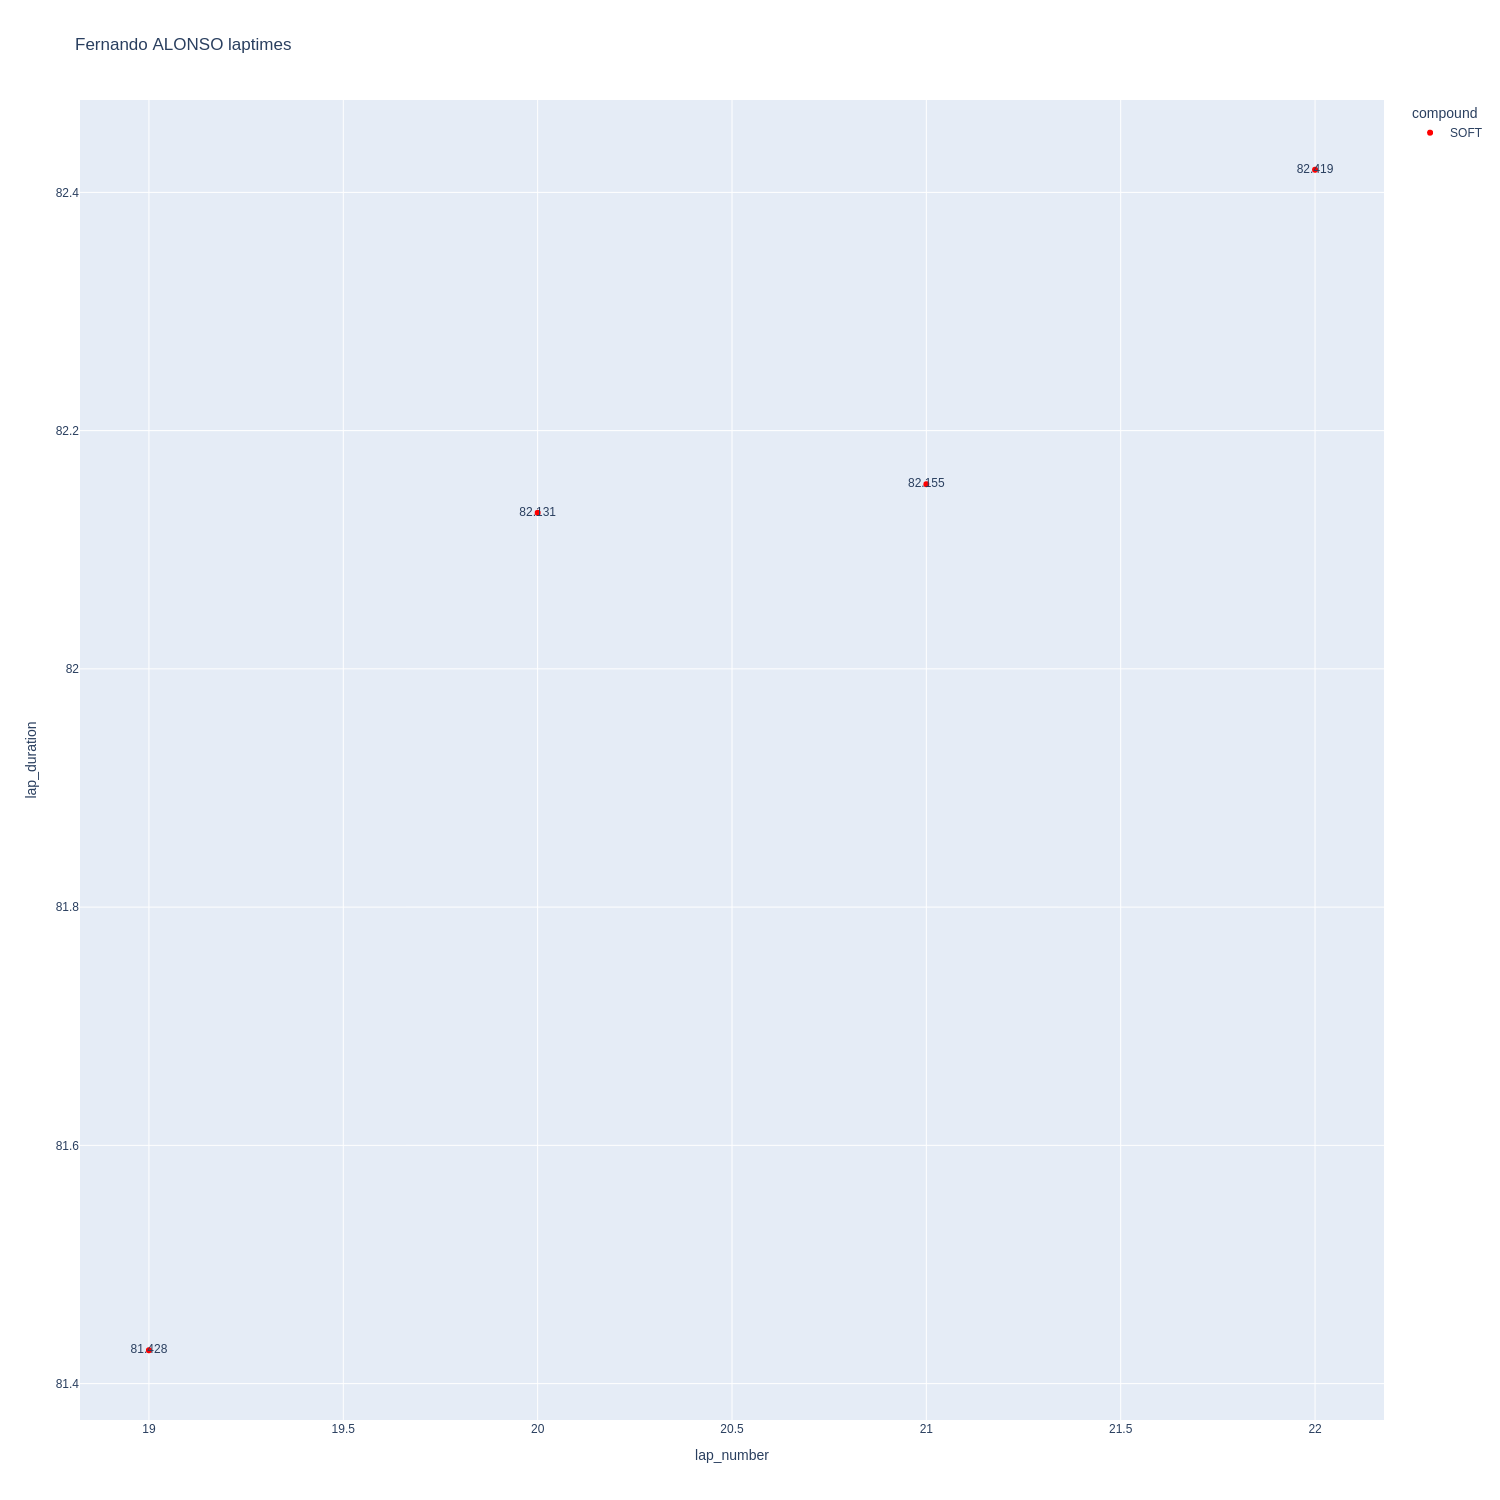

In [49]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

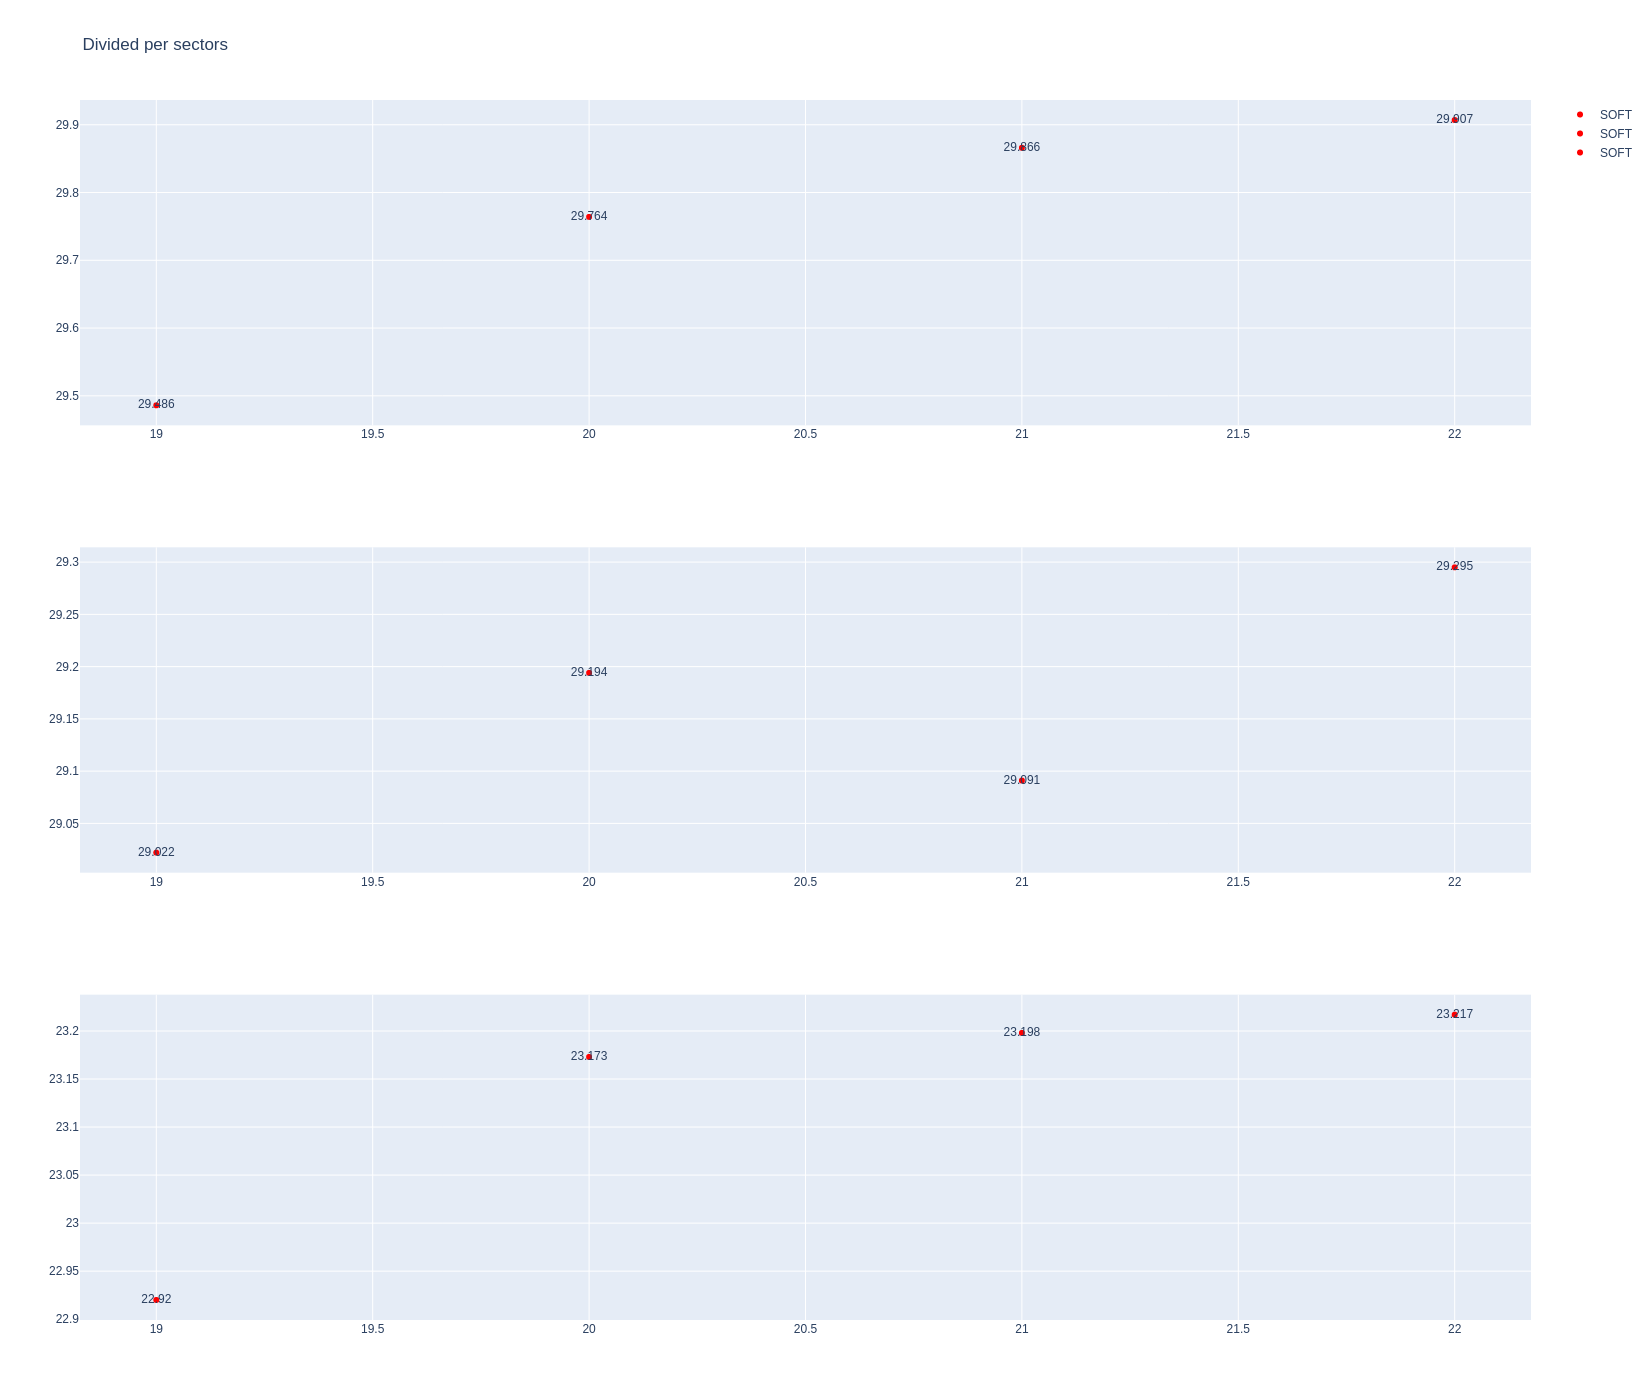

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [51]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
279  Lance STROLL     SOFT  2025-08-01T15:37:59.652000+00:00          15   
340  Lance STROLL   MEDIUM  2025-08-01T15:46:45.745000+00:00          17   
359  Lance STROLL   MEDIUM  2025-08-01T15:48:08.255000+00:00          18   
377  Lance STROLL   MEDIUM  2025-08-01T15:49:30.715000+00:00          19   
396  Lance STROLL   MEDIUM  2025-08-01T15:50:54.521000+00:00          20   
415  Lance STROLL   MEDIUM  2025-08-01T15:52:17.631000+00:00          21   
434  Lance STROLL   MEDIUM  2025-08-01T15:53:41.188000+00:00          22   
454  Lance STROLL   MEDIUM  2025-08-01T15:55:04.038000+00:00          23   
474  Lance STROLL   MEDIUM  2025-08-01T15:56:27.029000+00:00          24   
494  Lance STROLL   MEDIUM  2025-08-01T15:57:50.033000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
279             28.056             27.145             27.575        82.776  
340             29.805             29.538             23.187        82.530  
359             29.914             29.505             23.134        82.553  
377             30.021             29.567             24.132        83.720  
396             29.898             29.820             23.373        83.091  
415             30.105             29.513             23.938        83.556  
434             30.124             29.333             23.396        82.853  
454             29.699             29.745             23.528        82.972  
474             29.900             29.494             23.559        82.953  
494             30.020             29.603             23.865        83.488

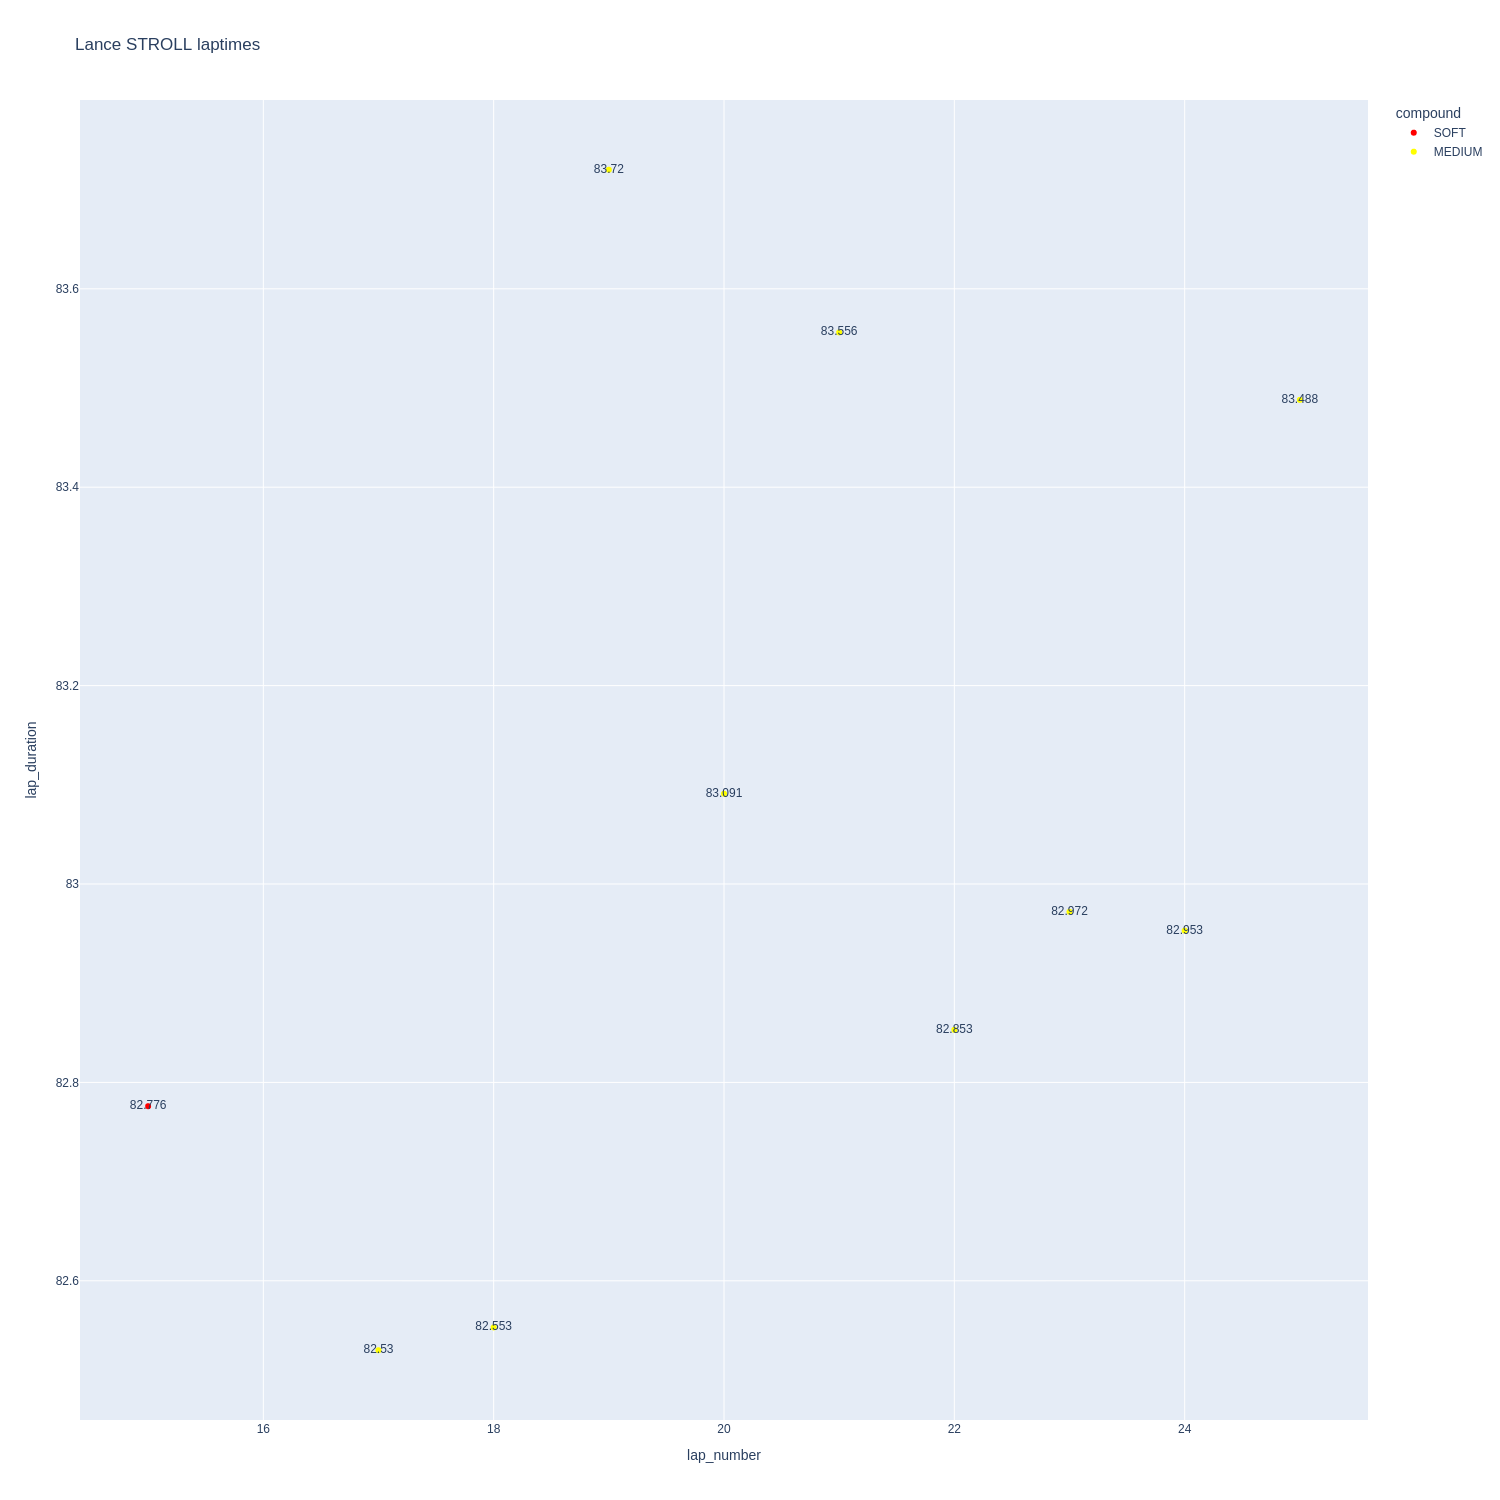

In [52]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

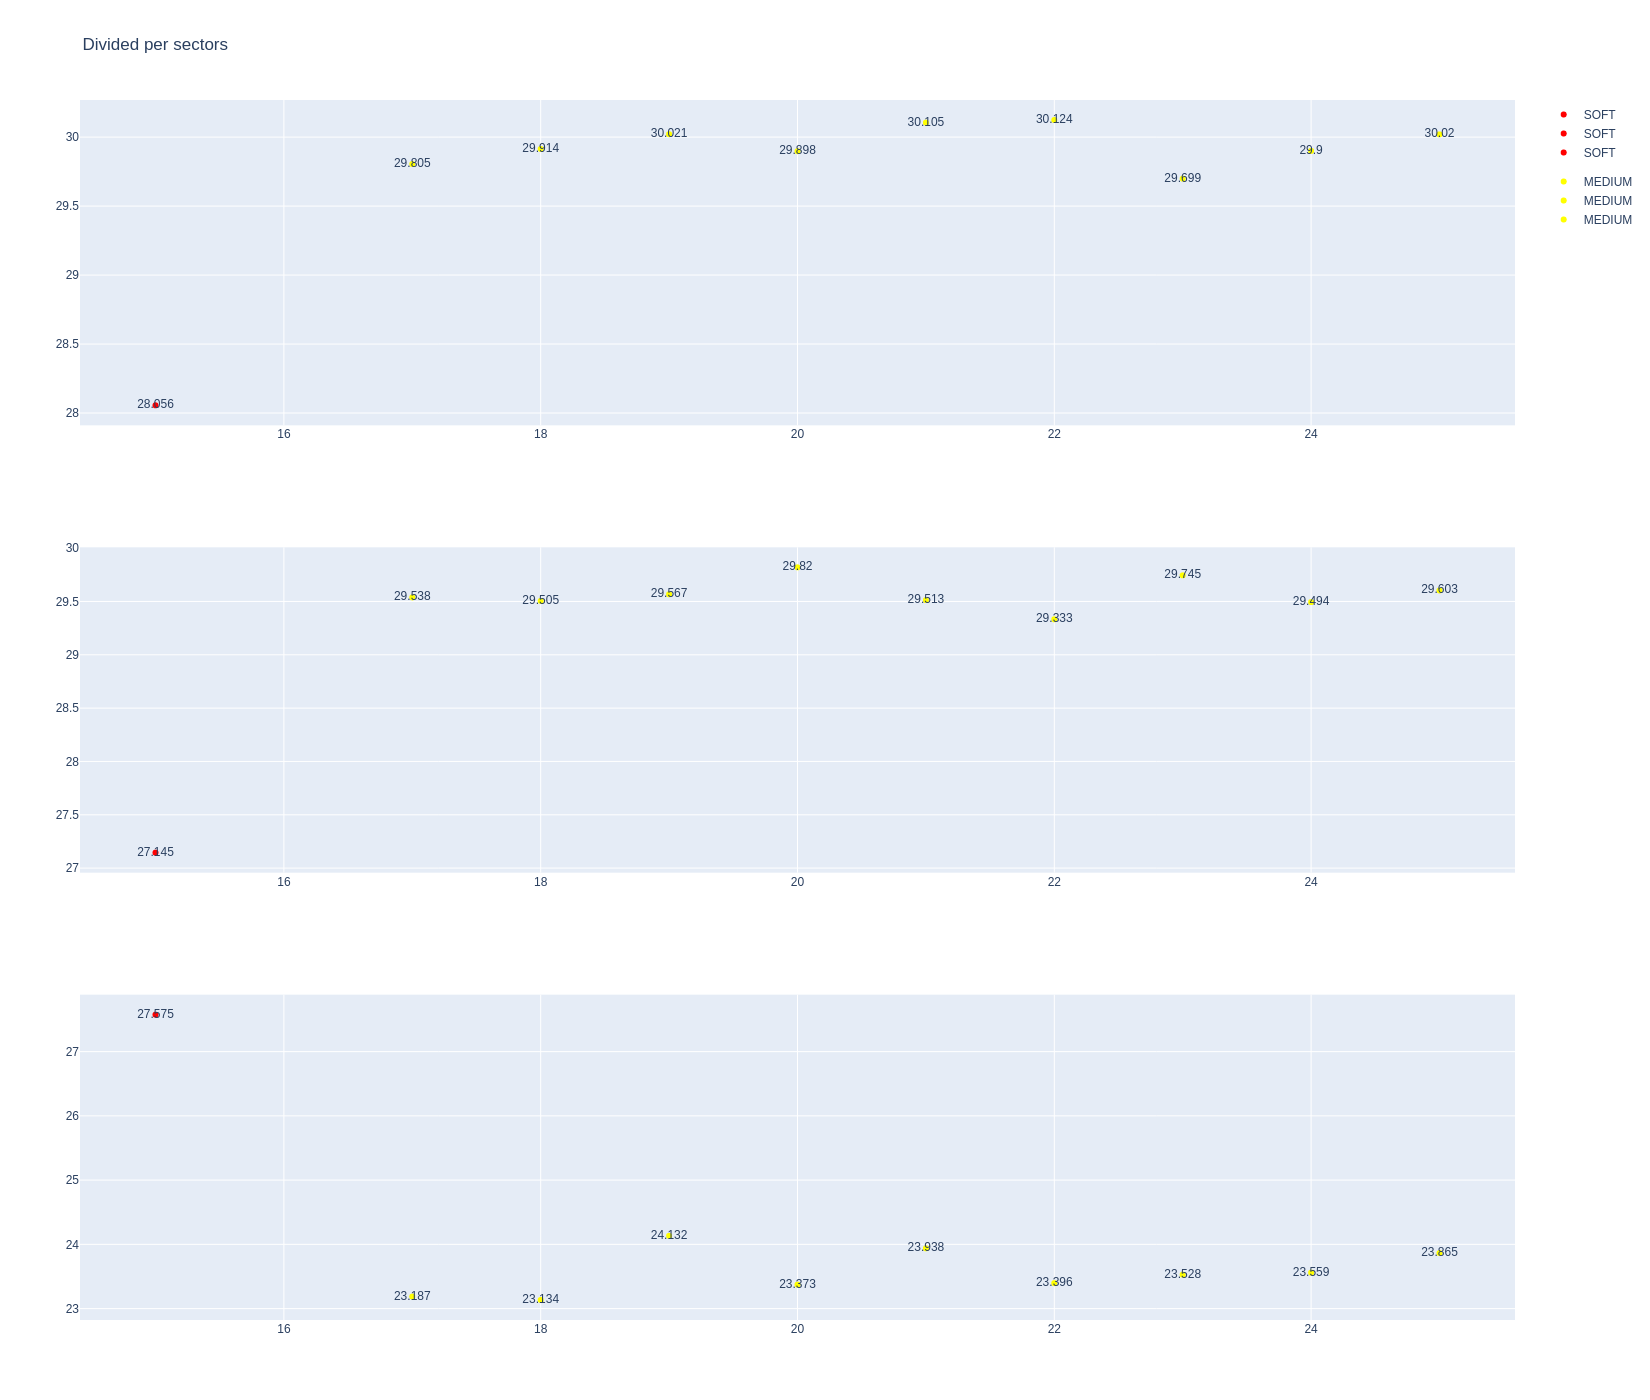

In [53]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [54]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  \
1           1266         9922             1              6          1   
4           1266         9922             1             30          1   
23          1266         9922             2             30          4   
28          1266         9922             2              6          4   
36          1266         9922             3             30          7   
50          1266         9922             3              6         10   
52          1266         9922             4             30         10   
74          1266         9922             4              6         13   
76          1266         9922             5             30         13   
105         1266         9922             5              6         27   

     lap_end compound  tyre_age_at_start  
1          3   MEDIUM                  0  
4          3   MEDIUM                  0  
23         6   MEDIUM                  0  
28         9   MEDIUM                  3  
36         9   MEDIUM                  6  
50        12     SOFT                  0  
52        12     SOFT                  0  
74        26   MEDIUM                  9  
76        29   MEDIUM                  9  
105       30     SOFT                  3

In [55]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
293  Liam LAWSON   MEDIUM  2025-08-01T15:40:39.207000+00:00          14   
298  Liam LAWSON   MEDIUM  2025-08-01T15:42:01.746000+00:00          15   
304  Liam LAWSON   MEDIUM  2025-08-01T15:43:24.190000+00:00          16   
316  Liam LAWSON   MEDIUM  2025-08-01T15:44:46.339000+00:00          17   
348  Liam LAWSON   MEDIUM  2025-08-01T15:47:36.795000+00:00          19   
367  Liam LAWSON   MEDIUM  2025-08-01T15:48:59.812000+00:00          20   
386  Liam LAWSON   MEDIUM  2025-08-01T15:50:22.358000+00:00          21   
405  Liam LAWSON   MEDIUM  2025-08-01T15:51:44.946000+00:00          22   
425  Liam LAWSON   MEDIUM  2025-08-01T15:53:07.344000+00:00          23   
445  Liam LAWSON   MEDIUM  2025-08-01T15:54:29.898000+00:00          24   
465  Liam LAWSON   MEDIUM  2025-08-01T15:55:52.748000+00:00          25   
485  Liam LAWSON   MEDIUM  2025-08-01T15:57:15.322000+00:00          26   
505  Liam LAWSON   MEDIUM  2025-08-01T15:58:37.935000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
293             29.977             29.514             23.001        82.492  
298             29.946             29.428             23.056        82.430  
304             29.733             29.462             22.987        82.182  
316             29.754             29.939             24.110        83.803  
348             29.806             29.475             23.714        82.995  
367             29.976             29.621             23.066        82.663  
386             29.856             29.480             23.213        82.549  
405             29.898             29.324             23.196        82.418  
425             29.983             29.406             23.229        82.618  
445             29.932             29.374             23.395        82.701  
465             30.014             29.353             23.324        82.691  
485             29.876             29.408             23.312        82.596  
505             29.866             29.723             23.719        83.308

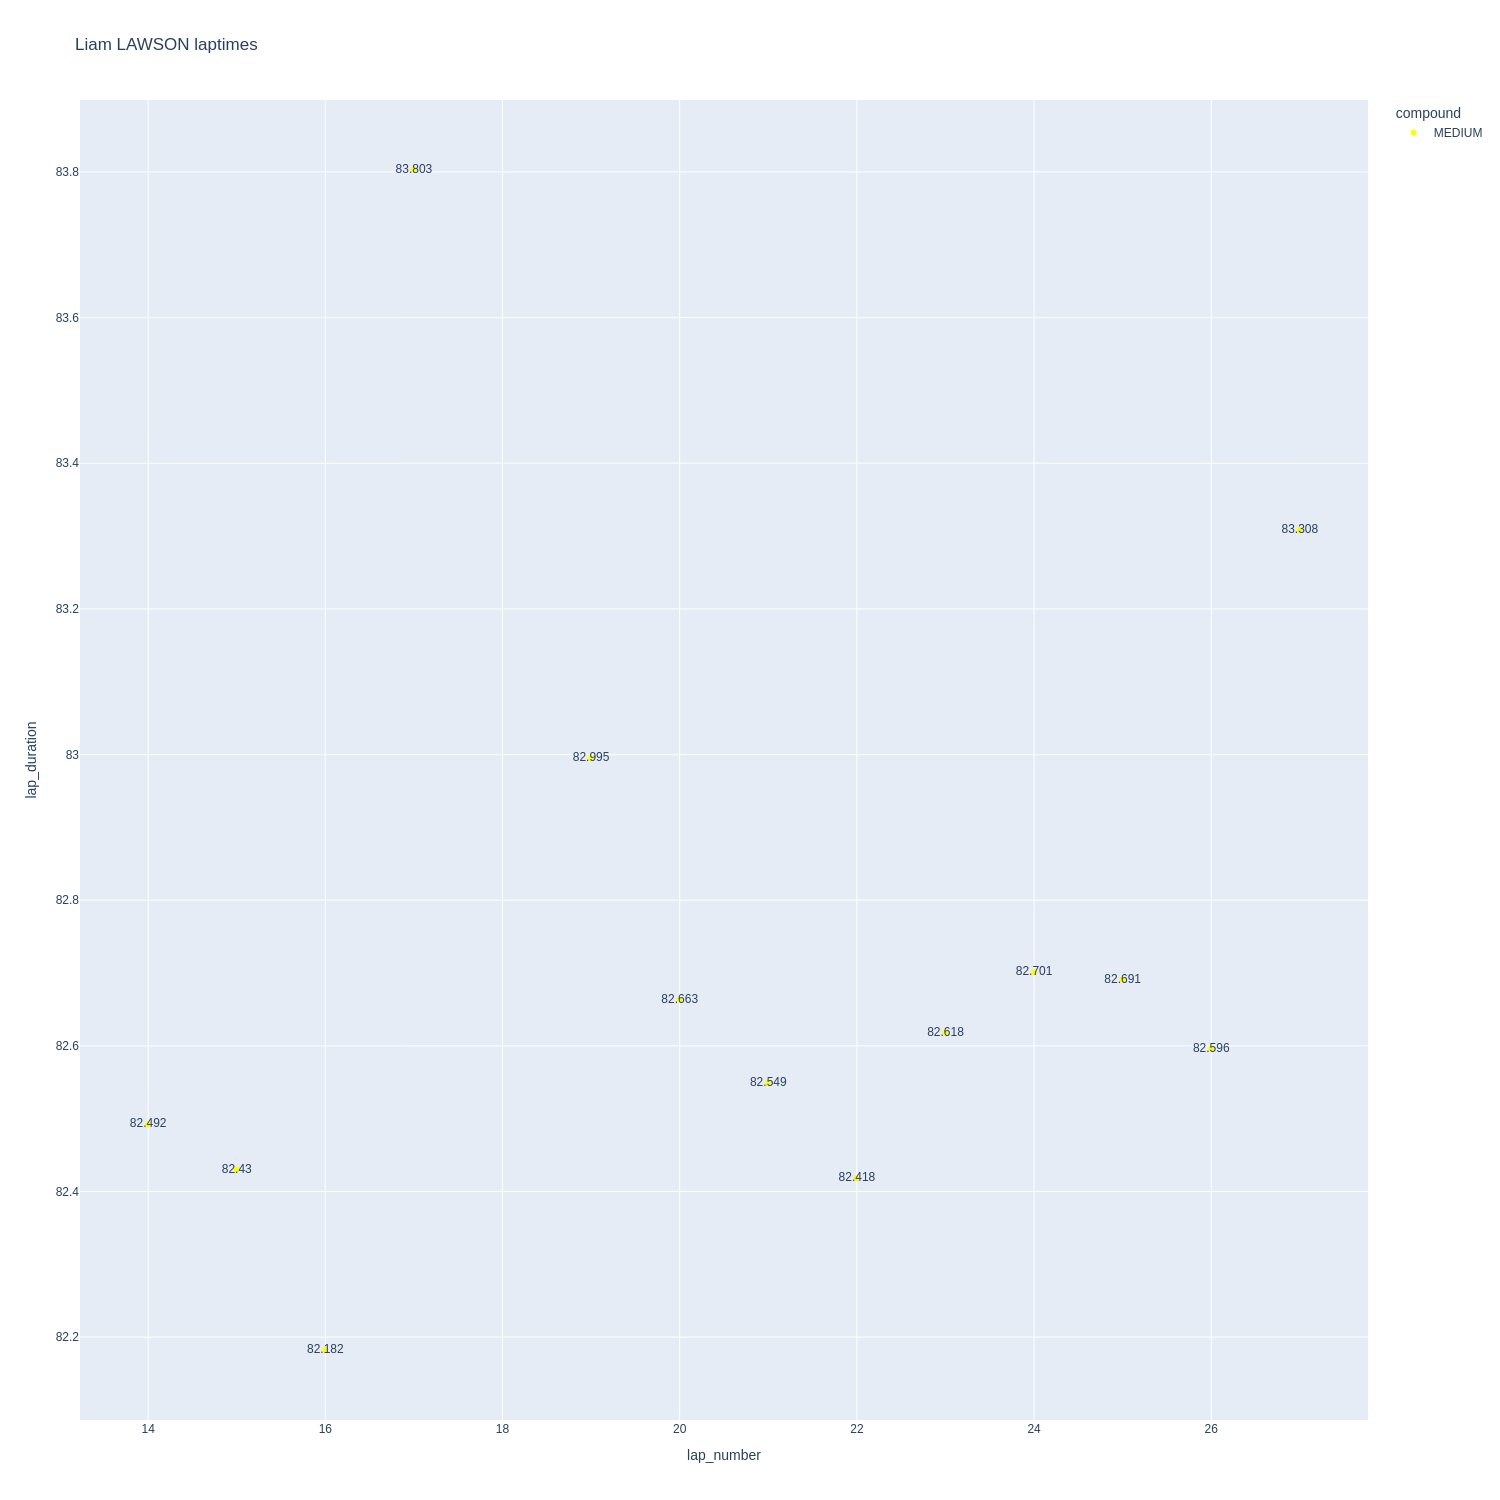

In [56]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

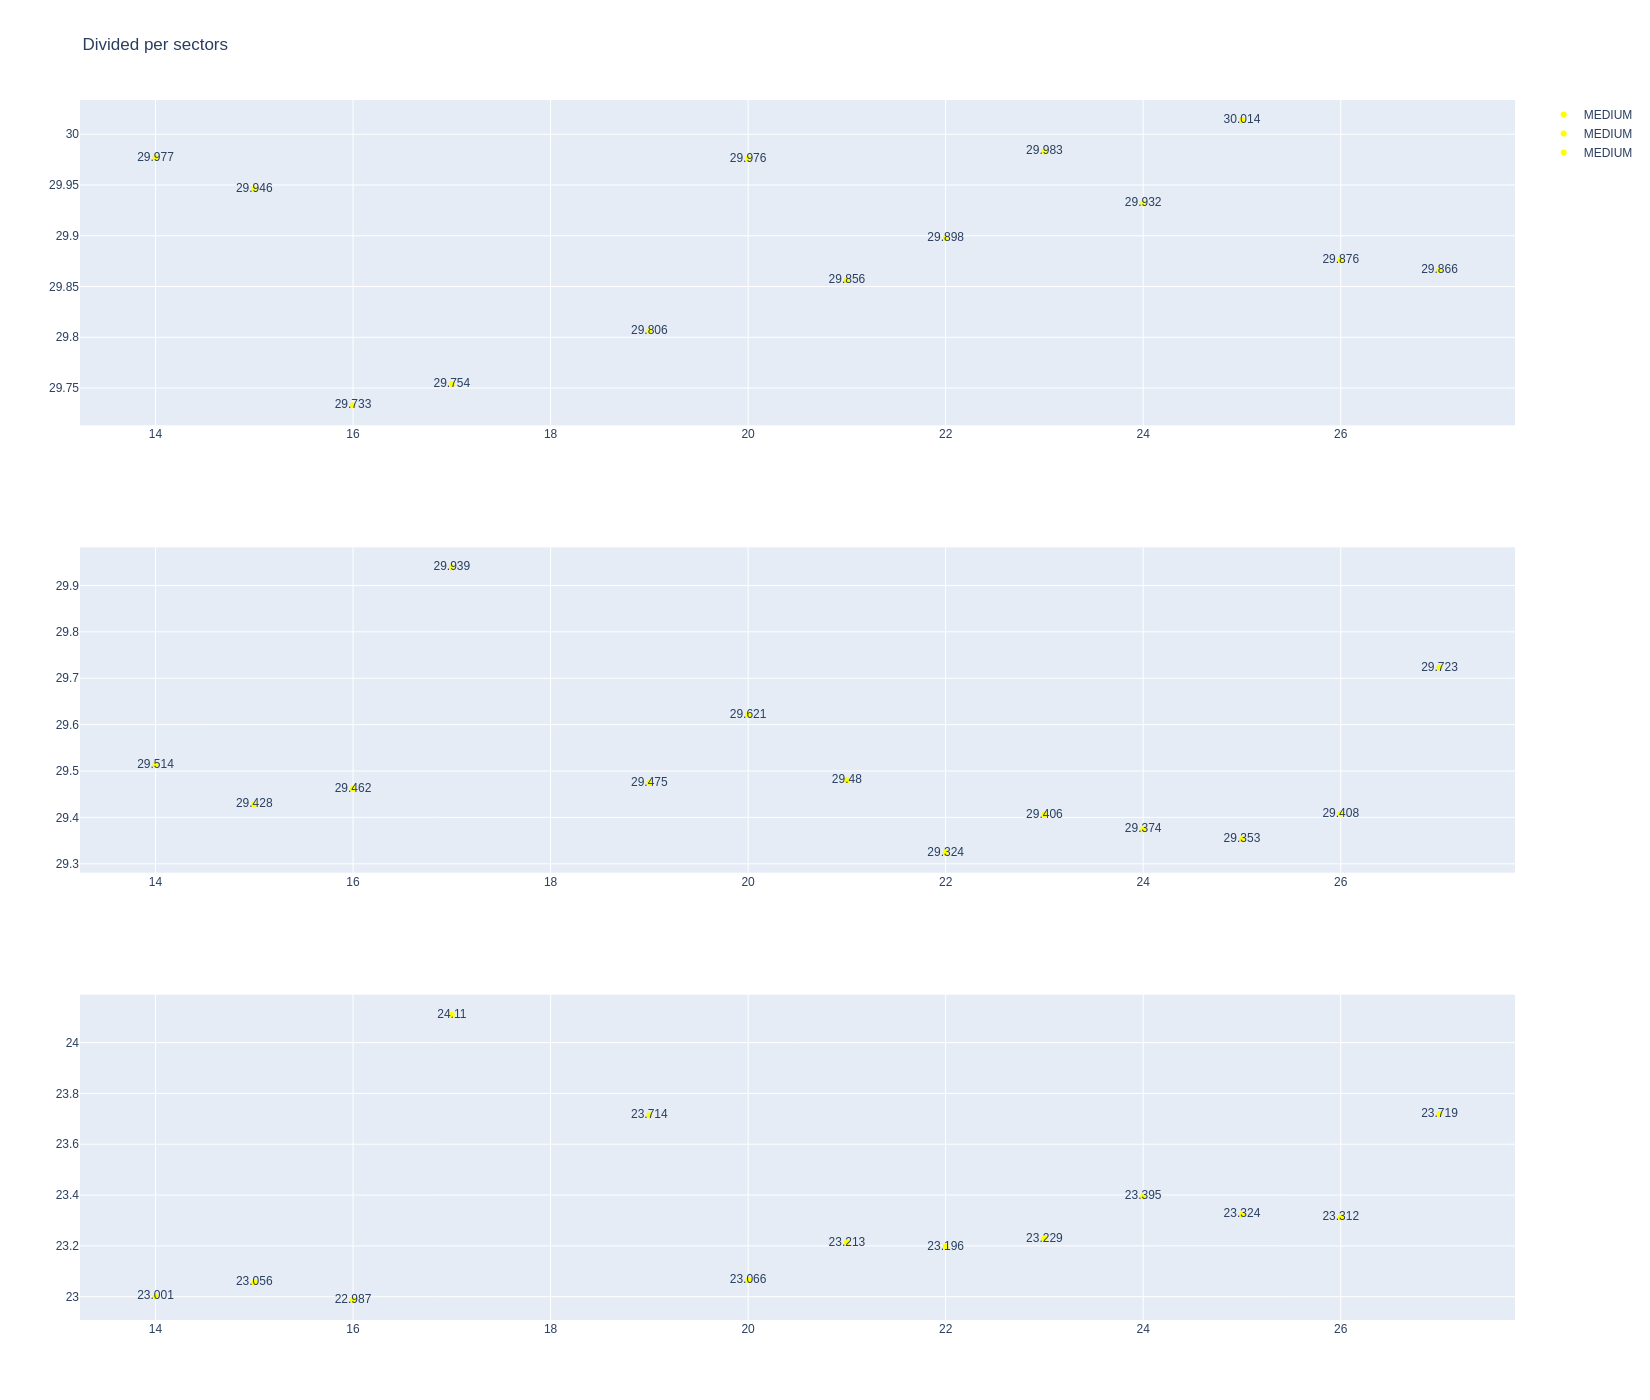

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [58]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
291  Isack HADJAR   MEDIUM  2025-08-01T15:40:05.410000+00:00          14   
296  Isack HADJAR   MEDIUM  2025-08-01T15:41:29.223000+00:00          15   
301  Isack HADJAR   MEDIUM  2025-08-01T15:42:51.990000+00:00          16   
312  Isack HADJAR   MEDIUM  2025-08-01T15:44:14.284000+00:00          17   
343  Isack HADJAR   MEDIUM  2025-08-01T15:47:03.685000+00:00          19   
362  Isack HADJAR   MEDIUM  2025-08-01T15:48:26.070000+00:00          20   
381  Isack HADJAR   MEDIUM  2025-08-01T15:49:48.371000+00:00          21   
400  Isack HADJAR   MEDIUM  2025-08-01T15:51:11.008000+00:00          22   
439  Isack HADJAR   MEDIUM  2025-08-01T15:53:58.251000+00:00          24   
459  Isack HADJAR   MEDIUM  2025-08-01T15:55:20.957000+00:00          25   
521  Isack HADJAR     SOFT  2025-08-01T15:59:50.372000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
291             30.334             30.049             23.395        83.778  
296             30.094             29.527             23.154        82.775  
301             29.982             29.324             23.070        82.376  
312             29.859             29.241             23.218        82.318  
343             29.879             29.153             23.330        82.362  
362             29.843             29.212             23.269        82.324  
381             29.886             29.468             23.283        82.637  
400             30.150             29.396             23.543        83.089  
439             30.029             29.285             23.518        82.832  
459             29.924             29.981             23.728        83.633  
521             29.265             29.696             22.959        81.920

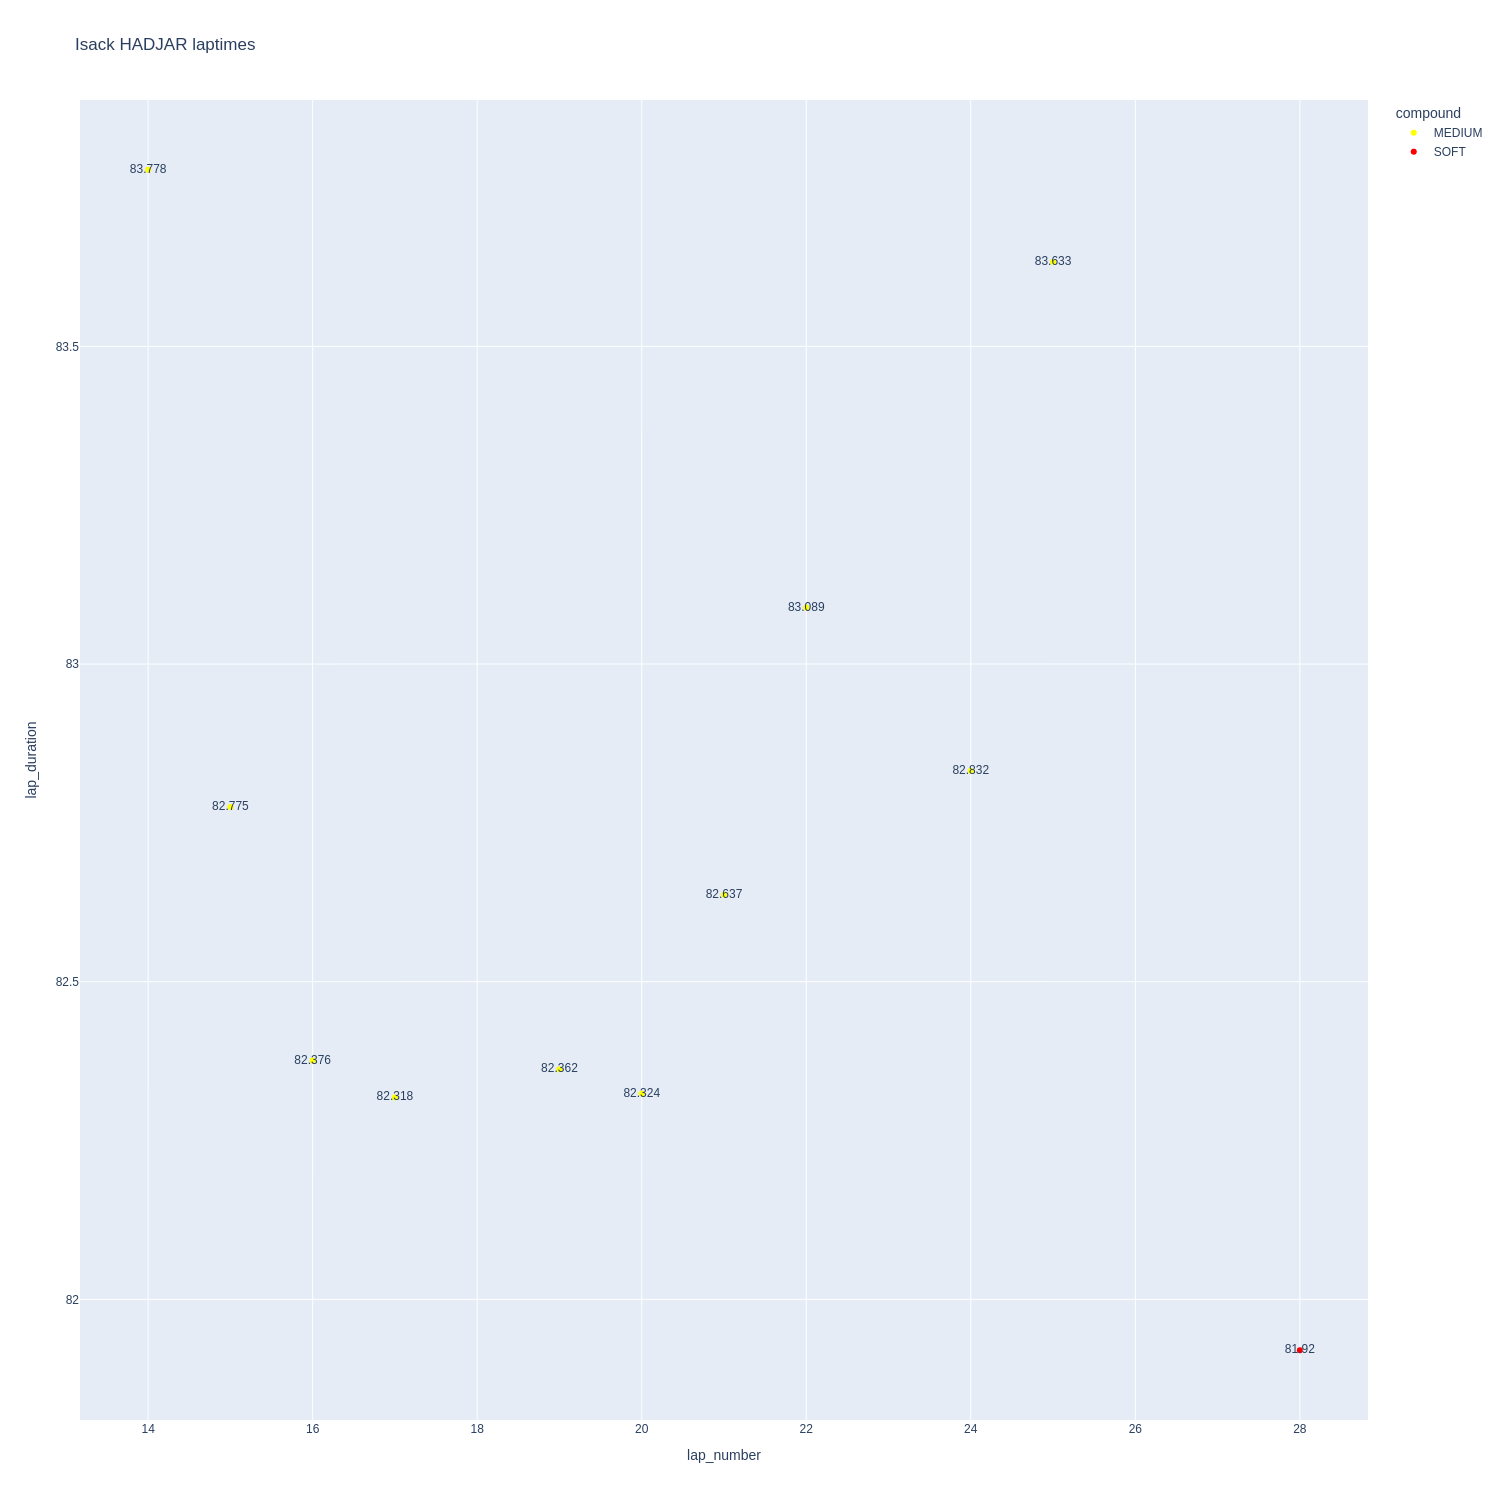

In [59]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

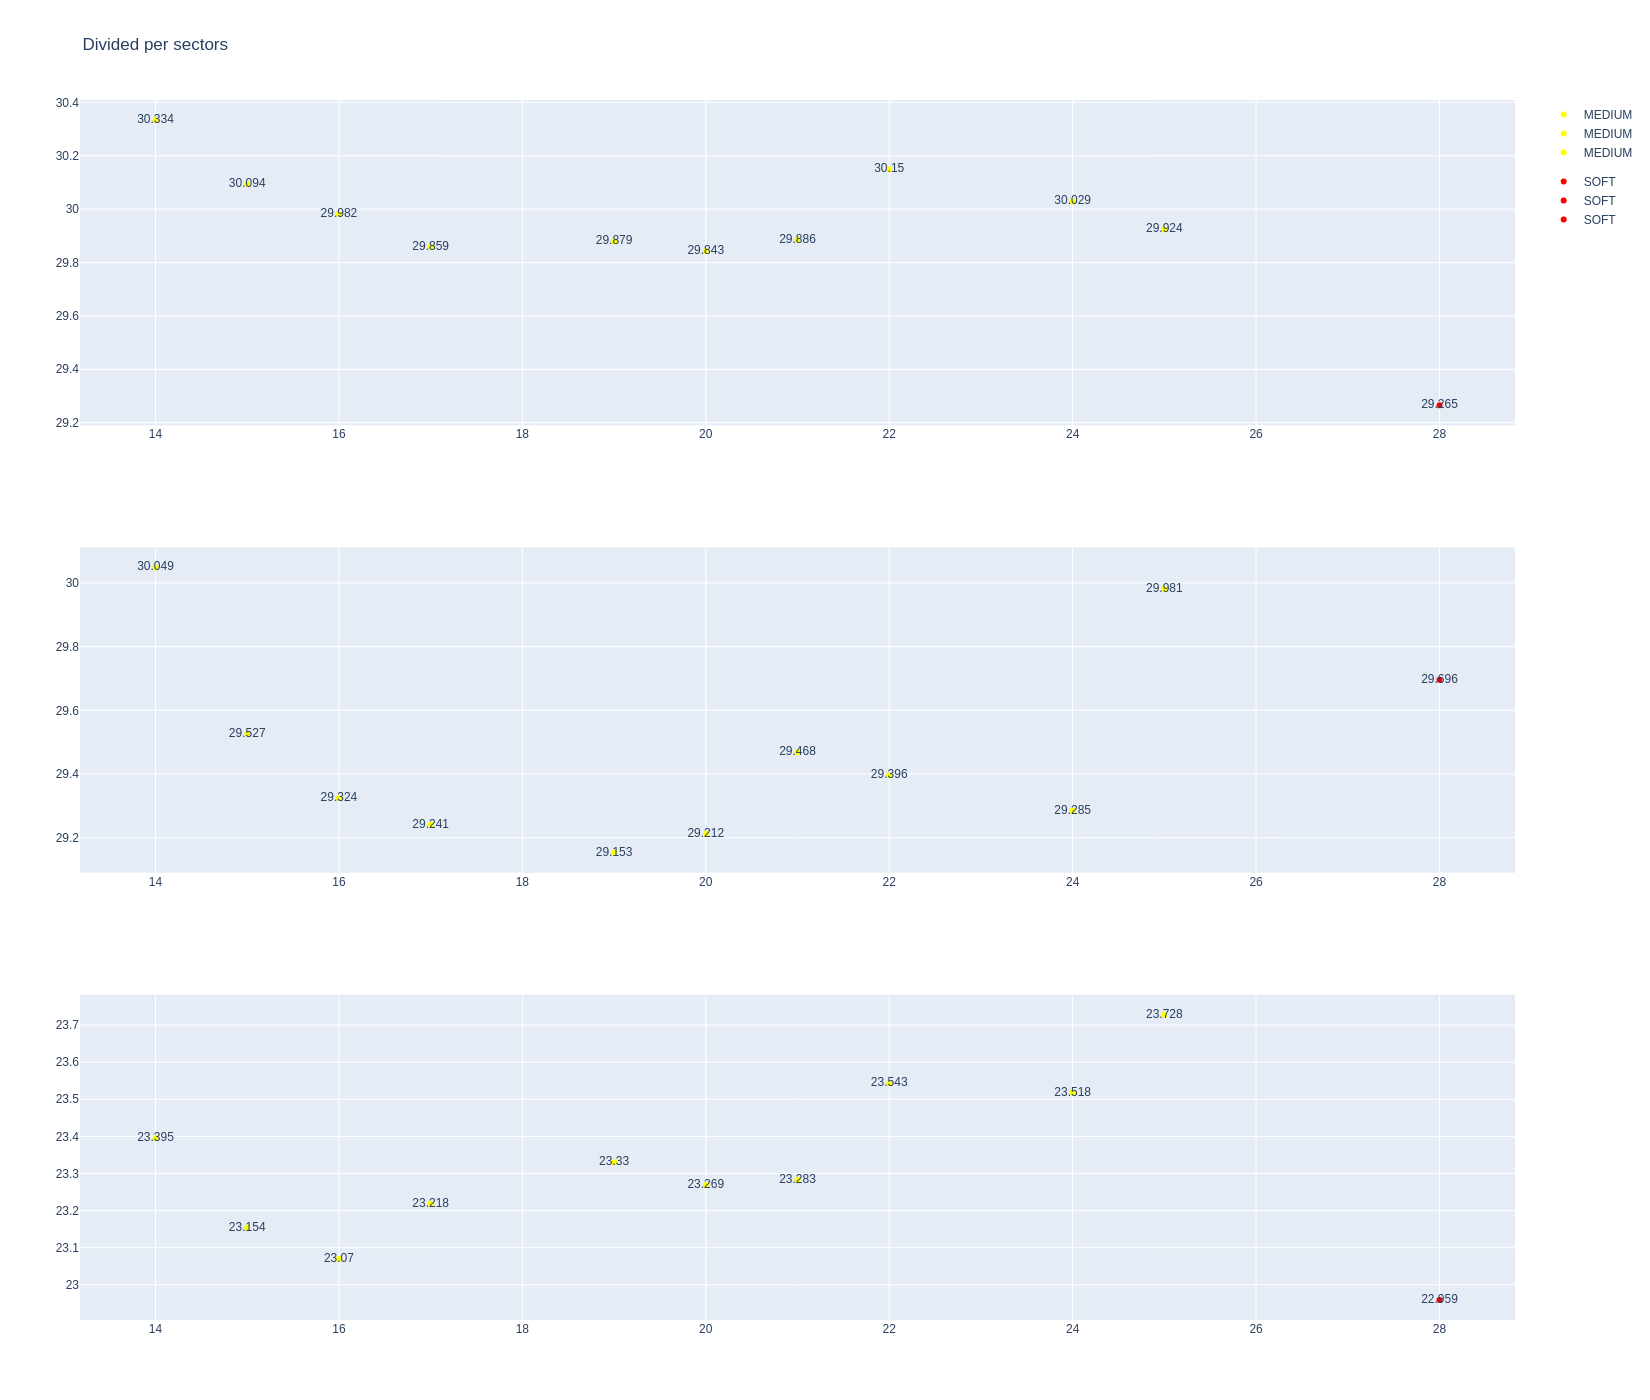

In [60]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [61]:
stintInformation.query('driver_number == 31 or driver_number == 87')

meeting_key  session_key  stint_number  driver_number  lap_start  \
17          1266         9922             1             87          1   
18          1266         9922             1             31          1   
48          1266         9922             2             87          9   
49          1266         9922             2             31         10   
68          1266         9922             3             31         13   
69          1266         9922             3             87         13   
87          1266         9922             4             87         16   
88          1266         9922             4             31         16   
101         1266         9922             5             87         25   
104         1266         9922             5             31         27   

     lap_end compound  tyre_age_at_start  
17         8     HARD                  0  
18         9     HARD                  0  
48        12     SOFT                  0  
49        12     SOFT                  0  
68        15     SOFT                  3  
69        15     SOFT                  4  
87        24     SOFT                  7  
88        26     HARD                  9  
101       27     HARD                  0  
104       29     SOFT                  0

In [62]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
317  Esteban OCON     HARD  2025-08-01T15:44:52.044000+00:00          17   
349  Esteban OCON     HARD  2025-08-01T15:47:40.826000+00:00          19   
368  Esteban OCON     HARD  2025-08-01T15:49:02.952000+00:00          20   
387  Esteban OCON     HARD  2025-08-01T15:50:25.277000+00:00          21   
406  Esteban OCON     HARD  2025-08-01T15:51:47.462000+00:00          22   
446  Esteban OCON     HARD  2025-08-01T15:54:35.046000+00:00          24   
466  Esteban OCON     HARD  2025-08-01T15:55:57.342000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
317             29.606             29.616             23.176        82.398  
349             29.544             29.410             23.278        82.232  
368             29.698             29.402             23.163        82.263  
387             29.692             29.310             23.275        82.277  
406             29.605             29.291             23.283        82.179  
446             29.718             29.301             23.262        82.281  
466             29.772             29.307             23.466        82.545

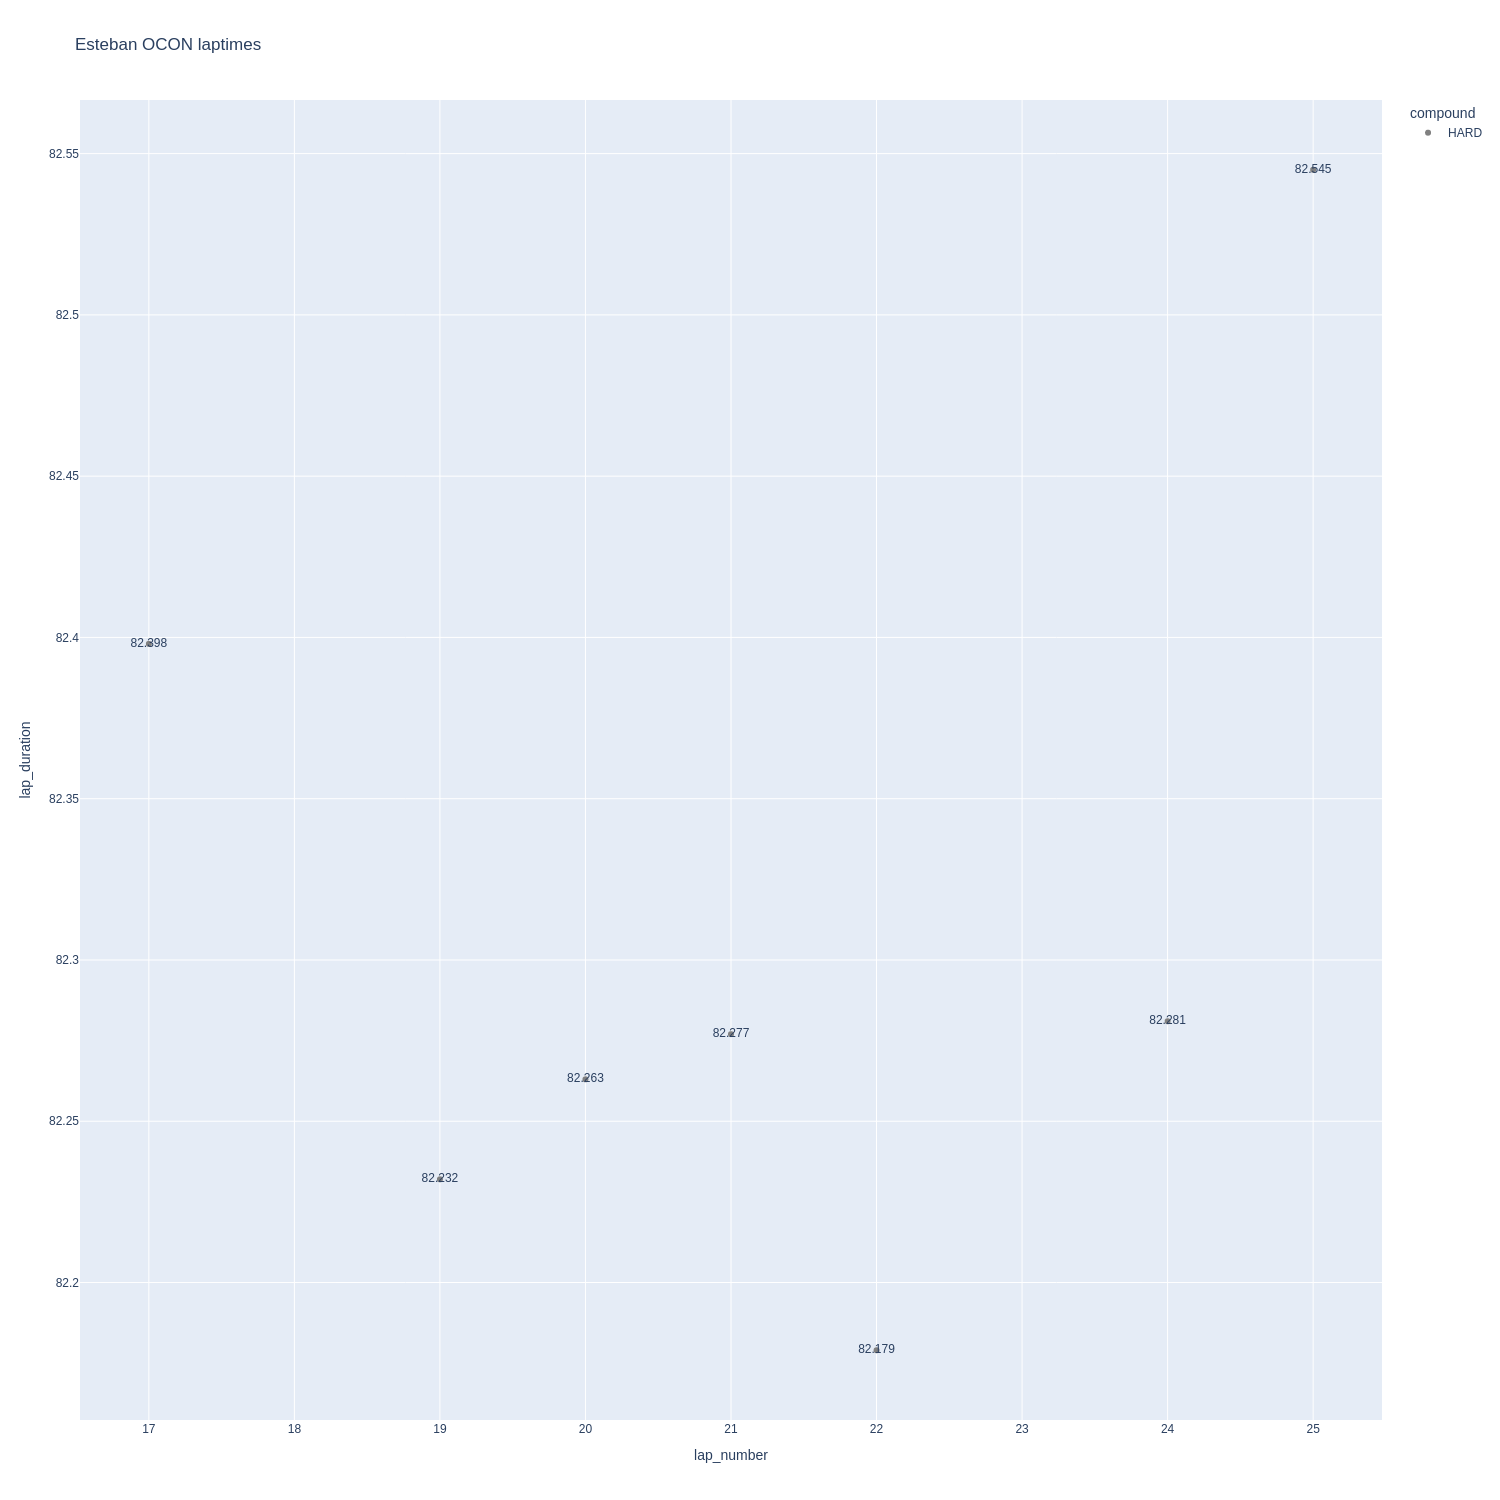

In [63]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

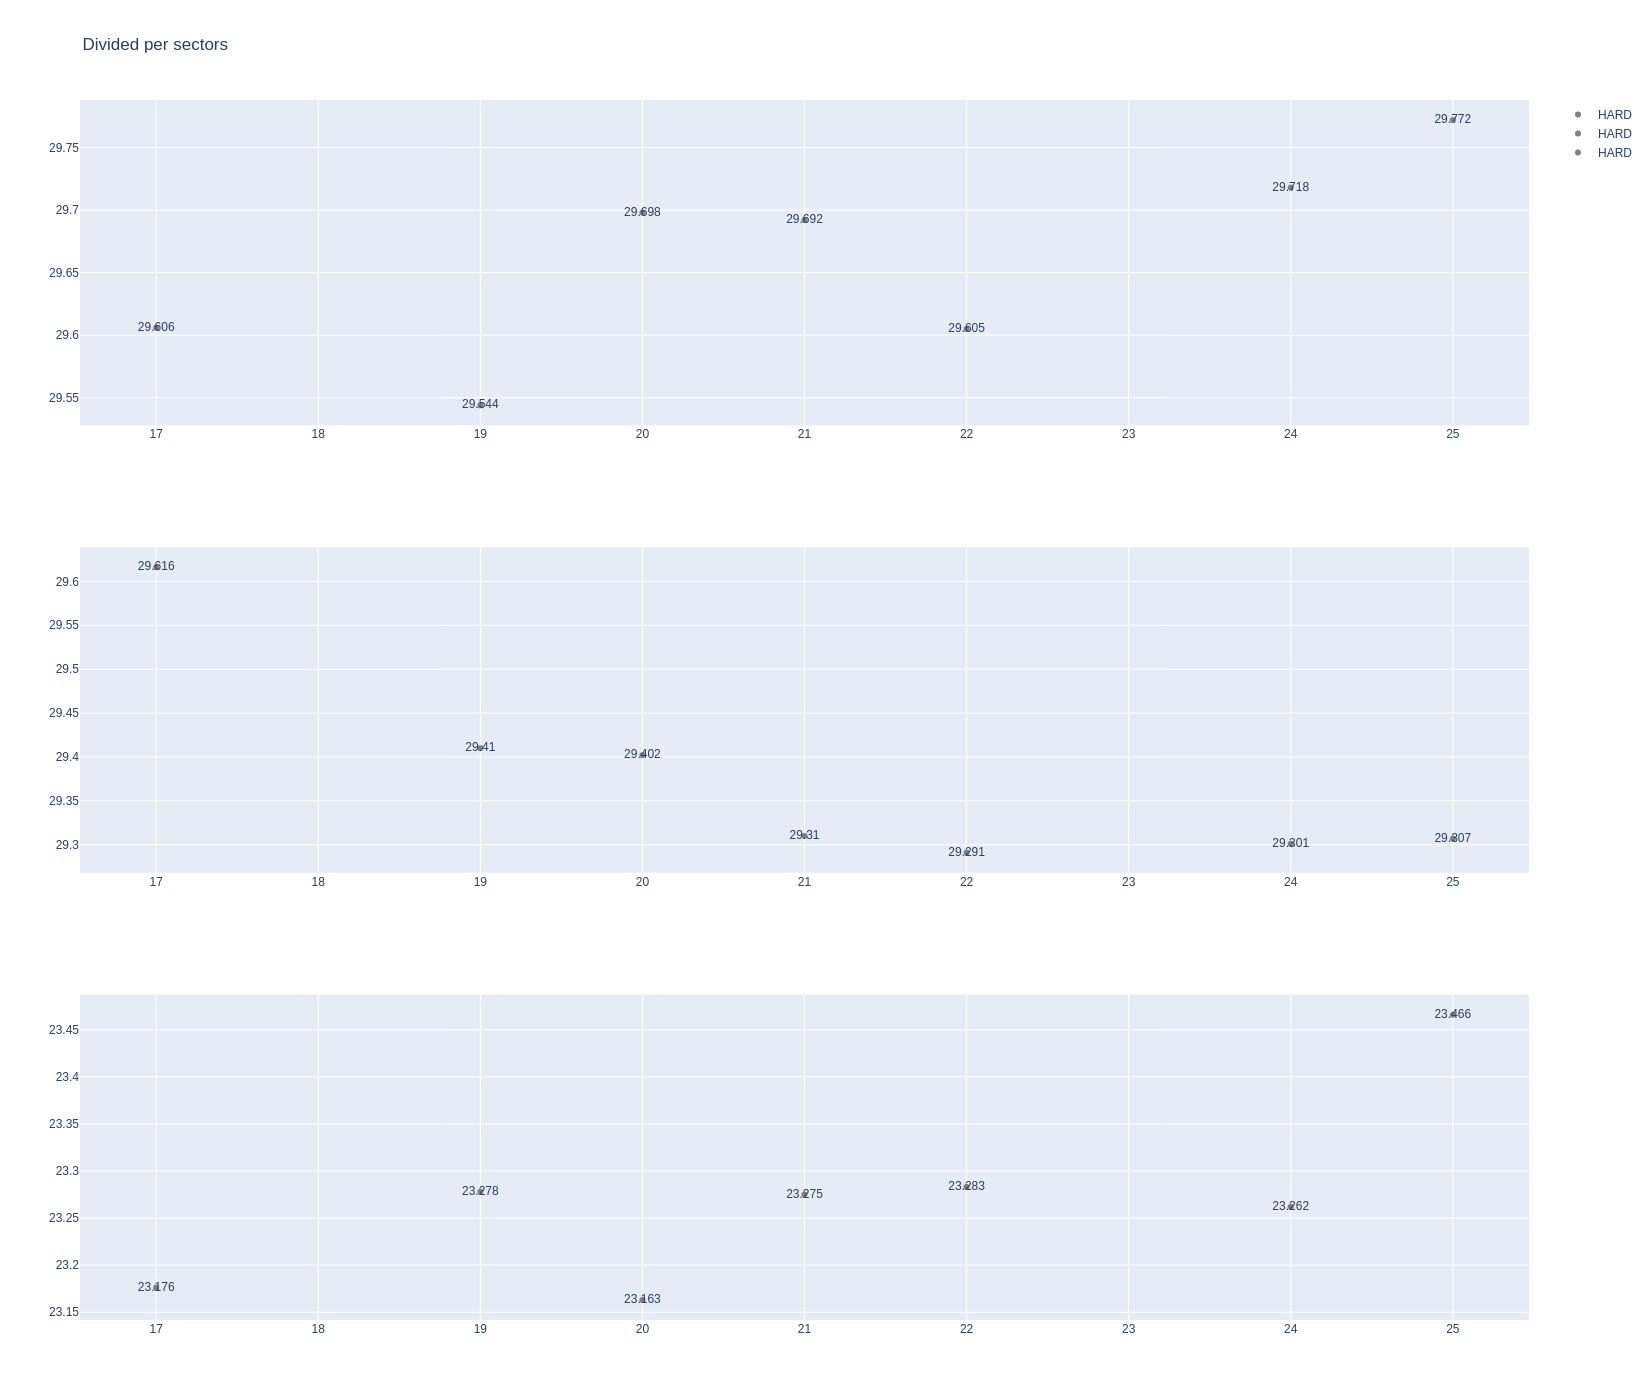

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [65]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
395  Oliver BEARMAN     SOFT  2025-08-01T15:50:53.443000+00:00          19   
436  Oliver BEARMAN     SOFT  2025-08-01T15:53:47.766000+00:00          21   
456  Oliver BEARMAN     SOFT  2025-08-01T15:55:10.805000+00:00          22   
476  Oliver BEARMAN     SOFT  2025-08-01T15:56:33.951000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
395             29.740             29.457             23.214        82.411  
436             29.915             29.515             23.540        82.970  
456             29.876             29.703             23.524        83.103  
476             30.039             29.669             23.674        83.382

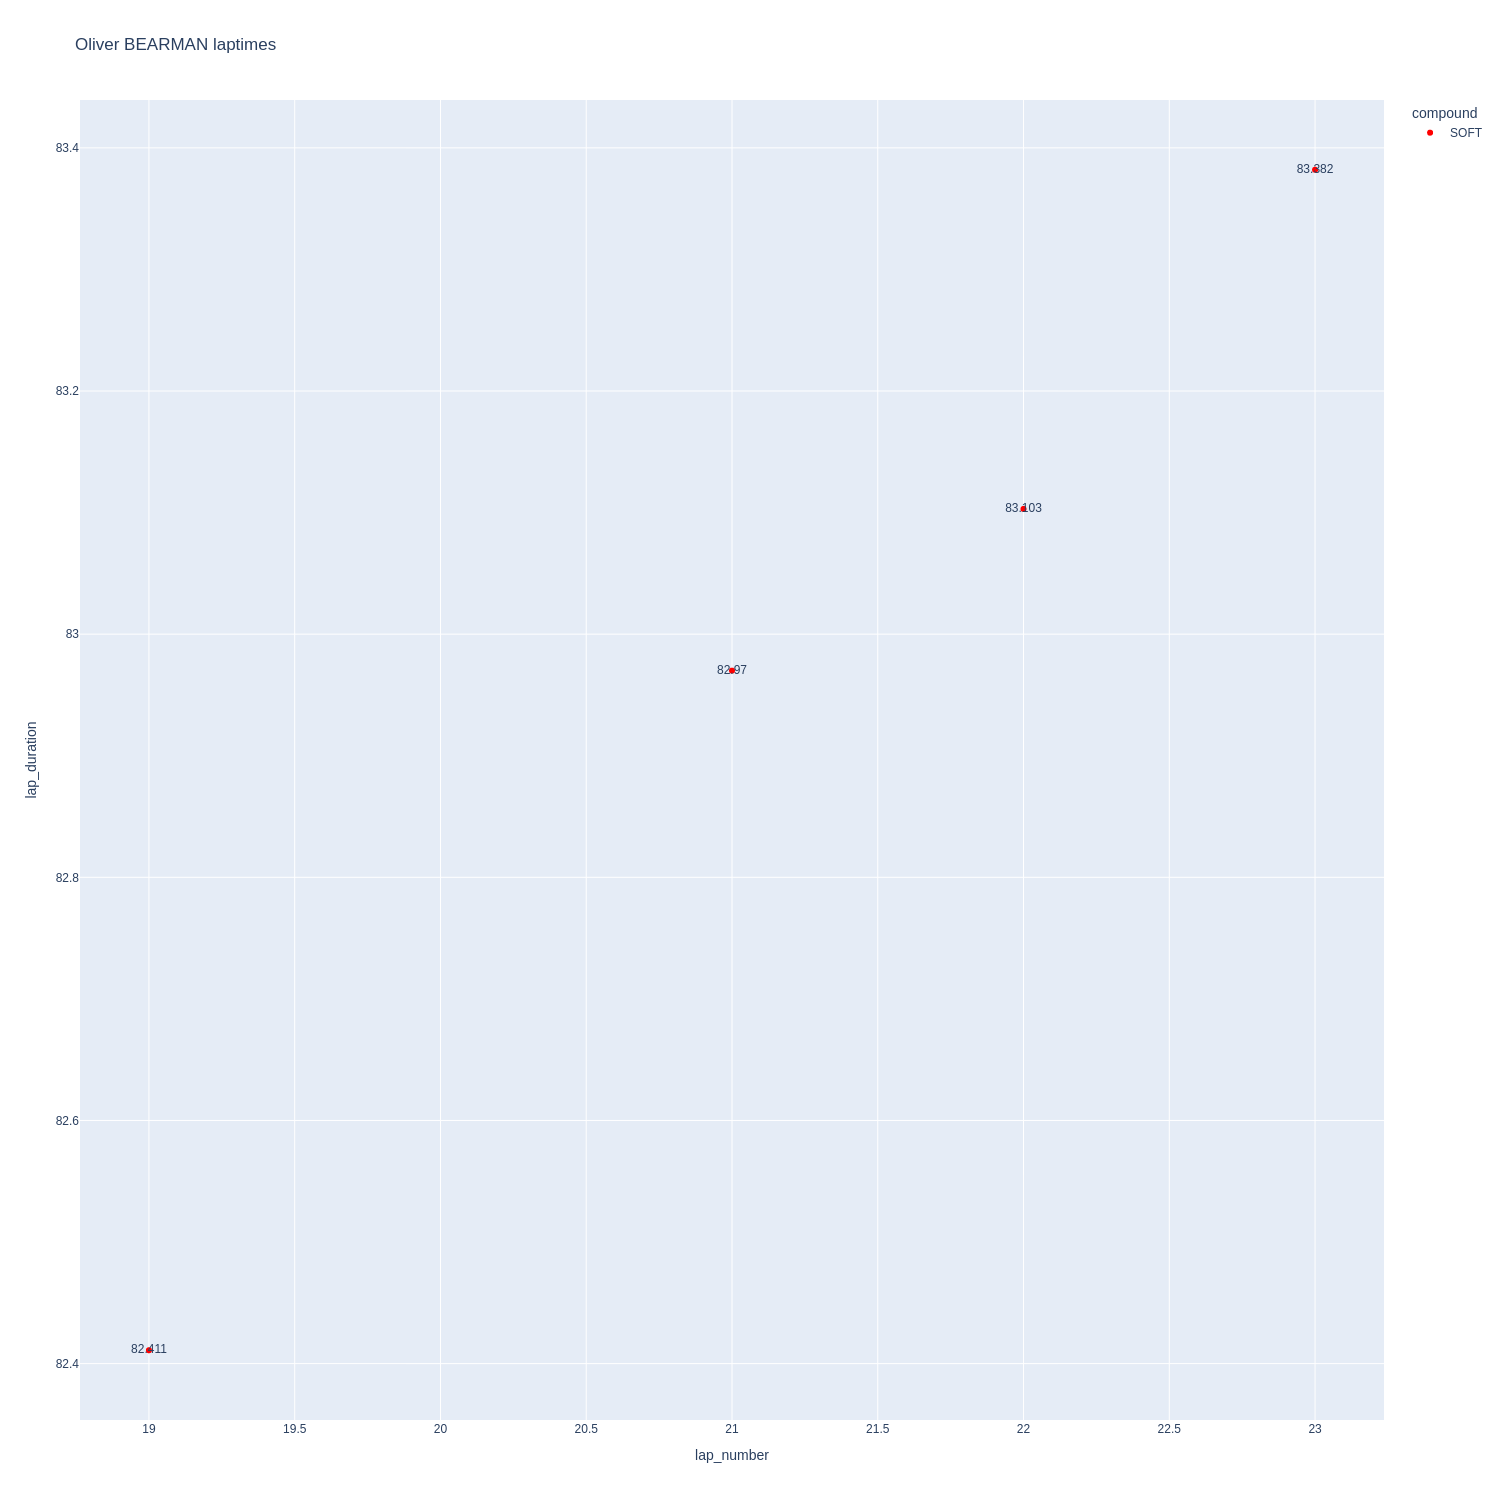

In [66]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

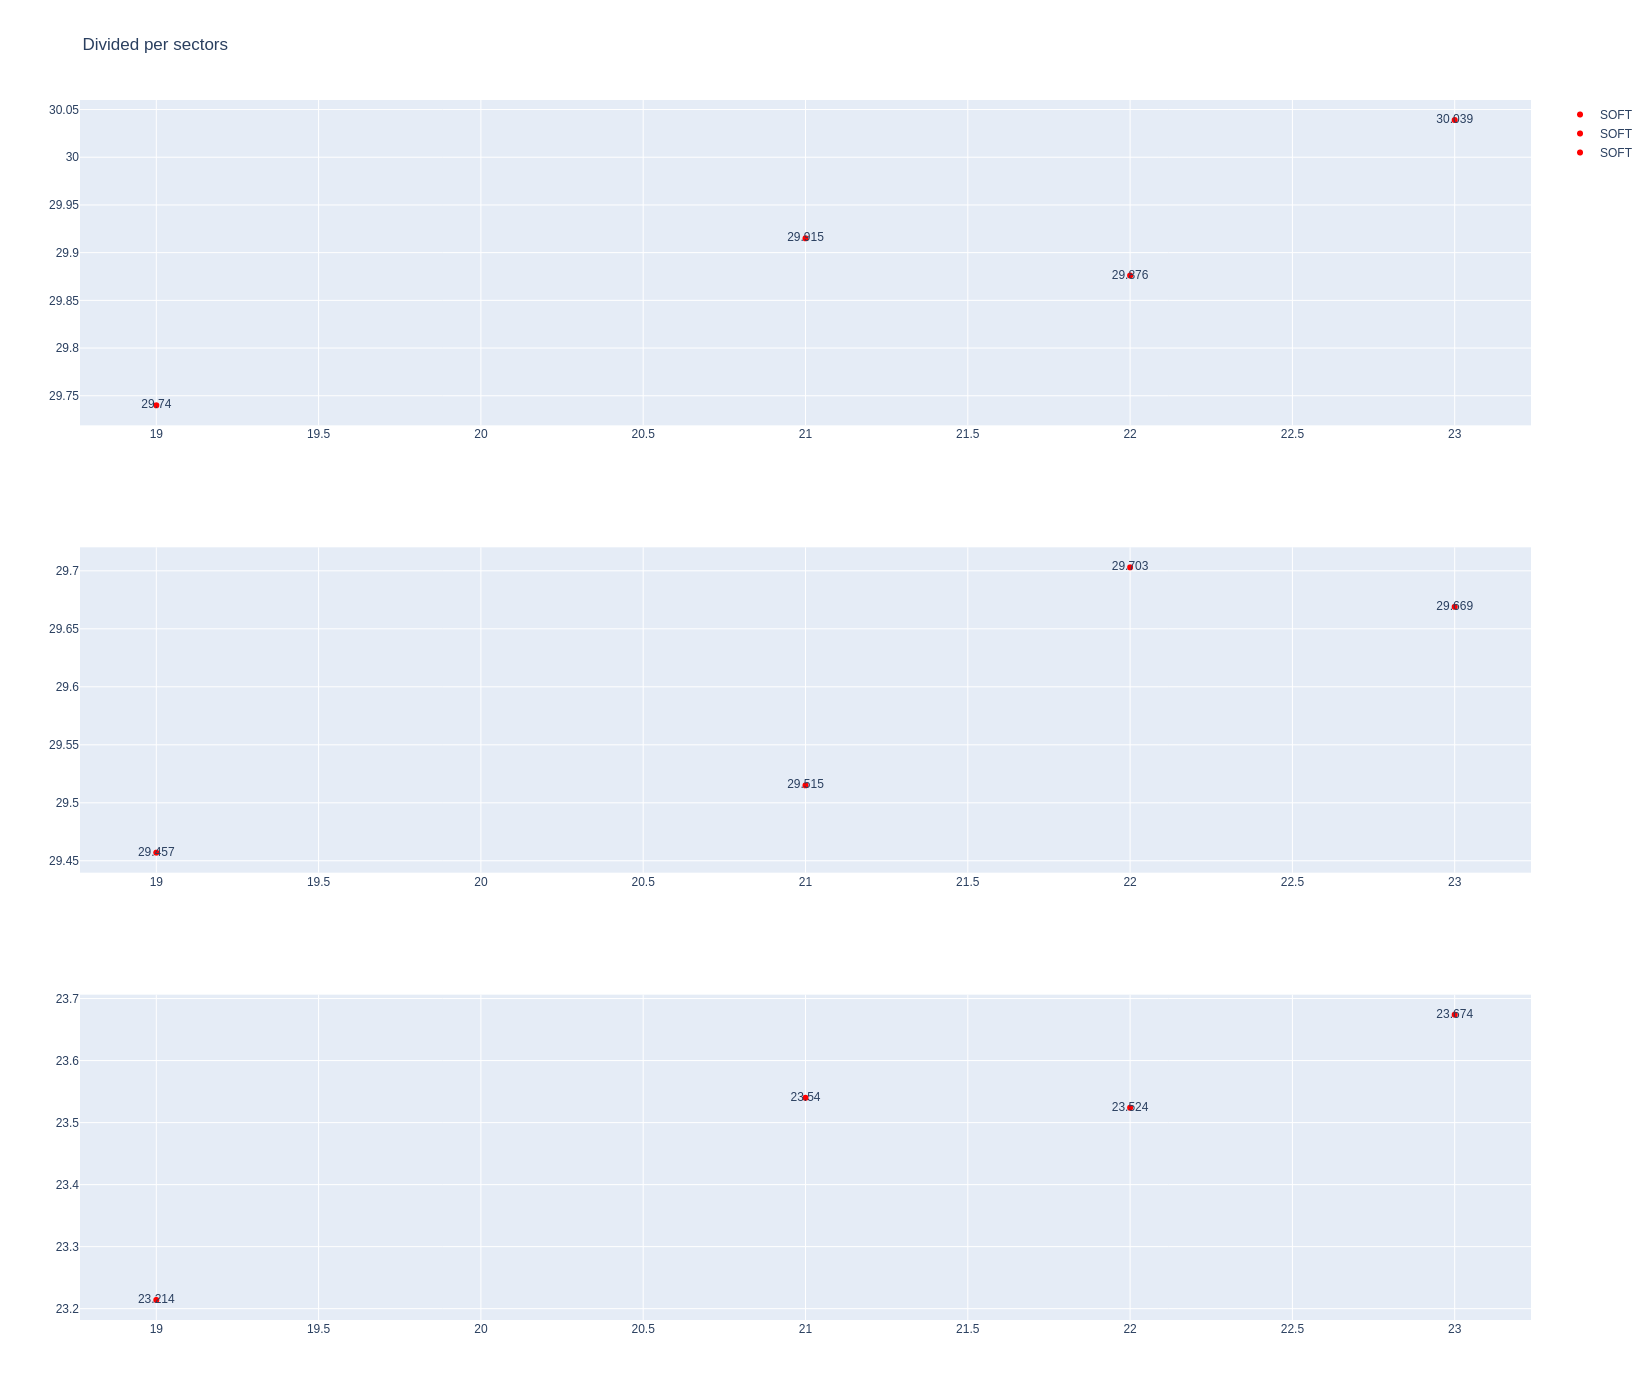

In [67]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [68]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1266         9922             1             43          1        3   
11         1266         9922             1             10          1        6   
24         1266         9922             2             43          4        6   
31         1266         9922             2             10          7        8   
37         1266         9922             3             43          7        9   
45         1266         9922             3             10          9       11   
53         1266         9922             4             43         10       12   
65         1266         9922             4             10         12       14   
71         1266         9922             5             43         13       15   
84         1266         9922             5             10         15       25   
92         1266         9922             6             43         16       29   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
11   MEDIUM                  0  
24   MEDIUM                  3  
31   MEDIUM                  6  
37   MEDIUM                  6  
45     SOFT                  0  
53     SOFT                  0  
65     SOFT                  3  
71     SOFT                  3  
84   MEDIUM                  8  
92   MEDIUM                  9

In [69]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
329  Franco COLAPINTO   MEDIUM  2025-08-01T15:46:01.612000+00:00          17   
346  Franco COLAPINTO   MEDIUM  2025-08-01T15:47:23.554000+00:00          18   
365  Franco COLAPINTO   MEDIUM  2025-08-01T15:48:45.896000+00:00          19   
384  Franco COLAPINTO   MEDIUM  2025-08-01T15:50:08.058000+00:00          20   
403  Franco COLAPINTO   MEDIUM  2025-08-01T15:51:30.352000+00:00          21   
423  Franco COLAPINTO   MEDIUM  2025-08-01T15:52:52.438000+00:00          22   
443  Franco COLAPINTO   MEDIUM  2025-08-01T15:54:15.004000+00:00          23   
463  Franco COLAPINTO   MEDIUM  2025-08-01T15:55:37.381000+00:00          24   
483  Franco COLAPINTO   MEDIUM  2025-08-01T15:56:59.836000+00:00          25   
501  Franco COLAPINTO   MEDIUM  2025-08-01T15:58:22.334000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
329             29.708             29.255             22.964        81.927  
346             29.729             29.480             23.193        82.402  
365             29.751             29.323             23.019        82.093  
384             29.787             29.360             23.121        82.268  
403             29.725             29.206             23.243        82.174  
423             29.803             29.428             23.279        82.510  
443             29.775             29.339             23.274        82.388  
463             29.750             29.312             23.386        82.448  
483             29.792             29.304             23.337        82.433  
501             29.936             29.460             23.412        82.808

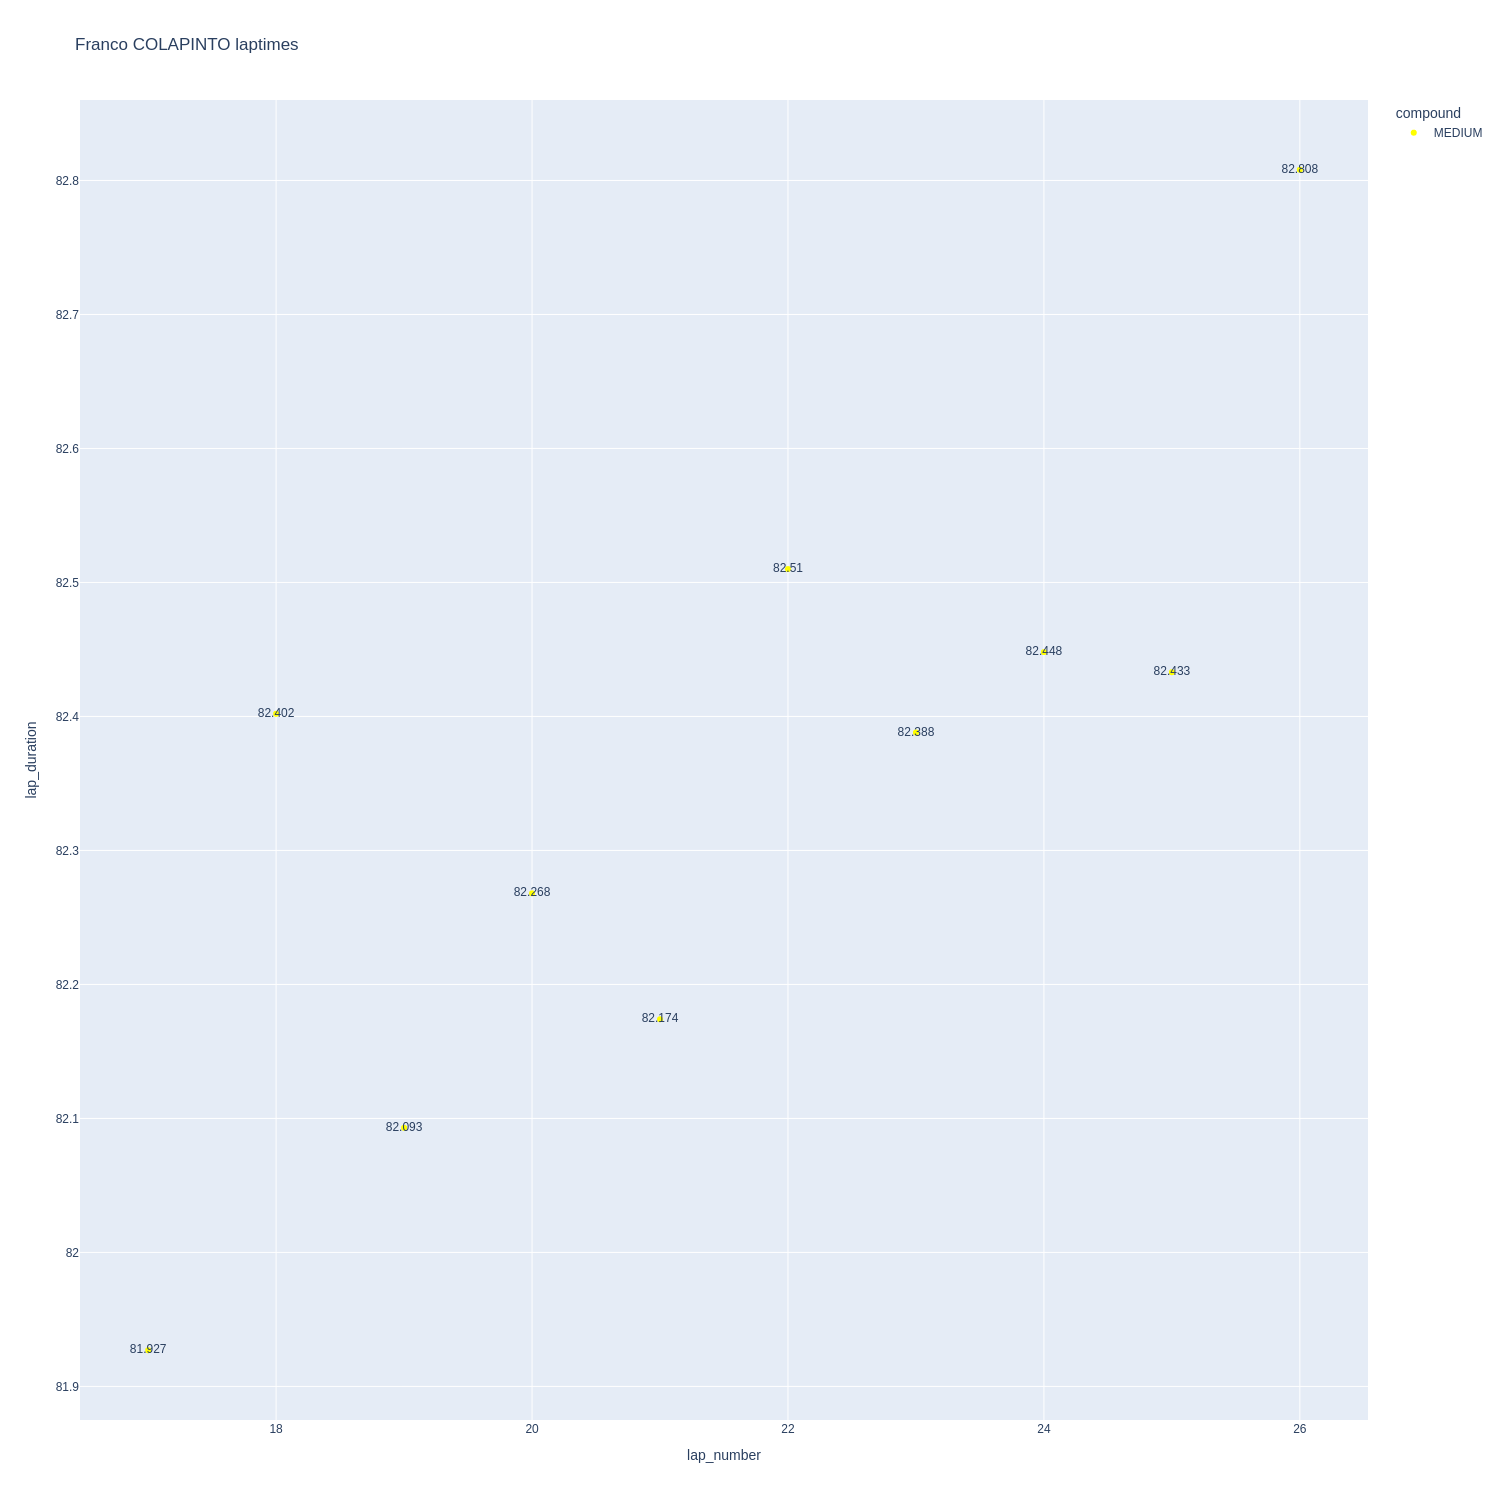

In [70]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

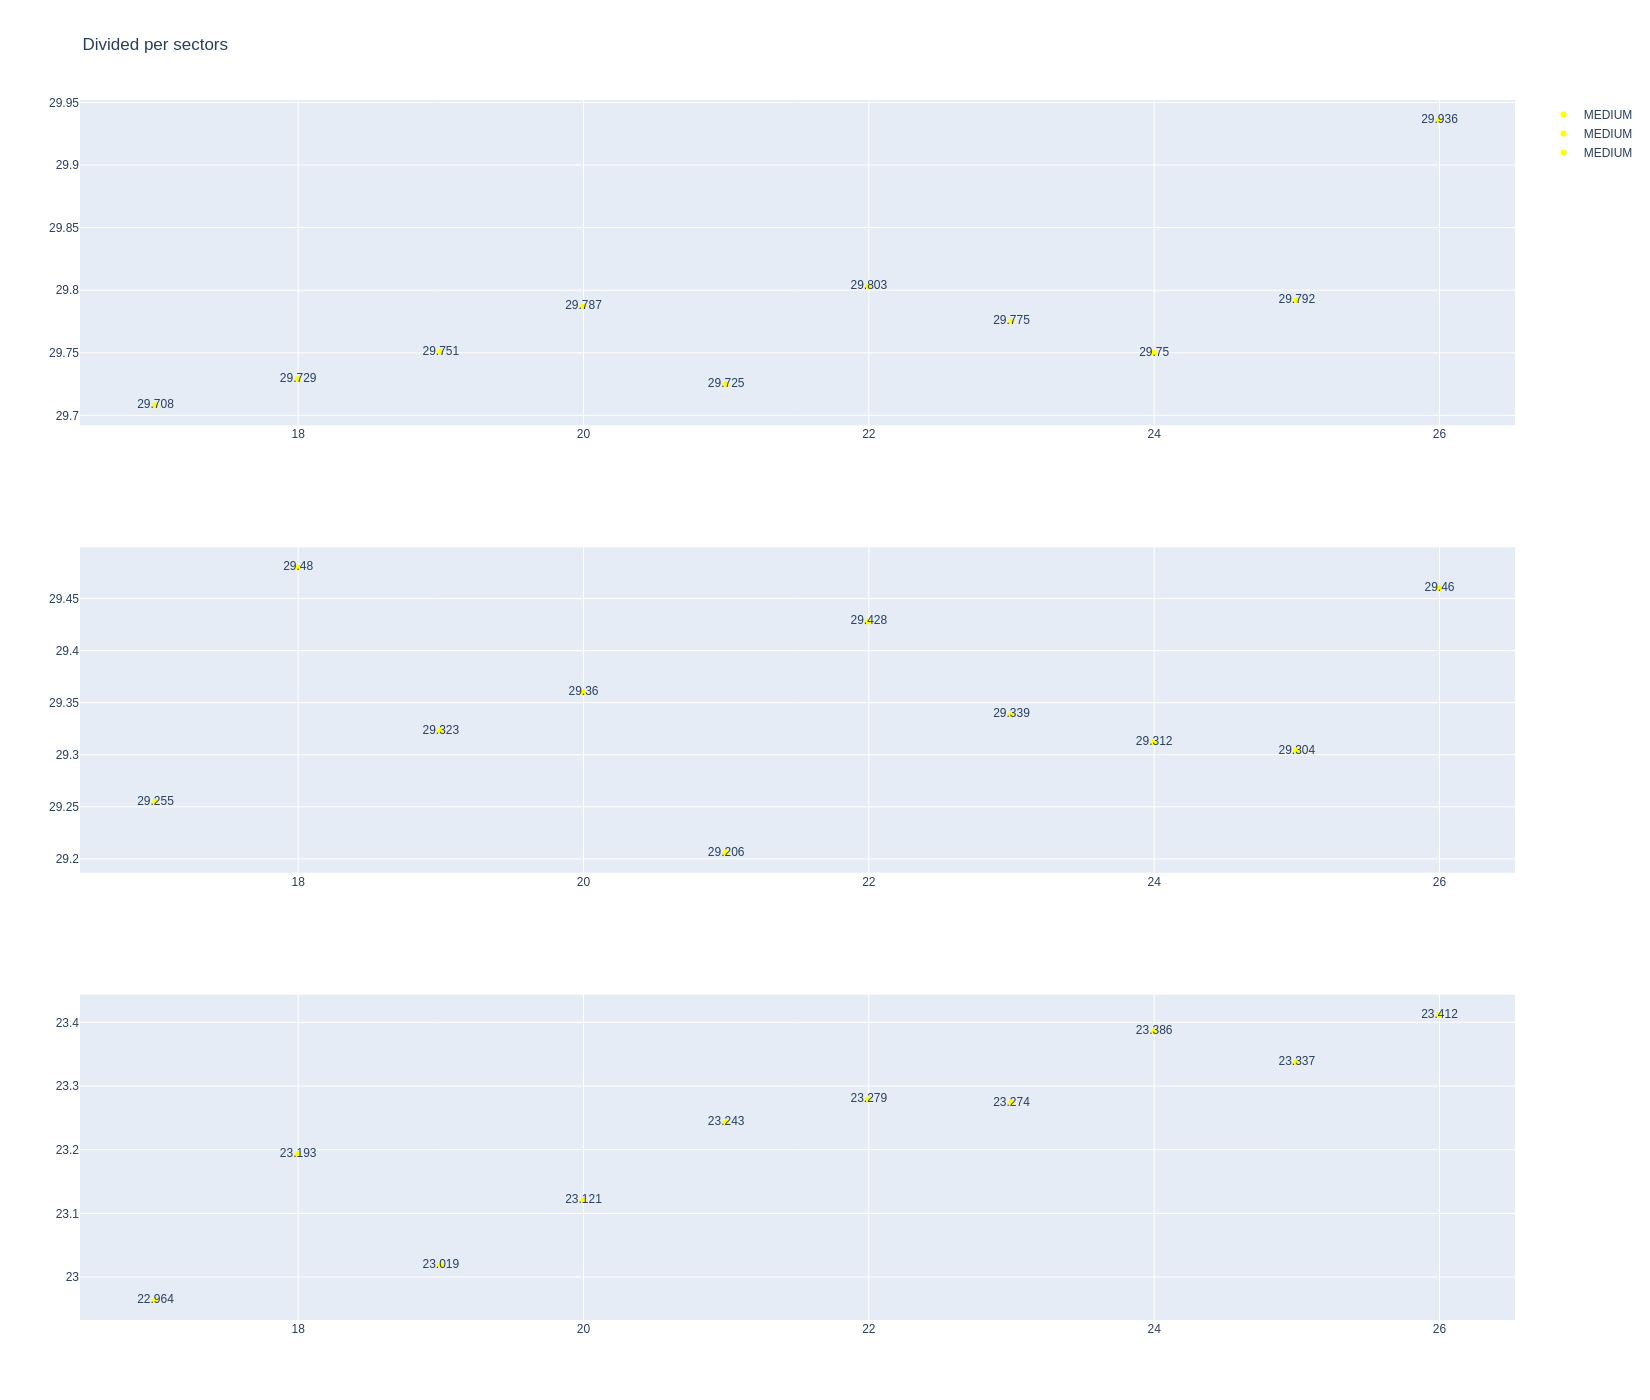

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [72]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
378  Pierre GASLY   MEDIUM  2025-08-01T15:49:35.121000+00:00          16   
397  Pierre GASLY   MEDIUM  2025-08-01T15:50:57.865000+00:00          17   
416  Pierre GASLY   MEDIUM  2025-08-01T15:52:20.709000+00:00          18   
435  Pierre GASLY   MEDIUM  2025-08-01T15:53:43.641000+00:00          19   
455  Pierre GASLY   MEDIUM  2025-08-01T15:55:06.632000+00:00          20   
475  Pierre GASLY   MEDIUM  2025-08-01T15:56:29.607000+00:00          21   
495  Pierre GASLY   MEDIUM  2025-08-01T15:57:52.682000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
378             29.633             29.839             23.306        82.778  
397             29.818             29.608             23.292        82.718  
416             29.757             29.576             23.565        82.898  
435             29.927             29.720             23.410        83.057  
455             29.908             29.671             23.379        82.958  
475             29.902             29.718             23.449        83.069  
495             29.990             29.656             23.550        83.196

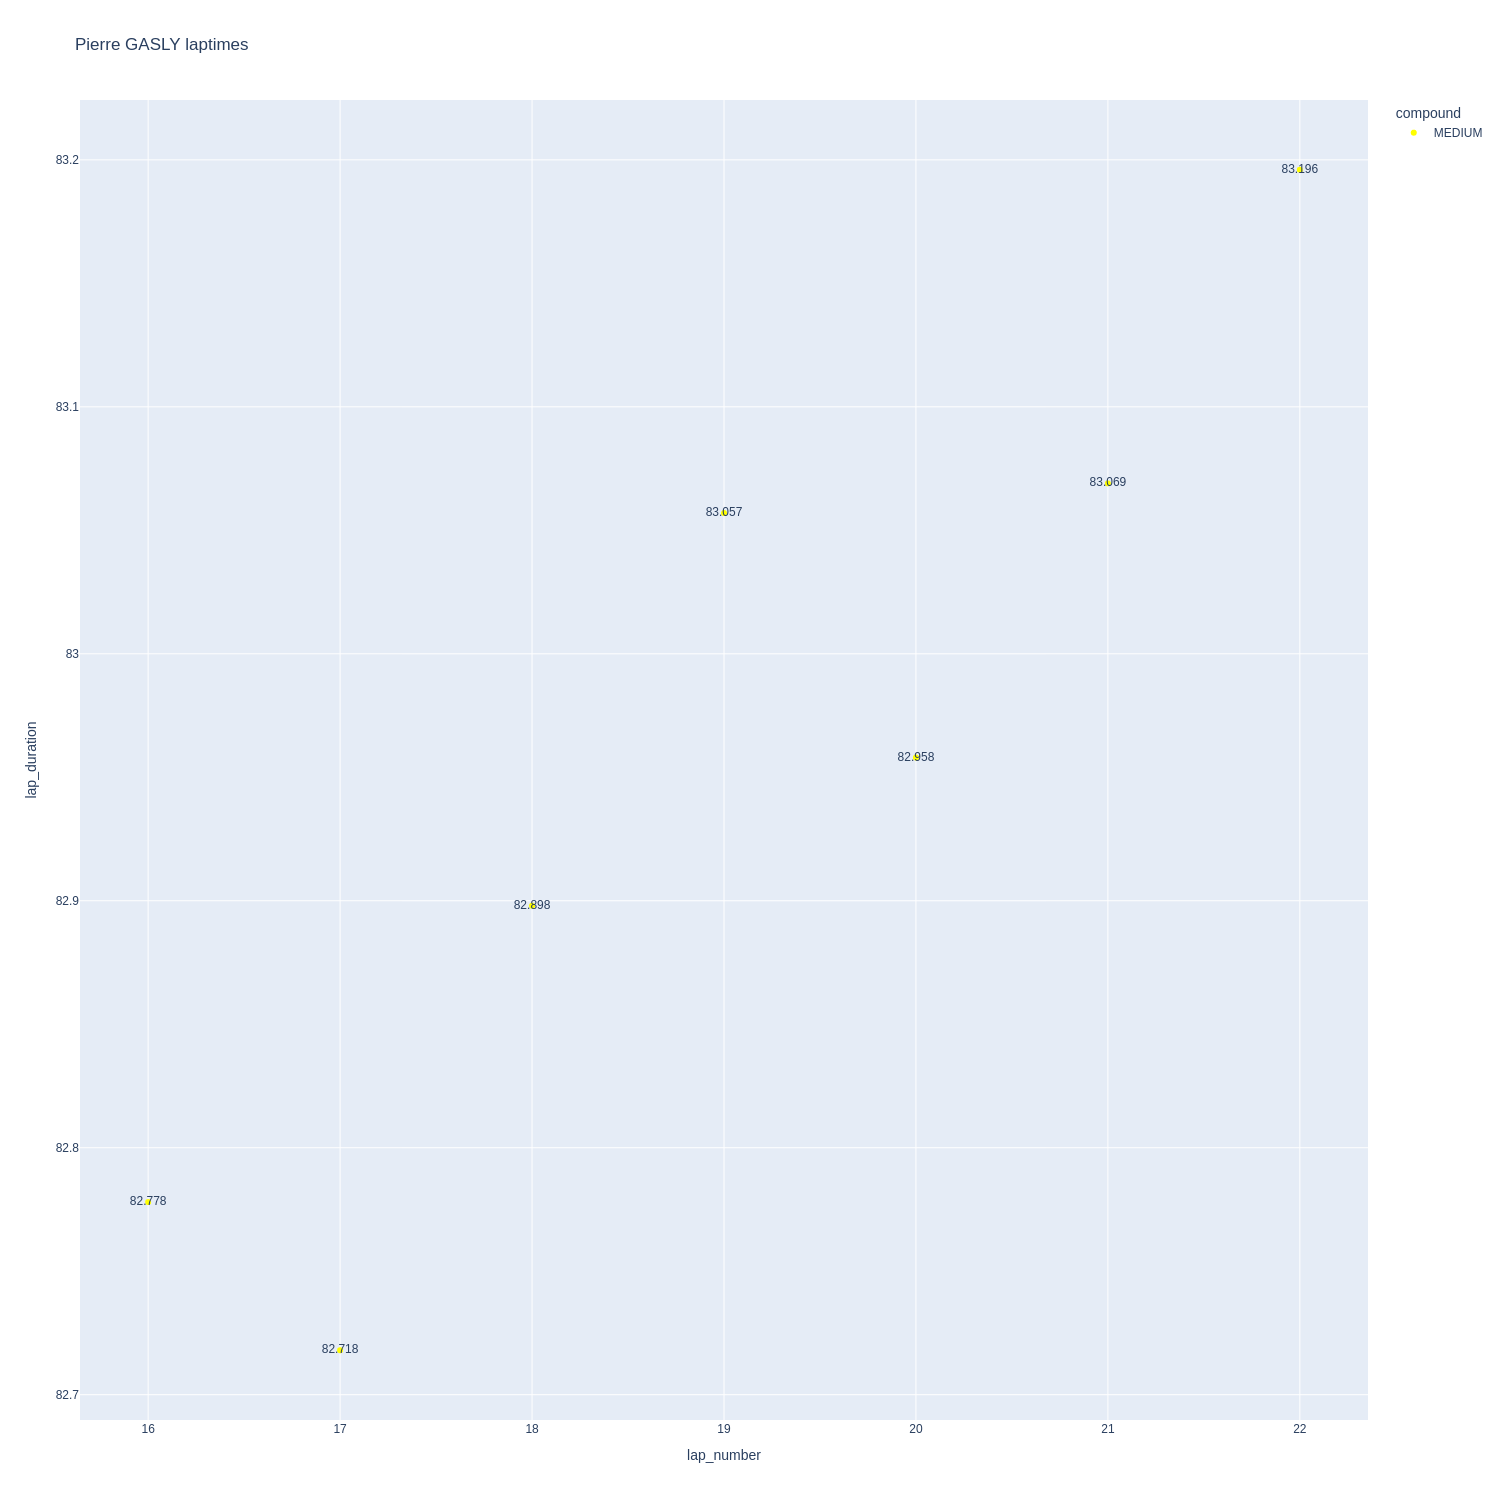

In [73]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

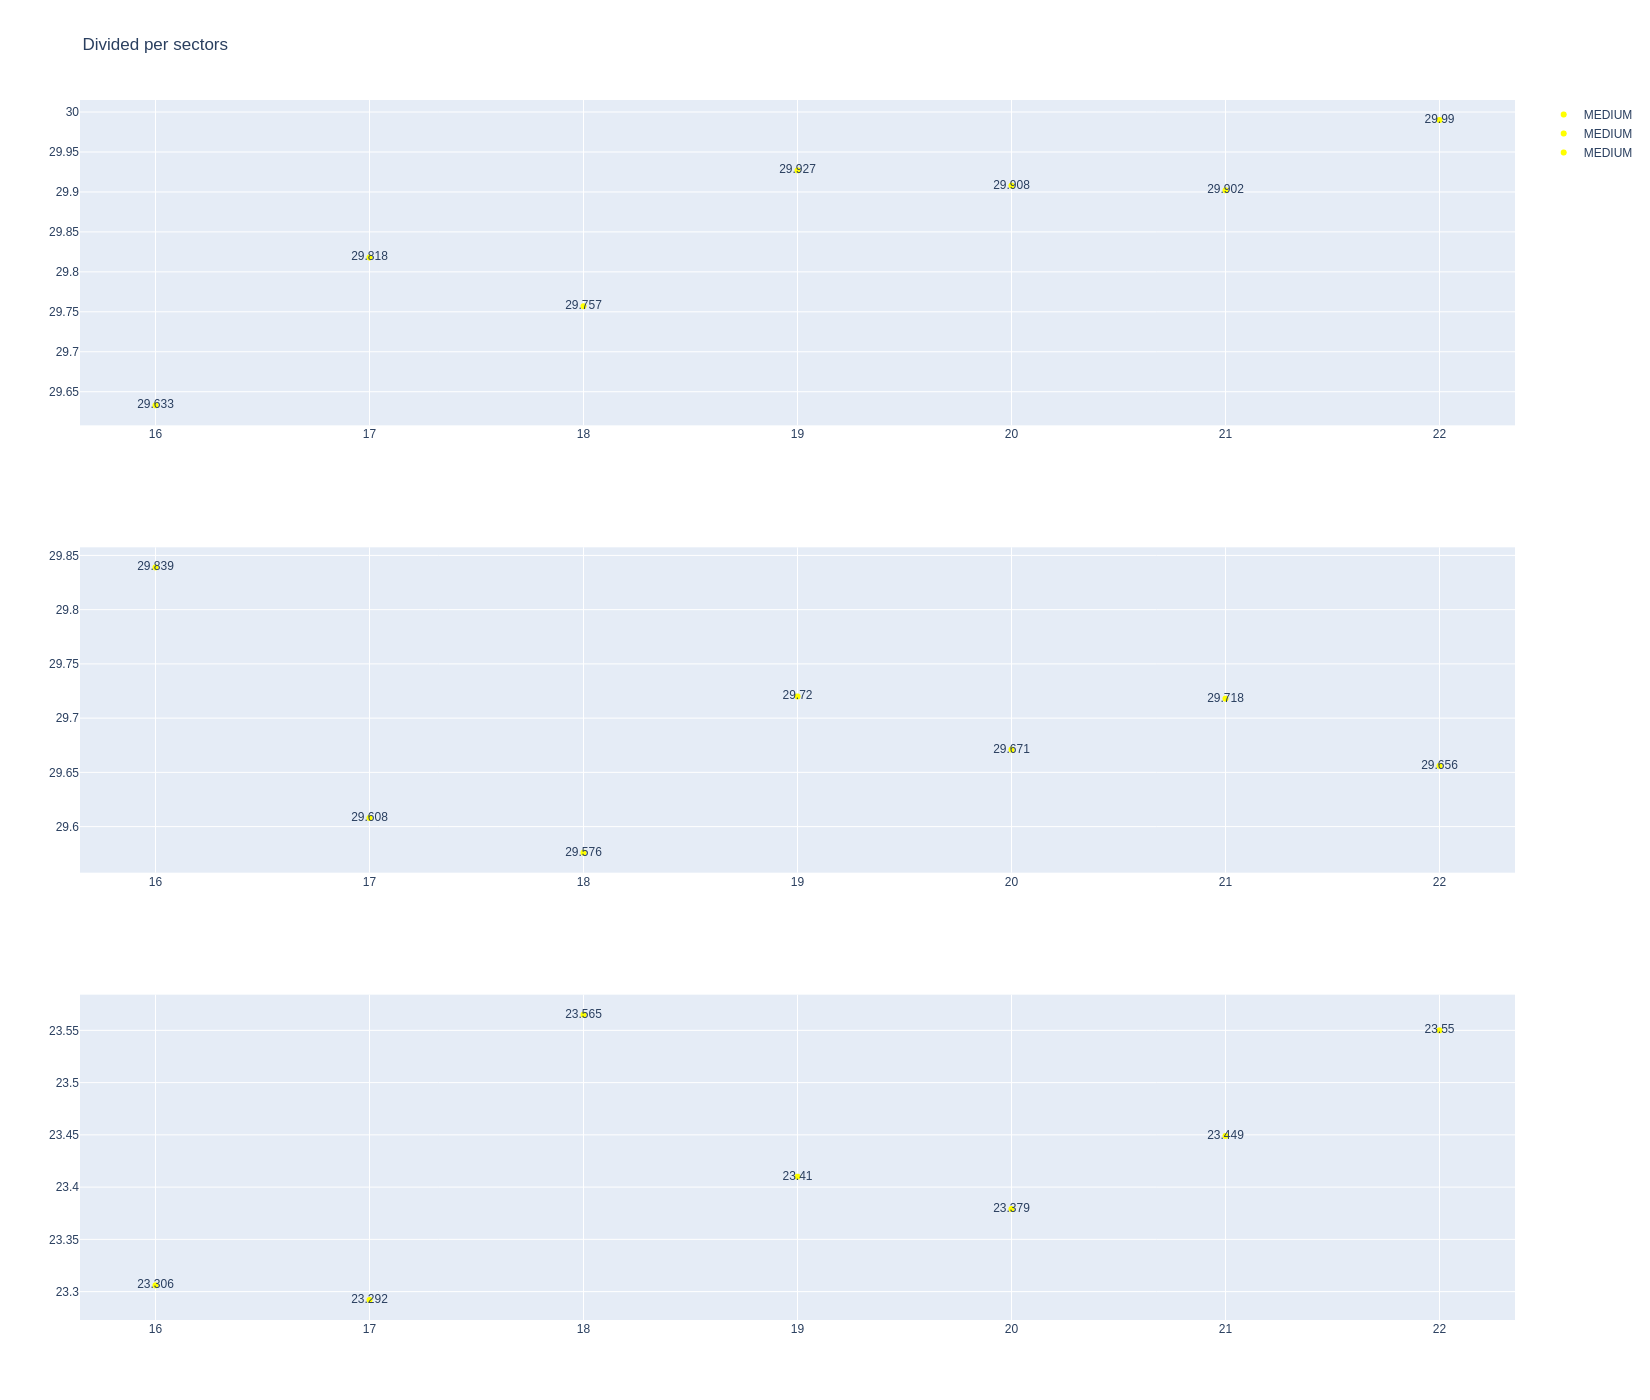

In [74]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [75]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  \
10          1266         9922             1             55          1   
13          1266         9922             1             23          1   
30          1266         9922             2             55          6   
40          1266         9922             2             23          7   
57          1266         9922             3             55         10   
61          1266         9922             3             23         11   
78          1266         9922             4             23         14   
85          1266         9922             4             55         16   
94          1266         9922             5             23         17   
96          1266         9922             5             55         17   
106         1266         9922             6             23         28   

     lap_end compound  tyre_age_at_start  
10         5   MEDIUM                  0  
13         6   MEDIUM                  0  
30         9   MEDIUM                  5  
40        10   MEDIUM                  6  
57        15     SOFT                  0  
61        13     SOFT                  0  
78        16     SOFT                  3  
85        16     SOFT                  6  
94        27   MEDIUM                 10  
96        32   MEDIUM                  9  
106       30     SOFT                  6

In [76]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
318  Alexander ALBON   MEDIUM  2025-08-01T15:45:01.544000+00:00          18   
334  Alexander ALBON   MEDIUM  2025-08-01T15:46:23.663000+00:00          19   
351  Alexander ALBON   MEDIUM  2025-08-01T15:47:46.030000+00:00          20   
369  Alexander ALBON   MEDIUM  2025-08-01T15:49:08.374000+00:00          21   
388  Alexander ALBON   MEDIUM  2025-08-01T15:50:30.724000+00:00          22   
407  Alexander ALBON   MEDIUM  2025-08-01T15:51:53.024000+00:00          23   
427  Alexander ALBON   MEDIUM  2025-08-01T15:53:15.250000+00:00          24   
447  Alexander ALBON   MEDIUM  2025-08-01T15:54:37.762000+00:00          25   
467  Alexander ALBON   MEDIUM  2025-08-01T15:56:00.498000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
318             29.514             29.501             23.079        82.094  
334             29.589             29.569             23.160        82.318  
351             29.638             29.522             23.179        82.339  
369             29.848             29.482             23.114        82.444  
388             29.526             29.519             23.216        82.261  
407             29.567             29.294             23.347        82.208  
427             29.743             29.281             23.422        82.446  
447             29.786             29.392             23.610        82.788  
467             29.904             29.468             23.577        82.949

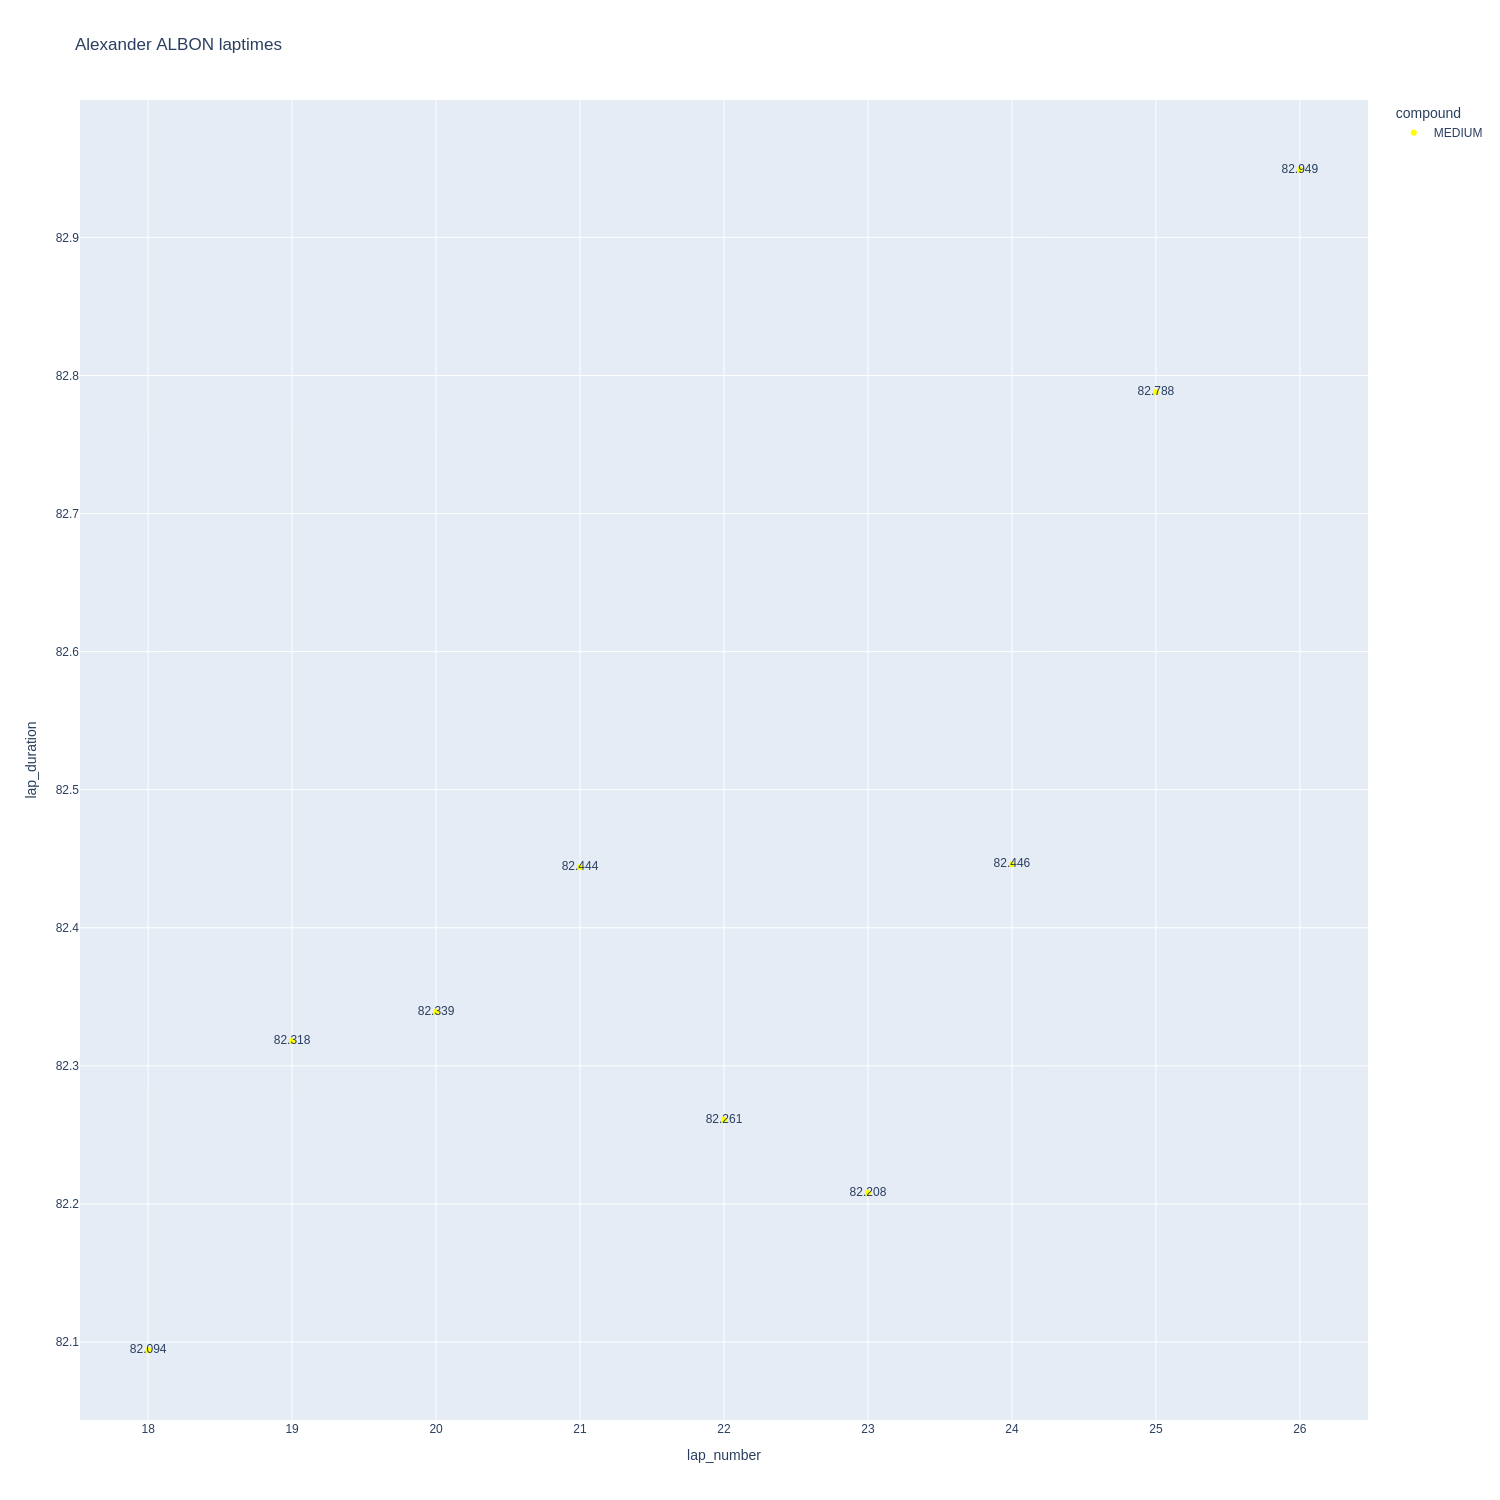

In [77]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

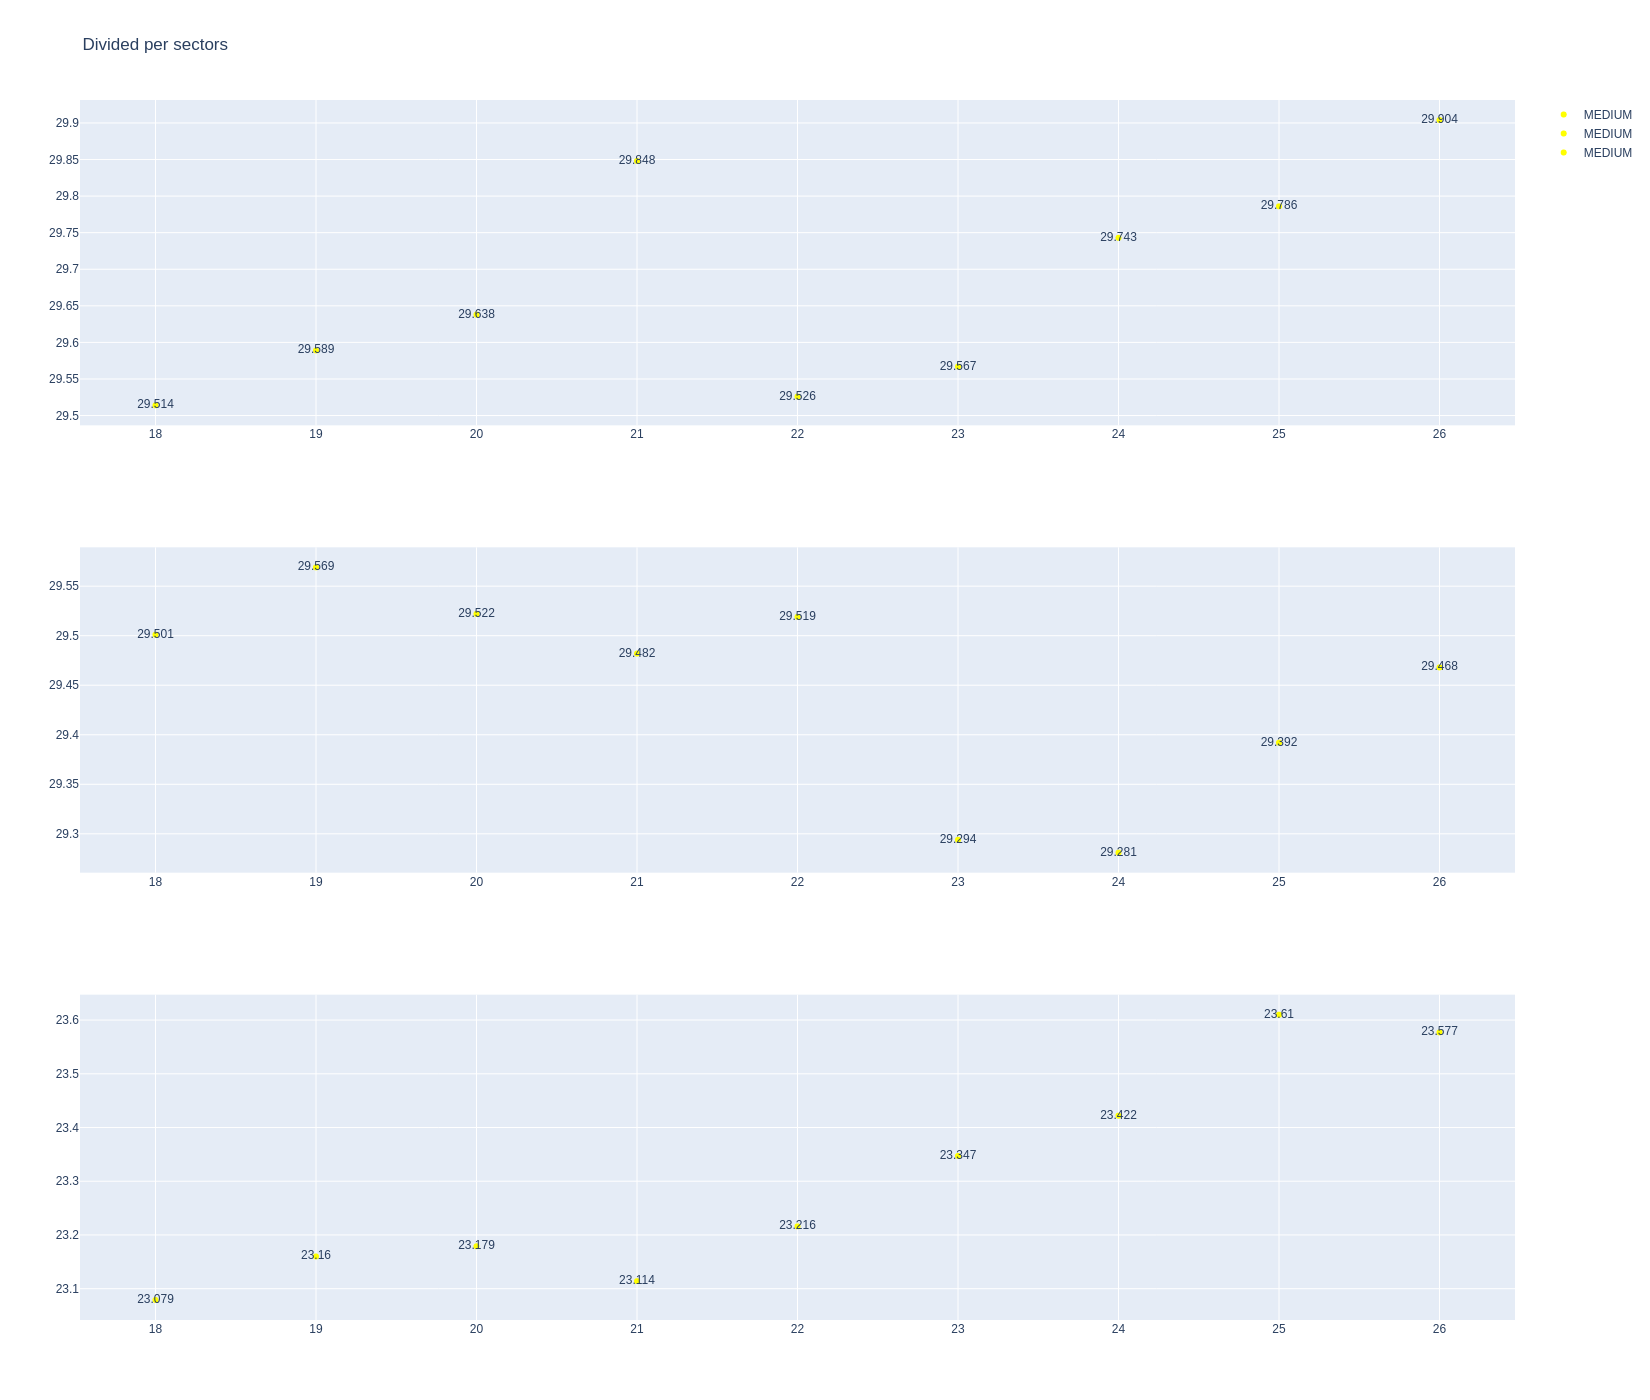

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [79]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
302  Carlos SAINZ   MEDIUM  2025-08-01T15:43:14.131000+00:00          18   
330  Carlos SAINZ   MEDIUM  2025-08-01T15:46:09.424000+00:00          20   
347  Carlos SAINZ   MEDIUM  2025-08-01T15:47:31.592000+00:00          21   
366  Carlos SAINZ   MEDIUM  2025-08-01T15:48:53.684000+00:00          22   
385  Carlos SAINZ   MEDIUM  2025-08-01T15:50:15.943000+00:00          23   
404  Carlos SAINZ   MEDIUM  2025-08-01T15:51:38.180000+00:00          24   
424  Carlos SAINZ   MEDIUM  2025-08-01T15:53:00.813000+00:00          25   
444  Carlos SAINZ   MEDIUM  2025-08-01T15:54:23.888000+00:00          26   
464  Carlos SAINZ   MEDIUM  2025-08-01T15:55:46.795000+00:00          27   
484  Carlos SAINZ   MEDIUM  2025-08-01T15:57:09.690000+00:00          28   
523  Carlos SAINZ   MEDIUM  2025-08-01T15:59:57.883000+00:00          30   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
302             29.759             29.383             23.010        82.152  
330             29.694             29.433             23.018        82.145  
347             29.649             29.451             23.156        82.256  
366             29.778             29.365             23.071        82.214  
385             29.673             29.387             23.221        82.281  
404             29.806             29.554             23.247        82.607  
424             29.882             29.701             23.396        82.979  
444             29.972             29.584             23.440        82.996  
464             30.007             29.411             23.444        82.862  
484             29.882             29.544             23.554        82.980  
523             29.999             29.971             23.803        83.773

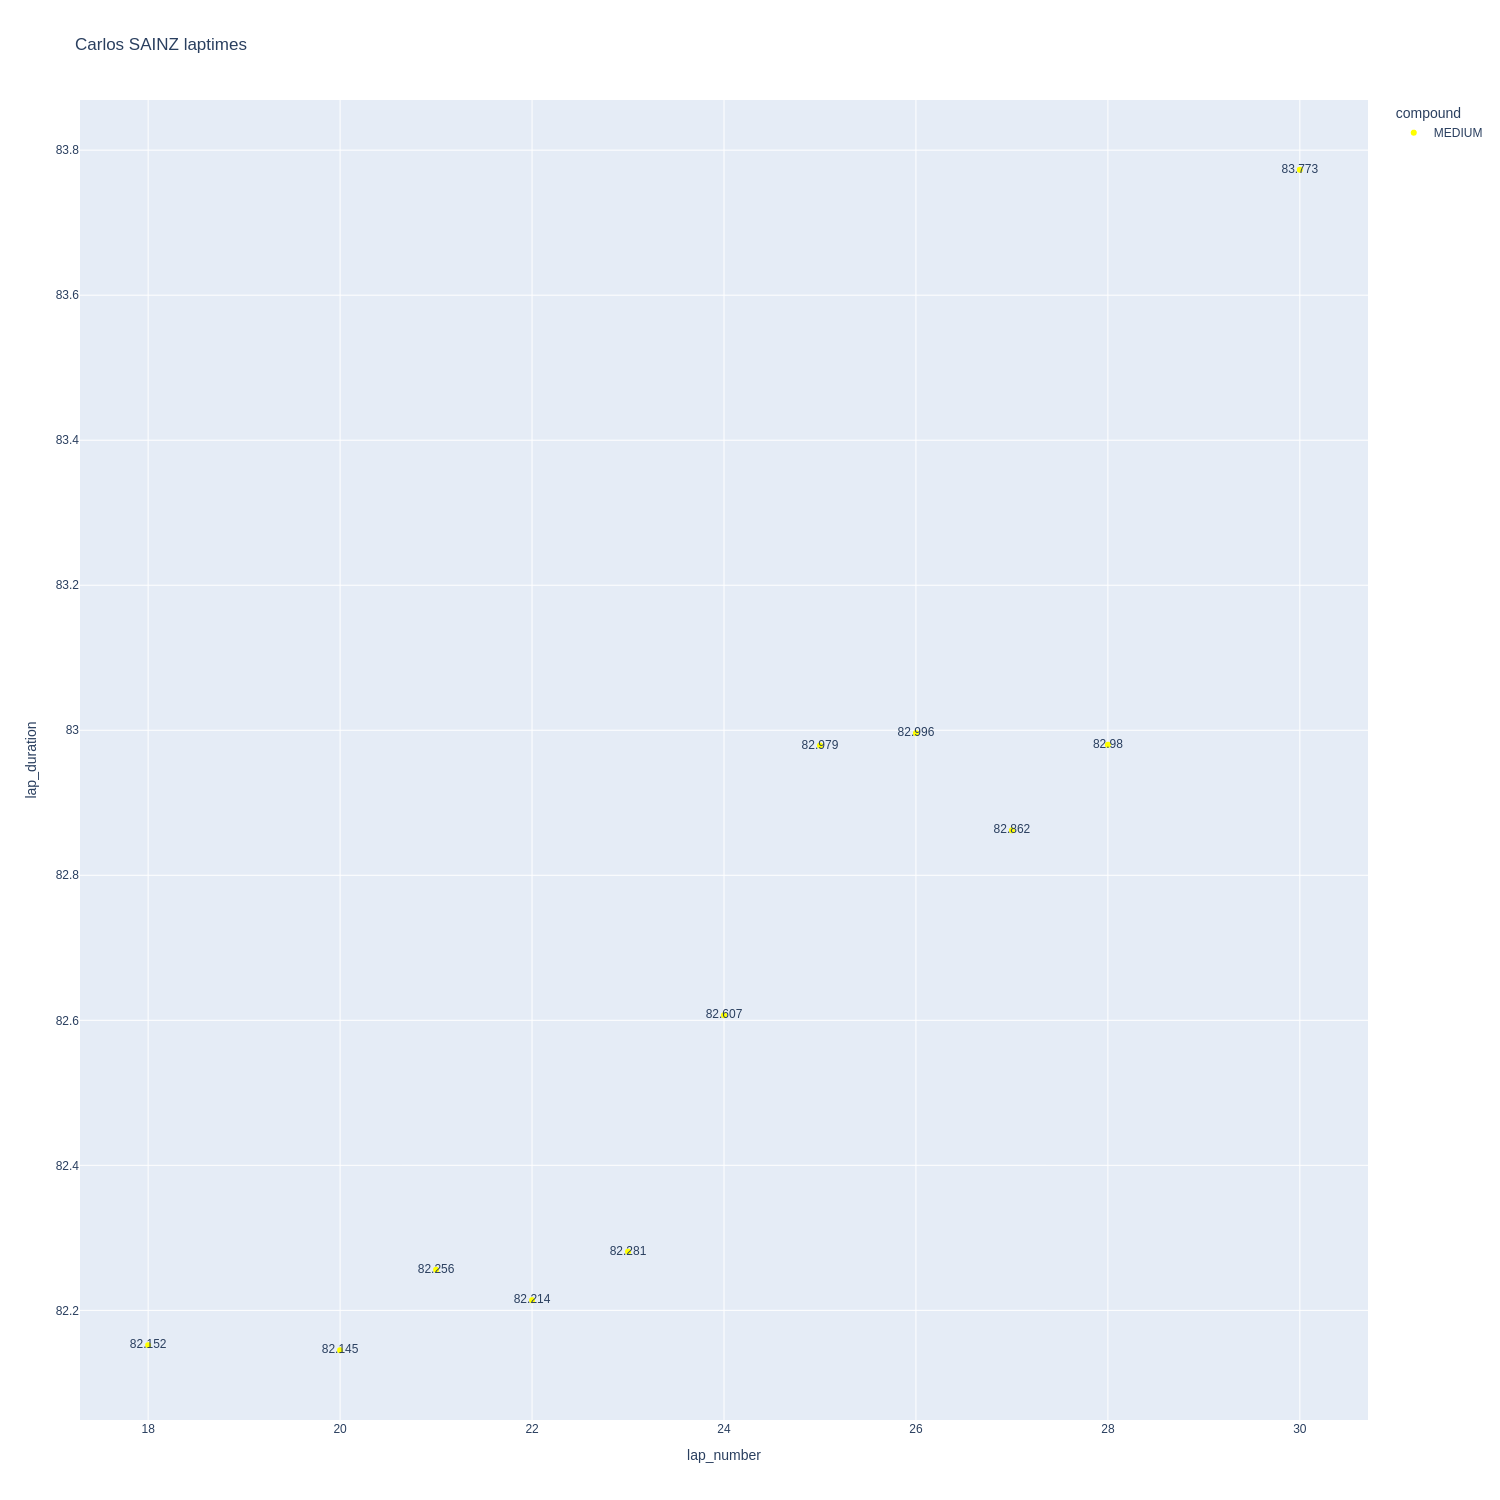

In [80]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

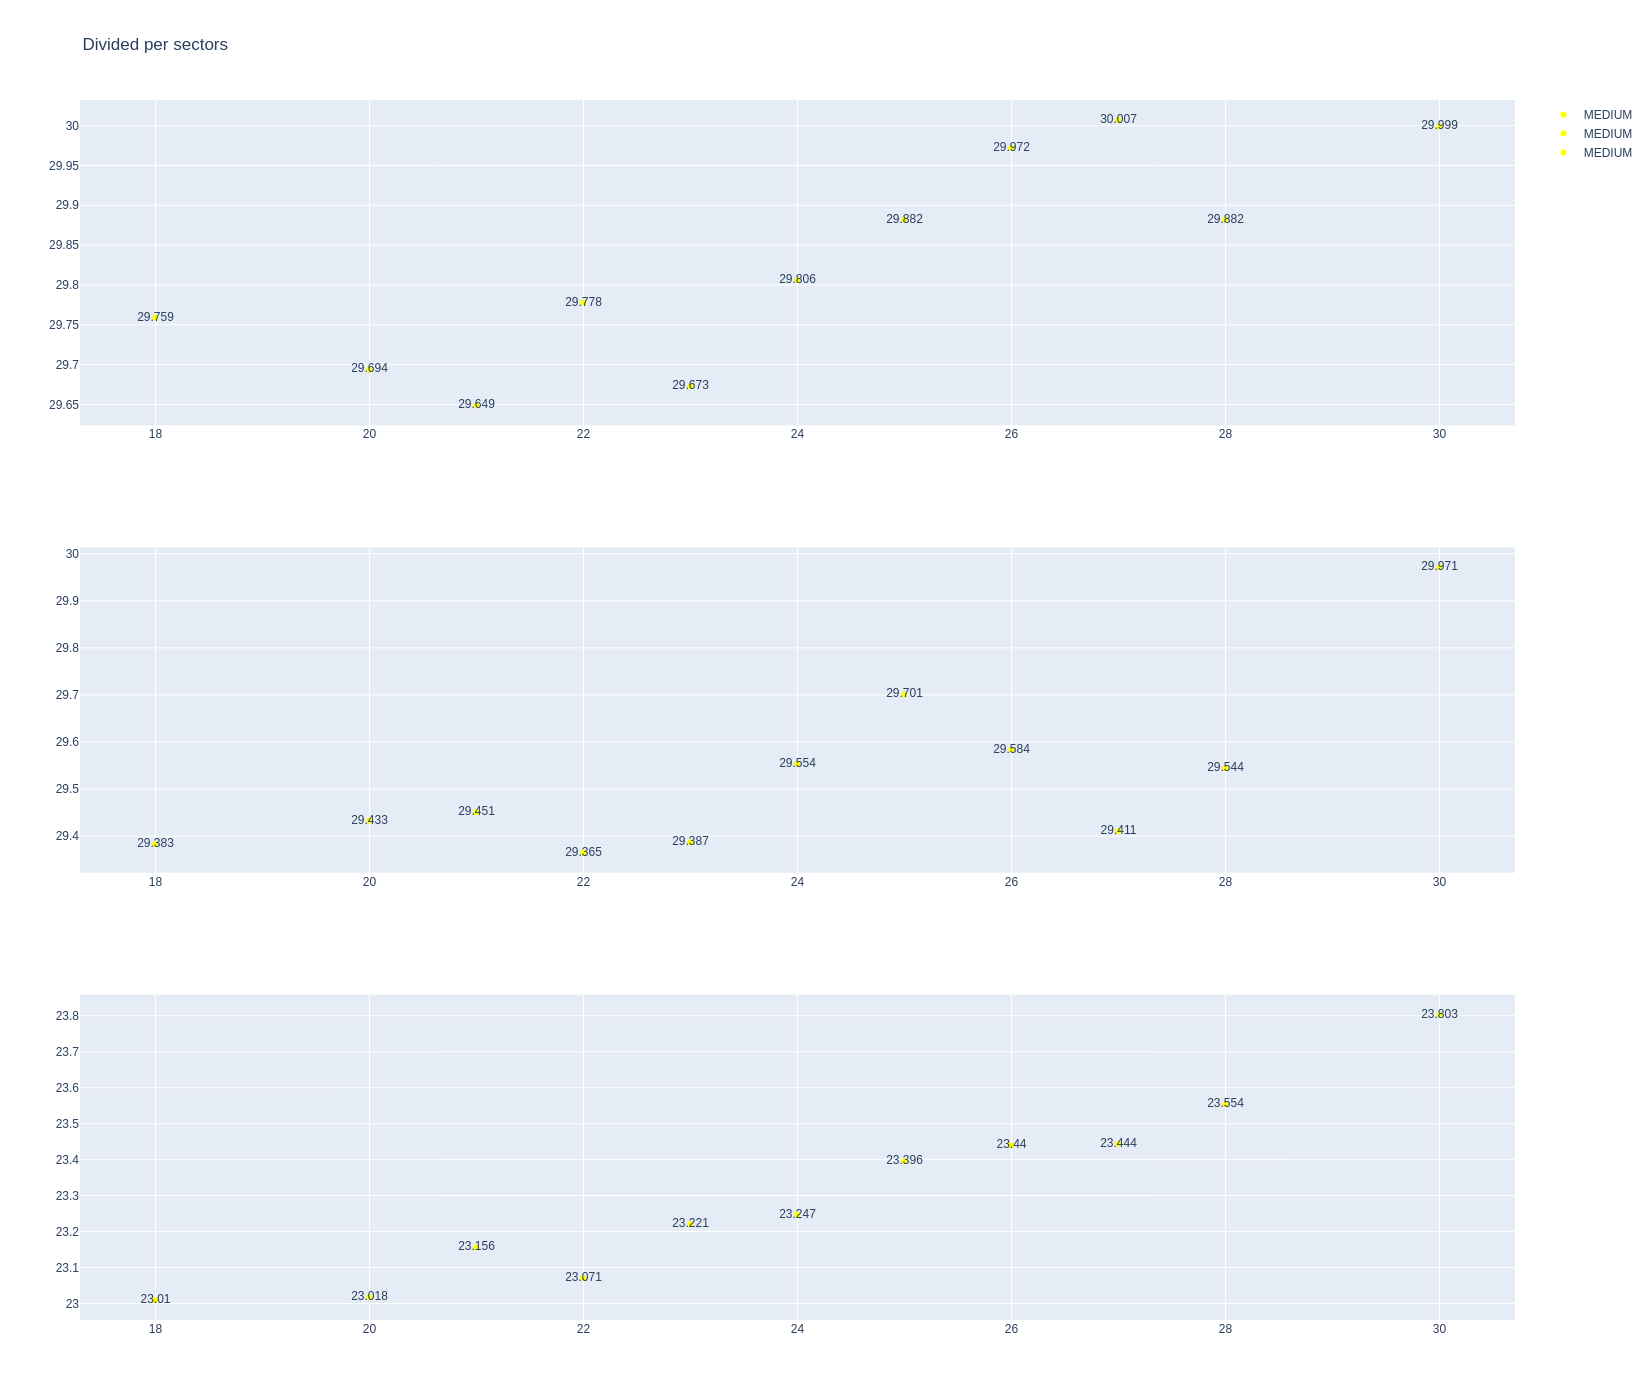

In [81]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [82]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  \
9           1266         9922             1             27          1   
19          1266         9922             1              5          1   
29          1266         9922             2             27          6   
46          1266         9922             3             27          9   
60          1266         9922             2              5         11   
66          1266         9922             4             27         12   
77          1266         9922             3              5         14   
81          1266         9922             5             27         15   
93          1266         9922             4              5         17   
98          1266         9922             6             27         18   
103         1266         9922             5              5         27   
108         1266         9922             7             27         29   

     lap_end compound  tyre_age_at_start  
9          5   MEDIUM                  0  
19        10     HARD                  0  
29         8   MEDIUM                  5  
46        11   MEDIUM                  8  
60        13     SOFT                  0  
66        14     SOFT                  0  
77        16     SOFT                  3  
81        17     SOFT                  3  
93        26     HARD                 10  
98        28   MEDIUM                 11  
103       29     SOFT                  0  
108       31     SOFT                  6

In [83]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
321  Nico HULKENBERG   MEDIUM  2025-08-01T15:45:14.719000+00:00          19   
338  Nico HULKENBERG   MEDIUM  2025-08-01T15:46:37.157000+00:00          20   
356  Nico HULKENBERG   MEDIUM  2025-08-01T15:47:59.645000+00:00          21   
373  Nico HULKENBERG   MEDIUM  2025-08-01T15:49:22.105000+00:00          22   
392  Nico HULKENBERG   MEDIUM  2025-08-01T15:50:43.756000+00:00          23   
411  Nico HULKENBERG   MEDIUM  2025-08-01T15:52:05.609000+00:00          24   
431  Nico HULKENBERG   MEDIUM  2025-08-01T15:53:27.500000+00:00          25   
451  Nico HULKENBERG   MEDIUM  2025-08-01T15:54:49.491000+00:00          26   
470  Nico HULKENBERG   MEDIUM  2025-08-01T15:56:11.435000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
321             29.774             29.534             23.115        82.423  
338             29.590             29.638             23.205        82.433  
356             29.537             29.430             23.452        82.419  
373             29.639             29.103             23.024        81.766  
392             29.683             29.025             23.043        81.751  
411             29.624             29.128             23.125        81.877  
431             29.616             29.187             23.241        82.044  
451             29.751             29.116             23.087        81.954  
470             29.872             29.534             23.152        82.558

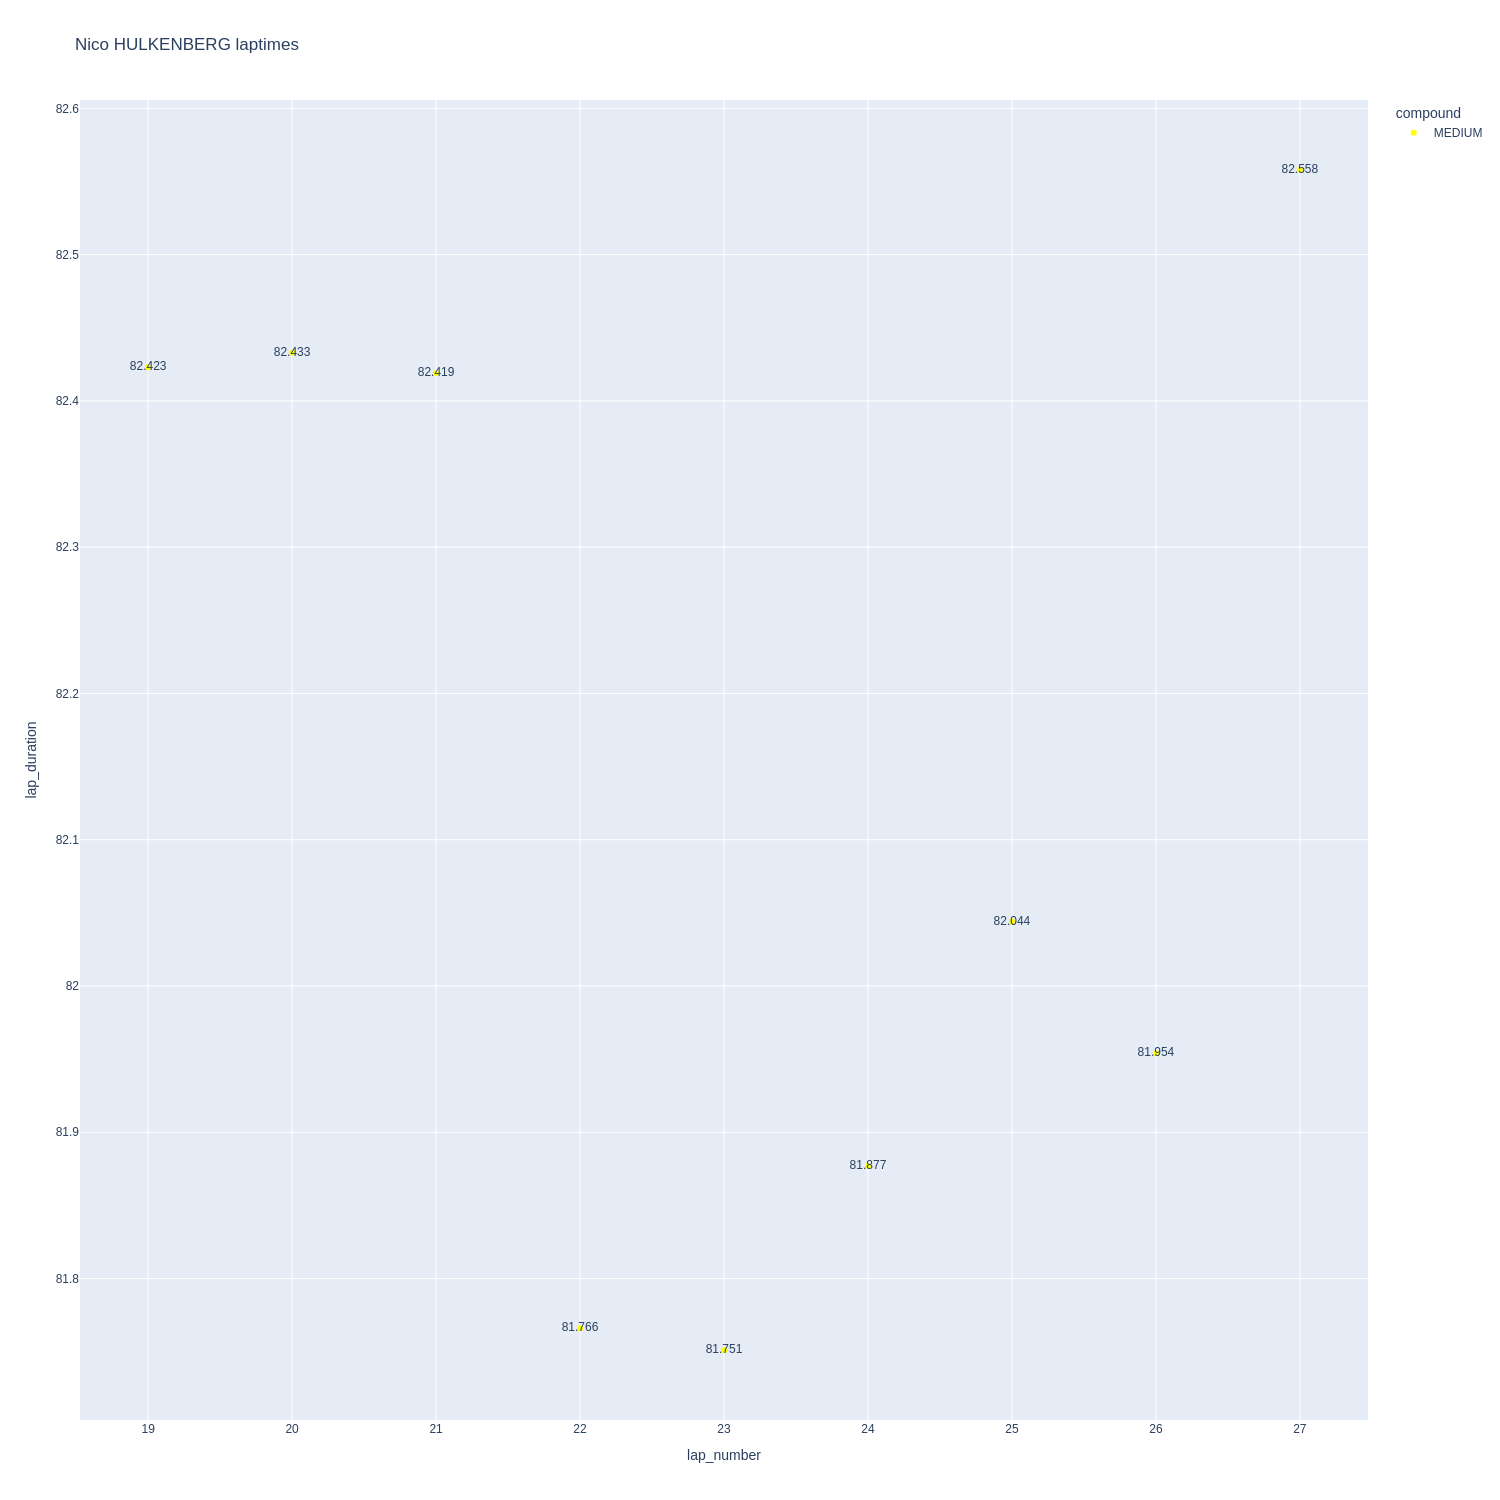

In [84]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

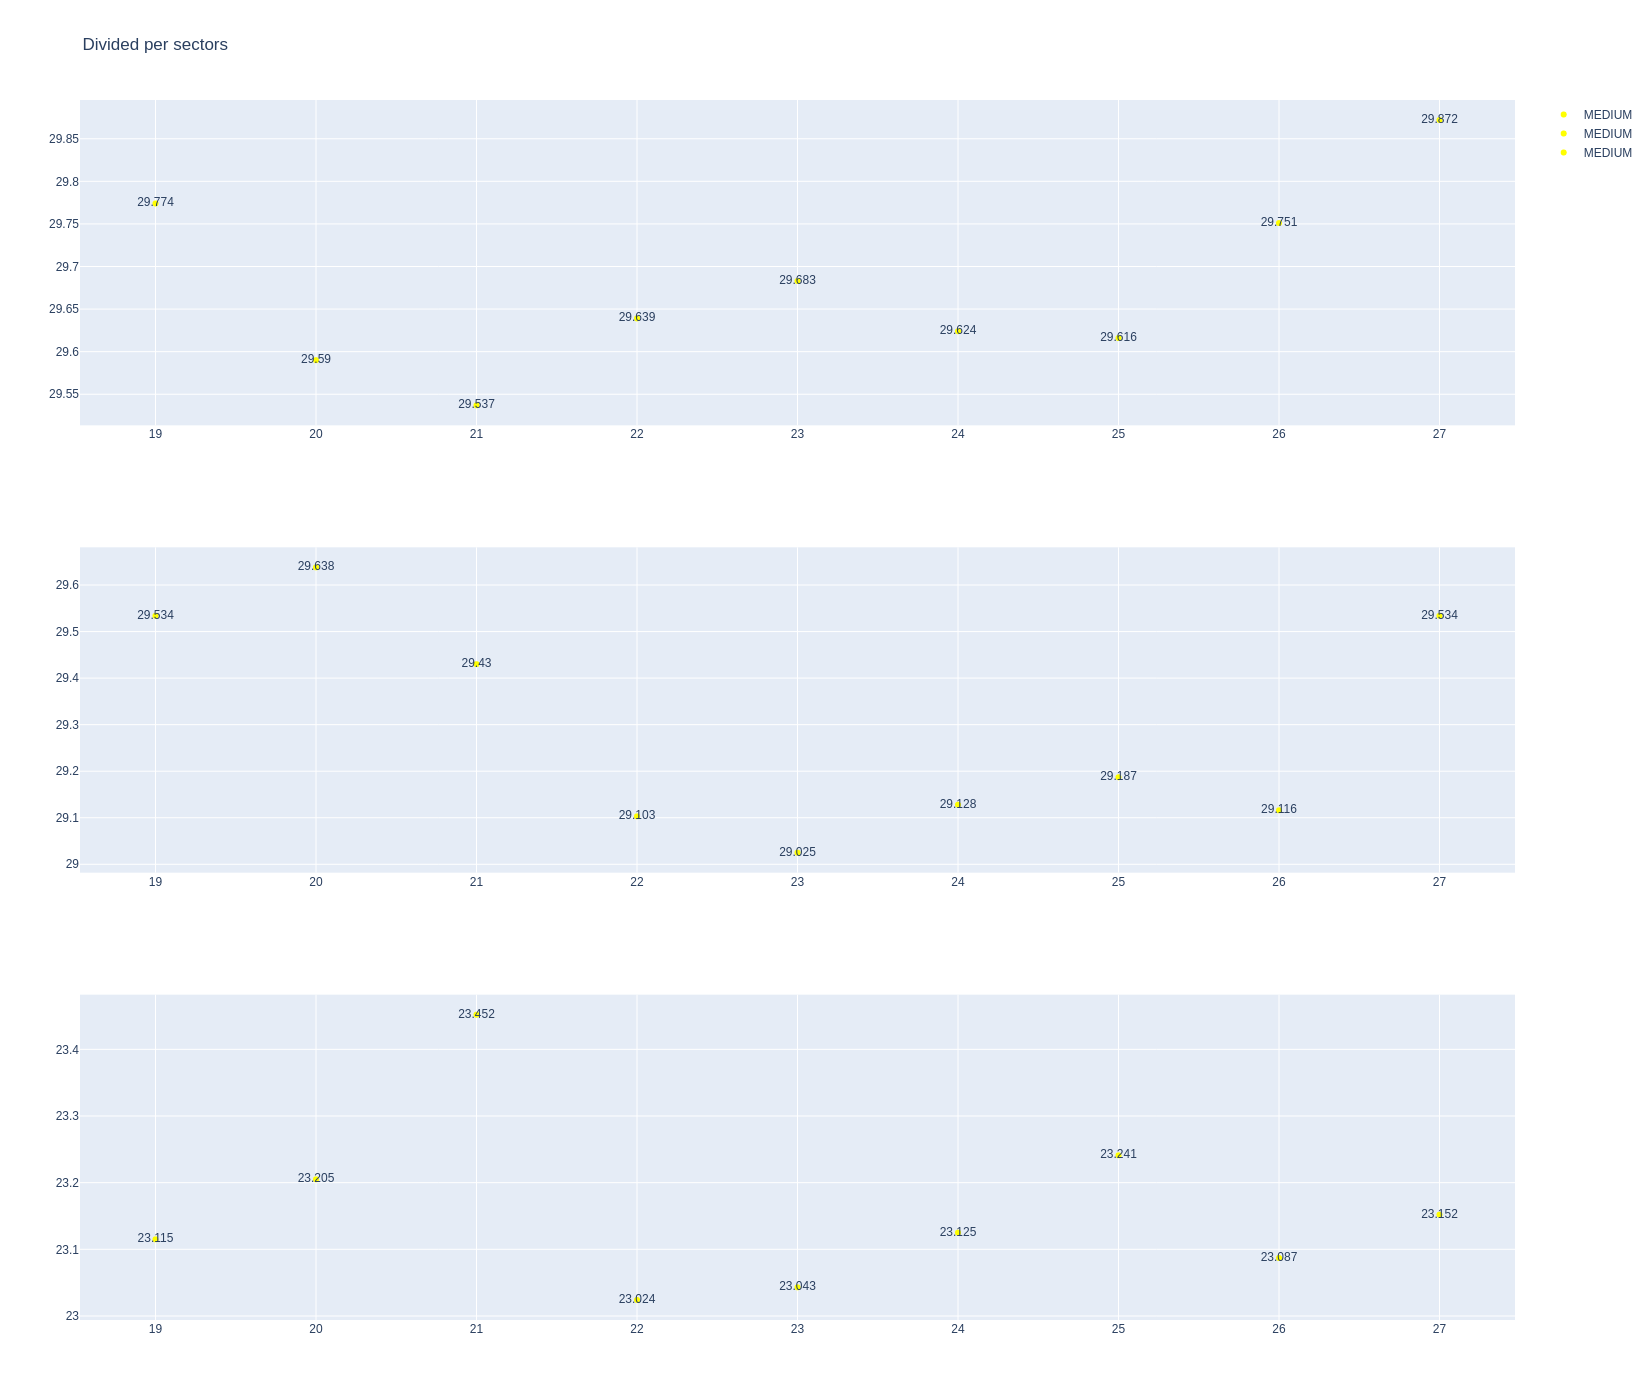

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [86]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
155  Gabriel BORTOLETO     HARD  2025-08-01T15:17:43.101000+00:00          10   
213  Gabriel BORTOLETO     SOFT  2025-08-01T15:30:00.835000+00:00          12   
326  Gabriel BORTOLETO     HARD  2025-08-01T15:45:43.002000+00:00          18   
344  Gabriel BORTOLETO     HARD  2025-08-01T15:47:04.860000+00:00          19   
363  Gabriel BORTOLETO     HARD  2025-08-01T15:48:27.257000+00:00          20   
382  Gabriel BORTOLETO     HARD  2025-08-01T15:49:49.449000+00:00          21   
420  Gabriel BORTOLETO     HARD  2025-08-01T15:52:37.101000+00:00          23   
460  Gabriel BORTOLETO     HARD  2025-08-01T15:55:25.118000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
155             28.385             27.905             27.451        83.741  
213             27.984             31.427             23.921        83.332  
326             29.604             29.330             22.940        81.874  
344             29.577             29.703             23.130        82.410  
363             29.735             29.297             23.158        82.190  
382             29.520             29.650             23.177        82.347  
420             29.794             29.398             23.148        82.340  
460             29.939             29.404             23.269        82.612

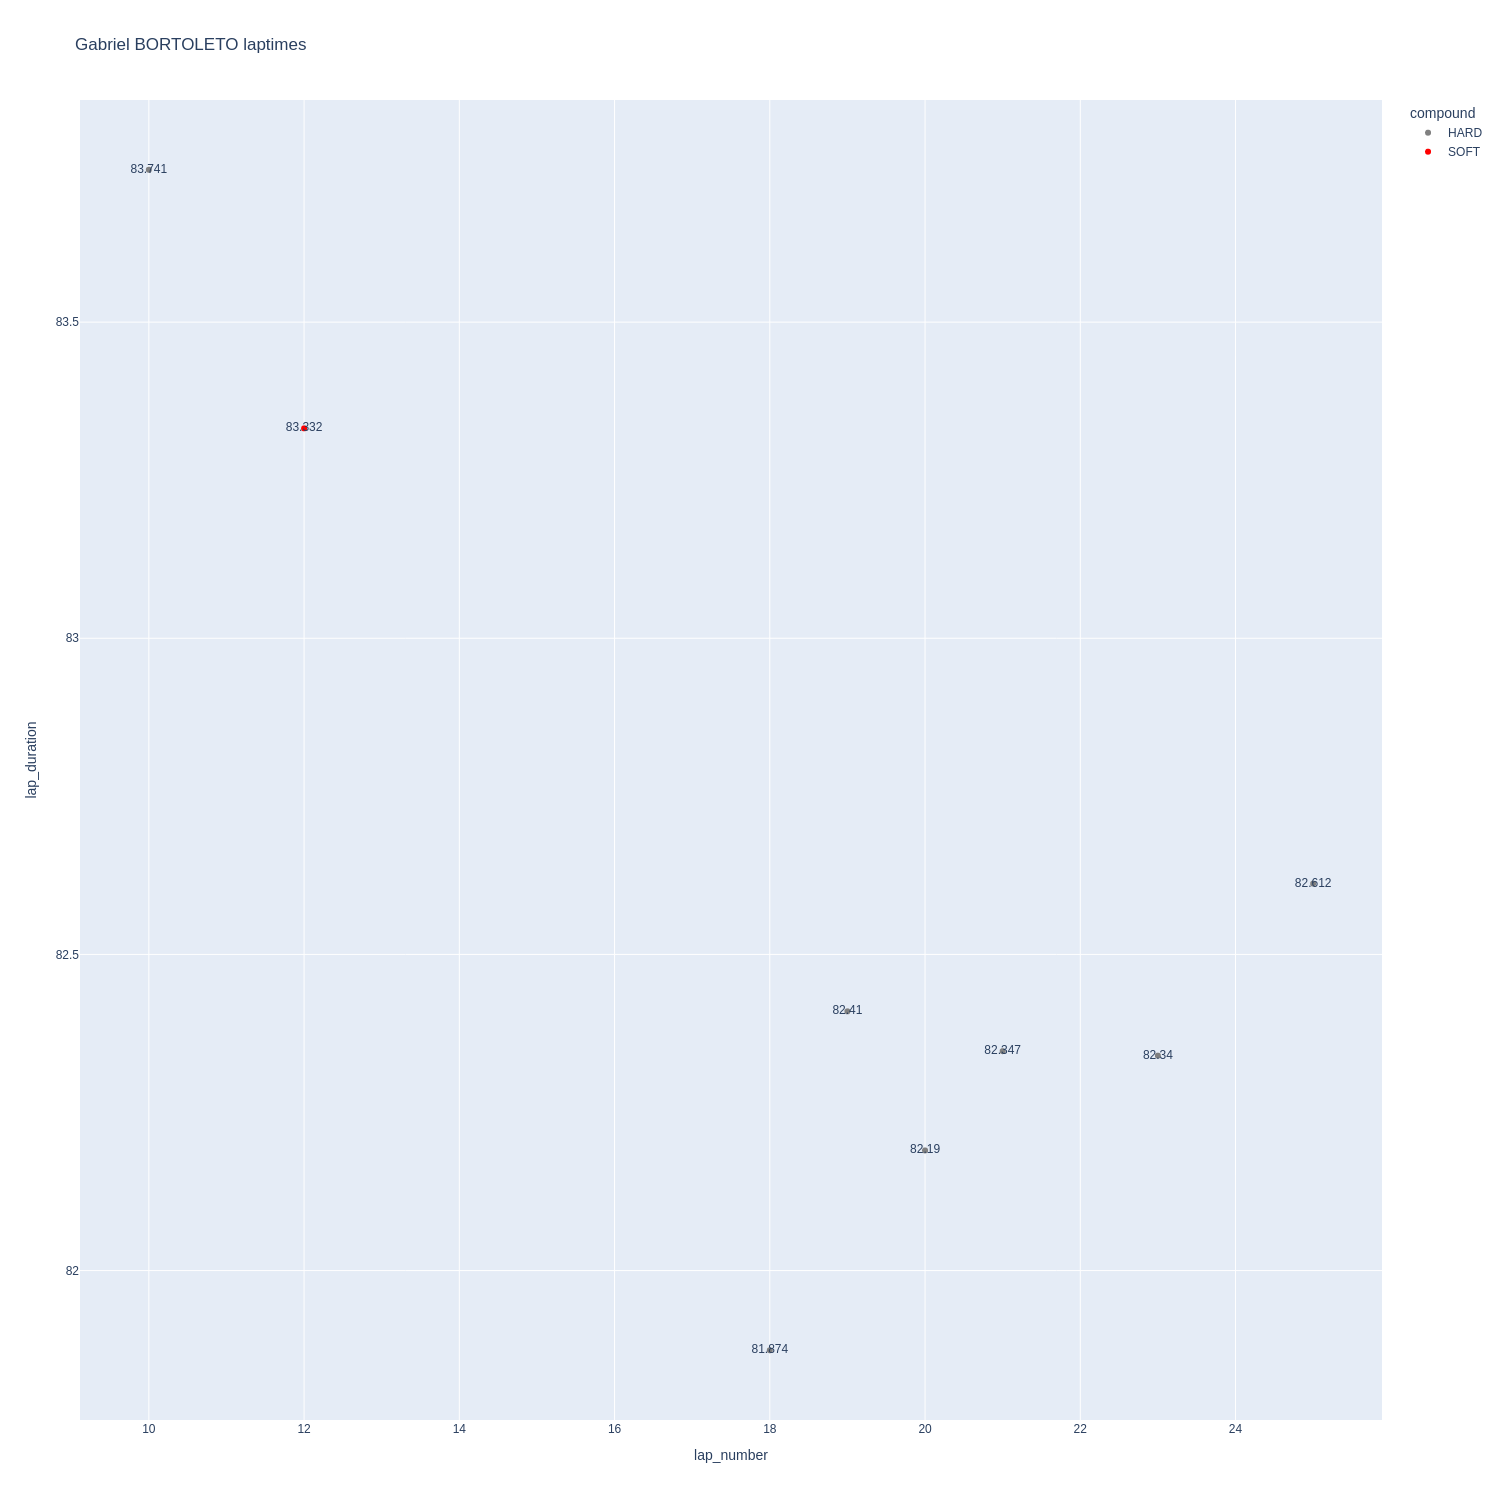

In [87]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

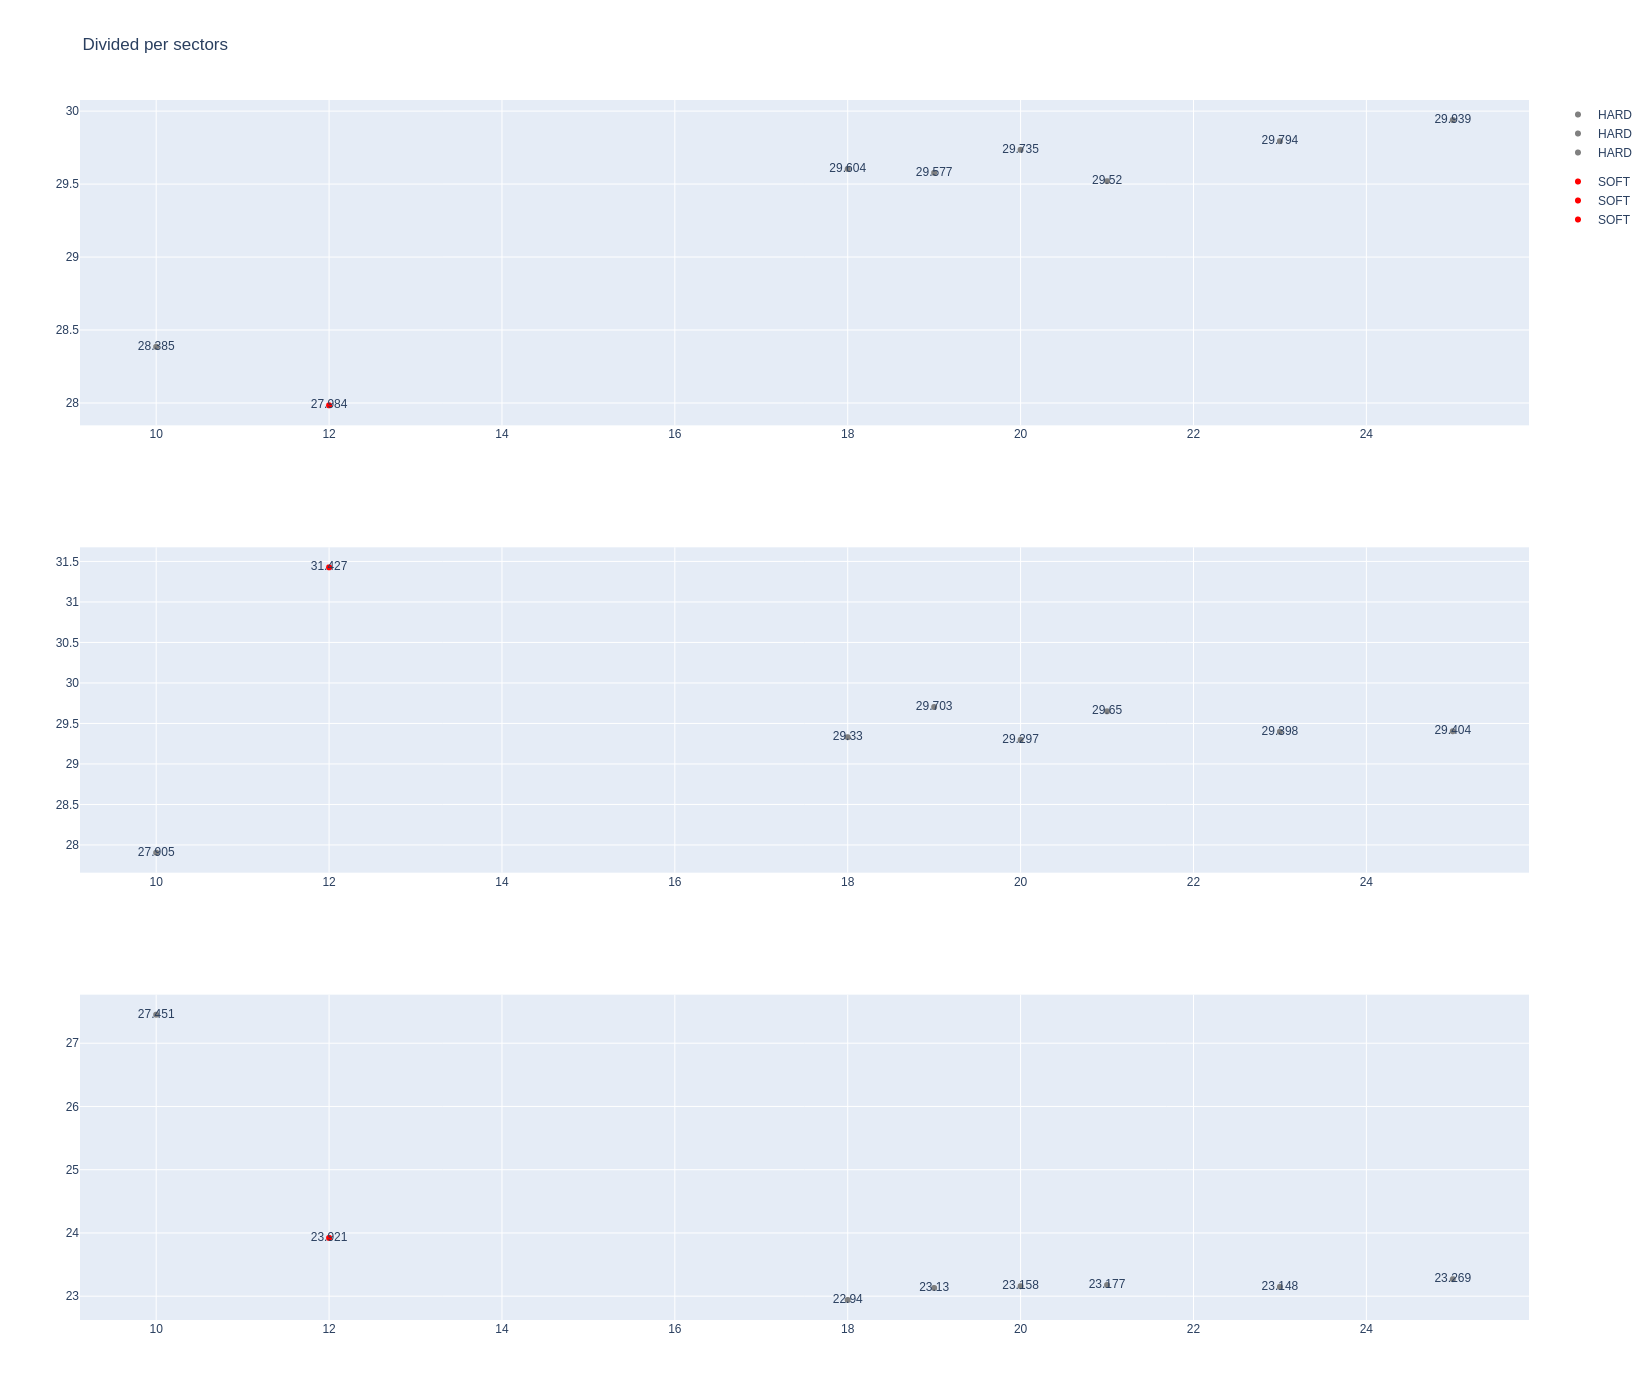

In [88]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [89]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
It seems that teams powered by HOnda suffers in S1 while Alpine had a good pace. It seems that Aston is the fourth team in race pace witrh softs and mediums.
Aston in S2 is competitive. Colapinto's pace in S3 is interesting and Stroll suffers here.

In [90]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [91]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
6     Fernando ALONSO     SOFT     82.033250  29.755750  29.150500  23.127000
15     Lewis HAMILTON     SOFT     82.129000  29.604714  29.199857  23.324429
11    Nico HULKENBERG   MEDIUM     82.136111  29.676222  29.299444  23.160444
1        Lando NORRIS   MEDIUM     82.139375  29.729250  29.179750  23.230375
18      Oscar PIASTRI   MEDIUM     82.197000  29.784750  29.209500  23.202750
7     Charles LECLERC   MEDIUM     82.214000  29.757286  29.138143  23.318571
13       Esteban OCON     HARD     82.310714  29.662143  29.376714  23.271857
14   Franco COLAPINTO   MEDIUM     82.345100  29.775600  29.346700  23.222800
5      Kimi ANTONELLI   MEDIUM     82.359100  29.753200  29.340400  23.265500
10    Alexander ALBON   MEDIUM     82.427444  29.679444  29.447556  23.300444
17     George RUSSELL   MEDIUM     82.450000  29.868000  29.240667  23.341333
2   Gabriel BORTOLETO     HARD     82.605750  29.317250  29.514250  23.774250
16       Carlos SAINZ   MEDIUM     82.658636  29.827364  29.525818  23.305455
0      Max VERSTAPPEN   MEDIUM     82.675667  29.944222  29.376222  23.355222
12        Liam LAWSON   MEDIUM     82.726615  29.893615  29.500538  23.332462
3        Isack HADJAR   MEDIUM     82.731273  29.931364  29.484727  23.315182
9        Yuki TSUNODA   MEDIUM     82.846000  29.994286  29.490429  23.361286
4        Pierre GASLY   MEDIUM     82.953429  29.847857  29.684000  23.421571
19     Oliver BEARMAN     SOFT     82.966500  29.892500  29.586000  23.488000
8        Lance STROLL   MEDIUM     83.049200  29.754200  29.326300  23.968700

##### Sorted by sector 1

In [92]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
2   Gabriel BORTOLETO     HARD  29.317250
15     Lewis HAMILTON     SOFT  29.604714
13       Esteban OCON     HARD  29.662143
11    Nico HULKENBERG   MEDIUM  29.676222
10    Alexander ALBON   MEDIUM  29.679444
1        Lando NORRIS   MEDIUM  29.729250
5      Kimi ANTONELLI   MEDIUM  29.753200
8        Lance STROLL   MEDIUM  29.754200
6     Fernando ALONSO     SOFT  29.755750
7     Charles LECLERC   MEDIUM  29.757286
14   Franco COLAPINTO   MEDIUM  29.775600
18      Oscar PIASTRI   MEDIUM  29.784750
16       Carlos SAINZ   MEDIUM  29.827364
4        Pierre GASLY   MEDIUM  29.847857
17     George RUSSELL   MEDIUM  29.868000
19     Oliver BEARMAN     SOFT  29.892500
12        Liam LAWSON   MEDIUM  29.893615
3        Isack HADJAR   MEDIUM  29.931364
0      Max VERSTAPPEN   MEDIUM  29.944222
9        Yuki TSUNODA   MEDIUM  29.994286

##### Sorted by sector 2

In [93]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
7     Charles LECLERC   MEDIUM  29.138143
6     Fernando ALONSO     SOFT  29.150500
1        Lando NORRIS   MEDIUM  29.179750
15     Lewis HAMILTON     SOFT  29.199857
18      Oscar PIASTRI   MEDIUM  29.209500
17     George RUSSELL   MEDIUM  29.240667
11    Nico HULKENBERG   MEDIUM  29.299444
8        Lance STROLL   MEDIUM  29.326300
5      Kimi ANTONELLI   MEDIUM  29.340400
14   Franco COLAPINTO   MEDIUM  29.346700
0      Max VERSTAPPEN   MEDIUM  29.376222
13       Esteban OCON     HARD  29.376714
10    Alexander ALBON   MEDIUM  29.447556
3        Isack HADJAR   MEDIUM  29.484727
9        Yuki TSUNODA   MEDIUM  29.490429
12        Liam LAWSON   MEDIUM  29.500538
2   Gabriel BORTOLETO     HARD  29.514250
16       Carlos SAINZ   MEDIUM  29.525818
19     Oliver BEARMAN     SOFT  29.586000
4        Pierre GASLY   MEDIUM  29.684000

##### Sorted by sector 3

In [94]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
6     Fernando ALONSO     SOFT  23.127000
11    Nico HULKENBERG   MEDIUM  23.160444
18      Oscar PIASTRI   MEDIUM  23.202750
14   Franco COLAPINTO   MEDIUM  23.222800
1        Lando NORRIS   MEDIUM  23.230375
5      Kimi ANTONELLI   MEDIUM  23.265500
13       Esteban OCON     HARD  23.271857
10    Alexander ALBON   MEDIUM  23.300444
16       Carlos SAINZ   MEDIUM  23.305455
3        Isack HADJAR   MEDIUM  23.315182
7     Charles LECLERC   MEDIUM  23.318571
15     Lewis HAMILTON     SOFT  23.324429
12        Liam LAWSON   MEDIUM  23.332462
17     George RUSSELL   MEDIUM  23.341333
0      Max VERSTAPPEN   MEDIUM  23.355222
9        Yuki TSUNODA   MEDIUM  23.361286
4        Pierre GASLY   MEDIUM  23.421571
19     Oliver BEARMAN     SOFT  23.488000
2   Gabriel BORTOLETO     HARD  23.774250
8        Lance STROLL   MEDIUM  23.968700

#### Long runs mean

In [95]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [96]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
1       L NORRIS         82.132
11  N HULKENBERG         82.136
18     O PIASTRI         82.197
7      C LECLERC         82.214
14   F COLAPINTO         82.345
5    K ANTONELLI         82.359
10       A ALBON         82.427
17     G RUSSELL         82.450
16       C SAINZ         82.659
0   M VERSTAPPEN         82.676
12      L LAWSON         82.727
3       I HADJAR         82.812
9      Y TSUNODA         82.846
4        P GASLY         82.953
8       L STROLL         83.080

In [97]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
6     F ALONSO         82.033
15  L HAMILTON         82.129
19   O BEARMAN         82.966

In [98]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
13       E OCON         82.311
2   G BORTOLETO         82.502

## Free Practice 3
### Obtain setup

In [4]:
practice = libraryDataF1.obtain_information('laps',session_key=9923)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9923)
drivers = libraryDataF1.obtain_information('drivers',session_key=9923)

In [6]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

TypeError: can only concatenate str (not "NoneType") to str

In [ ]:
session = ff1.get_session(2025, 14, 'FP3')
session.load();

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 79  and lap_duration <= 84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9562)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9562)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9562)
drivers = libraryDataF1.obtain_information('drivers',session_key=9562)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 13, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
# laptimes_deleted = [115.370,96.993,109.924,104.377,102.586,128.082,95.902,102.051]
# driver_number_lap_deleted = [4,63,1,24,22,14,55,23]

# for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
#     try:
#         id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
#         qualyfing = qualyfing.drop(id_deleted)
#     except:
#         print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 75.227 seconds (1.15.227= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (80.49 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 80.49")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-07-20T14:36:00+00:00'"
maximumDateQ2 = "date_start <'2024-07-20T14:59:00+00:00' and date_start >'2024-07-20T14:36:00+00:00'"
maximumDateQ3 = "date_start >'2024-07-20T14:59:00+00:00'"

### Qualyfing 1
In this session the surprise came from Sergio Perez that was knocked-out in this section. In the next sesssion, we will see what happened with Perez.

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. As we can see in Qualyfing 1, the qualy was very crazy, with tricky conditions at the beginning of the session. The track was wet but not to much affording to the drivers made their laps with slicks. Sergio Perez risked a bit more and touched the kerb and, with this conditions, he spun and crashed. THis incident provoked a red flag. After the red flag the session was restarted with a lot of drivers improving their times as we can see with Ricciardo being the fastest in this session. Unfortunately some drivers made their lap at the beginning, as we can see with Rusell.



In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, both Ferrari were knocked-out in Q2.

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Hamilton was very close to be knocked-out of Q2 but his third sector saved him. The last turn saved Hamilton because before to the enter of the last turn, Hulkenberg was in Q3 but the good traction of the Mercedes, afforded him to enter in Q3.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Even though the gap among the top three are so close, Norris marked his best lap in his first attemp. Piastri improved in his second attemp but it was not enough to beat Norris.
Note: All this analysis can be checked in F1 tempo

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9566)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9566)
drivers = libraryDataF1.obtain_information('drivers',session_key=9558)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 82
MAXIMUM_SECONDS = 87

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9566)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration